# <center>House Price Prediction</center>

### <center>Group members: Weijie Yi, Yifan Zhang, Yifei Zhang, Yutong Zhang</center>

# Introduction 

Our project of House price prediction in Georgia state is to  use data science technology to translate a large amount of Zillow house data to meaningful insights. We use Zillow house data to train machine learning models that can help us to predict the Georgia house’s price. Our model will serve as a predictive model that help user to decide whether the sale price of a unlisted house is higher or lower than its actual sale price, which will provide a good comparison for them to decide whether they should invest or not. 

# Data Explanation 

The data for our project is provided in two files: GaCensus.xlsx and ForSaleData.xlsx.
+ ForSaleData.xlsx contains 32056 rows and 48 columns.
+ GaCensus.xlsx contains 949 rows 27 columns.
+ we merge these two dataset together by the common feature of City.
+ We also split our dataset in to training data set and testing dataset,which contains 30% of the total dataset.
+ Each row represents a house in Georgia state,each column is a feature, either unique to the house.
+ These data set contains both numerical features and categorical features,and we transfer categorical features in to numerical features. 

Feature Introduction:

ForSaleData:
+ 5 categories
+ house pric:'city','ParcelId’, 'StreetAddress’, 'Zipcode’, 'Latitude','Longitude’
+ Location:'Price','PriceChange','Zestimate', 'RentZestimate’,'Zpid'
+ homesiatution:'Bathrooms','Bedrooms',''LivingArea','LotSize','Basement','Appliances','Cooling','Heating','Flooring','ExteriorFeatures','RoofType','Utilities','YearBuilt'
+ school information:'PrimarySchoolDistance', 'PrimarySchoolName','PrimarySchoolRating','MiddleSchoolDistance','MiddleSchoolName','MiddleSchoolRating','HighSchoolDistance', 'HighSchoolName','HighSchoolRating'
+ website information:'last_upd_dt','hoa','Url','OnMarketDate','last_upd_dt'


GaCensus:
+ 5 categories
+ populaiton:'FemalePopulation', 'HawaiianPopulation','HispanicPopulation','AmericanIndianPopulation','AsianPopulation','BlackPopulation','WhitePopulation','FemalePopulation','MalePopulation'
+ household:'IncomePerHousehold','Households','PersonsPerHousehold','AverageHouseValue'
+ age:'MaleMedianAge','FemaleMedianAge'
+ employment:'BusinessMailboxes','NumberofBusinesses', 'NumberofEmployees'，‘AnnualPayroll’
+ other:'BusinessMailboxes','ResidentialMailboxes','City', 'CountyFIPS','Latitude', 'Longitude'


# Goal 

Our goal is to predic the house price of Georgia state as precise as possible. we collected the data of each house,and each house has own unique information, and we also clloect the data of Population profile in Georgia state.

# Metric 

we want to build  machine learning model that can predict the house price of Georgia state as precise as possible.Our predictions will be assessed by the following metric.


+ MAE:Mean Absolute Error 
+ MSE:Mean Squared Error
+ RMSE:Root Mean Square Error
+ MAPE: Mean Absolute Percentage Error
+ MPE:Mean Percentage Error
+ R^2:R-squared

# Model 

Since the variables we predicted were continuous variables, we first used the linear regression model, and then used the lasso linear regression model to avoid overfitting.In order to get a better model, we use In order to get a better model, we use  machine learning model of random forest, XGboost,LGBM.On the base of these underlying machine learning models we build our Ensemble Learning model to further improve the performance of models.
+ Simple Model: linear regression, Lasso
+ Complex Model:random forest, XGboost,LGBM
+ Ensemble Learning

### Default Model 

We first tune our dataset on the default machine learning modle, which serve as the benchmark to further impromve our model and compare the result of our tunning models.

### Grid search  & RandomSearch

we use gridsearch and RandomSearch to tune the best combination of hyperparameter for each model by achieving the highest average metric score on each validation data set.

# PART ONE

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
color = sns.color_palette()
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import boxcox
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
import warnings
warnings.filterwarnings('ignore')

# 1. Collecting Data

In [240]:
sale_data_df = pd.read_excel('ForSaleData.xlsx')
gagensus_df = pd.read_excel('GaCensus.xlsx')

# 2. Data Browsing

In [241]:
sale_data_df.head()
gagensus_df.head()

Zpid  ParcelId HomeStatus       HomeType           StreetAddress  \
0   90171327   6194384   FOR_SALE          CONDO  1809 Brookside Lay Cir   
1   14770166  6176A070   FOR_SALE  SINGLE_FAMILY            997 Carla Pl   
2   14773317   6187374   FOR_SALE  SINGLE_FAMILY     1371 Kings Ridge Dr   
3  124173626   6169331   FOR_SALE      TOWNHOUSE          6302 Story Cir   
4   14774647   6190064   FOR_SALE  SINGLE_FAMILY            1227 Gale Dr   

       City State  Zipcode   Latitude  Longitude  ...  PrimarySchoolRating  \
0  Norcross    GA    30093  33.904044 -84.221225  ...                  5.0   
1  Norcross    GA    30093  33.921892 -84.131309  ...                  4.0   
2  Norcross    GA    30093  33.911711 -84.175728  ...                  4.0   
3  Norcross    GA    30093  33.892507 -84.198051  ...                  5.0   
4  Norcross    GA    30093  33.894653 -84.202902  ...                  5.0   

   MiddleSchoolDistance              MiddleSchoolName  MiddleSchoolRating  \
0                   5.7  Louise Radloff Middle School                 5.0   
1                   1.2         Berkmar Middle School                 8.0   
2                   3.1  Louise Radloff Middle School                 5.0   
3                   3.4         Lilburn Middle School                 5.0   
4                   3.7         Lilburn Middle School                 5.0   

   HighSchoolDistance           HighSchoolName  HighSchoolRating  hoa  \
0                 4.7  Meadowcreek High School               3.0    0   
1                 1.4      Berkmar High School               4.0    0   
2                 1.8  Meadowcreek High School               3.0    0   
3                 3.6  Meadowcreek High School               3.0    0   
4                 3.8  Meadowcreek High School               3.0    0   

   OnMarketDate  last_upd_dt  
0           NaT          NaT  
1           NaT          NaT  
2           NaT          NaT  
3           NaT          NaT  
4           NaT          NaT  

[5 rows x 45 columns]

ZipCode            City   Latitude  Longitude  CountyFIPS  \
0    30327         Atlanta  33.864887 -84.423887         121   
1    30573  Tallulah Falls  34.736100 -83.391500         241   
2    30005      Alpharetta  34.090544 -84.218282         121   
3    30075         Roswell  34.056136 -84.379465         121   
4    30068        Marietta  33.972174 -84.441108          67   

   BusinessMailboxes  ResidentialMailboxes  NumberofBusinesses  \
0                424                 10338                 839   
1                  0                     0                  12   
2               1567                 13450                1794   
3               1476                 21419                1829   
4                684                 12886                1061   

   NumberofEmployees  Population2010  ...  AnnualPayroll  AverageHouseValue  \
0              13418           22208  ...      919794000             879600   
1                216             163  ...        7488000             299300   
2              41291           34442  ...     3465474000             395200   
3              15829           52573  ...      610556000             364300   
4               8309           31595  ...      307618000             376500   

   IncomePerHousehold  Households  PersonsPerHousehold  FemaleMedianAge  \
0              148480        9217                 2.40      45.70 years   
1              132250          69                 2.36      44.80 years   
2              127340       11665                 2.95      36.50 years   
3              109786       19610                 2.66      42.50 years   
4              108105       12054                 2.62      44.50 years   

   FemalePopulation  MaleMedianAge  MalePopulation    MedianAge  
0             11484    44.10 years           10724  44.90 years  
1                77    46.50 years              86  45.80 years  
2             17516    35.60 years           16926  36.10 years  
3             26851    40.40 years           25722  41.50 years  
4             16138    42.10 years           15457  43.40 years  

[5 rows x 27 columns]

# 3. Cleaning Data for Each Form to Be Ready for Merging

Step1: We need to find column names appear in both forms.

In [242]:
sale_name = list(sale_data_df.columns)
sale_name_lower = [sale.lower() for sale in sale_name]
gagensus_name = list(gagensus_df.columns)
gagensus_name_lower = [ga.lower() for ga in gagensus_name]
common = [x for x in sale_name_lower if x in gagensus_name_lower]
common

['city', 'zipcode', 'latitude', 'longitude']

Step2: Merging key options include 'city', 'zipcode', 'latitude' and 'longitude'. We could foresee that 'zipcode', 'latitude' and 'longitude' are more specific than 'city'. If we choose one of those three as key, it is possible that there are lots of missing values we need to fill. However, if we choose 'city' as the key, that problem could be avoided. Another thing to support our choice is that the same city always has similar attributes. Thus, for gagensus_df, we need to groupby city. For sale_data_df, we could remain most of features inside until we merge two forms. 

## (1) Gagensus Form

Gagensus form is about city information in Georgia State.

In [243]:
gagensus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 27 columns):
ZipCode                     949 non-null int64
City                        949 non-null object
Latitude                    949 non-null float64
Longitude                   949 non-null float64
CountyFIPS                  949 non-null int64
BusinessMailboxes           949 non-null int64
ResidentialMailboxes        949 non-null int64
NumberofBusinesses          949 non-null int64
NumberofEmployees           949 non-null int64
Population2010              949 non-null int64
CurrentPopulation           949 non-null int64
AmericanIndianPopulation    949 non-null int64
AsianPopulation             949 non-null int64
BlackPopulation             949 non-null int64
HawaiianPopulation          949 non-null int64
HispanicPopulation          949 non-null int64
WhitePopulation             949 non-null int64
AnnualPayroll               949 non-null int64
AverageHouseValue           949 non-null int

### a. Drop meaningless value

Value in 'ZipCode' and 'CountyFIPS' are artificially regulated. They are not naturally attribute for city. So we drop them.

In [244]:
g_a = gagensus_df.drop(['ZipCode','CountyFIPS'], axis = 1)

### b. Convert object into numerical value

From data info we find 4 features in object type. To better take advantage of original dataset, we decide to convert possible object featues into numerical features. They are 'FemaleMedianAge', 'MaleMedianAge' and 'MedianAge'.

In [245]:
g_a['FemaleMedianAge'] = g_a['FemaleMedianAge'].str.strip(' years').astype(float)
g_a['MaleMedianAge'] = g_a['MaleMedianAge'].str.strip(' years').astype(float)
g_a['MedianAge'] = g_a['MedianAge'].str.strip(' years').astype(float)

### c. Compile features in same city

We find in orginal data form, some same city appears many times. In order to get an overview of the same city and merge them with the other form via key 'City', we decide to sum some of those features up.

In [246]:
g_b = g_a[['City', 'BusinessMailboxes', 'ResidentialMailboxes',
       'NumberofBusinesses', 'NumberofEmployees', 'Population2010',
       'CurrentPopulation', 'AmericanIndianPopulation', 'AsianPopulation',
       'BlackPopulation', 'HawaiianPopulation', 'HispanicPopulation',
       'WhitePopulation', 'AnnualPayroll', 'Households', 'FemalePopulation', 'MalePopulation']]
g_c = g_b.groupby('City').sum()

We find 'IncomePerHousehold' and 'PersonsPerHousehold' is the average value in different counties within the same city. So we cannot sum them up. In this case, we decide to take the weighted average for them in each city. Here are formulas: 

<center> IncomePerHousehold = $\sum_{i=1}^{n}{IncomePerHousehold_i}$*$Household_i$ / $\sum_{i=1}^{n}{Household_i}$ </center>

<center> PersonsPerHousehold = $\sum_{i=1}^{n}{PersonsPerHousehold_i}$*$Household_i$ / $\sum_{i=1}^{n}{Household_i}$ </center>

In [247]:
g_c['IncomePerHousehold'] = g_a.groupby('City').apply(
    lambda g_a: np.average(g_a['IncomePerHousehold'], weights = g_a['Households'])
    if g_a['Households'].any() >0 else 0)
g_c['PersonsPerHousehold'] = g_a.groupby('City').apply(
    lambda g_a: np.average(g_a['PersonsPerHousehold'], weights = g_a['Households']) 
    if g_a['Households'].any() >0 else 0)

For features 'AverageHouseValue', 'FemaleMedianAge', 'MaleMedianAge' and 'MedianAge', they are also average value. We cannot sum them up. Also there exist zero values. So a best way to compile them based on city is to calculate non-zero average for those features.

In [248]:
g_c['AverageHouseValue'] = g_a.groupby('City').apply(
    lambda g_a: np.array(g_a['AverageHouseValue'])[np.nonzero(np.array(g_a['AverageHouseValue']))].mean())
g_c['FemaleMedianAge'] = g_a.groupby('City').apply(
    lambda g_a: np.array(g_a['FemaleMedianAge'])[np.nonzero(np.array(g_a['FemaleMedianAge']))].mean())
g_c['MaleMedianAge'] = g_a.groupby('City').apply(
    lambda g_a: np.array(g_a['MaleMedianAge'])[np.nonzero(np.array(g_a['MaleMedianAge']))].mean())
g_c['MedianAge'] = g_a.groupby('City').apply(
    lambda g_a: np.array(g_a['MedianAge'])[np.nonzero(np.array(g_a['MedianAge']))].mean())

### d. Reset index

Since we process data based on groupby 'City'. The index right now is 'City'. We need to convert them into numerical range instead of 'City' for further convinience.

In [249]:
city_df = g_c.reset_index()

## (2) Sales data Form

sale_data_df is about each house information and sales data on Zillow.

In [250]:
sale_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32056 entries, 0 to 32055
Data columns (total 45 columns):
Zpid                     32056 non-null int64
ParcelId                 32049 non-null object
HomeStatus               32056 non-null object
HomeType                 32056 non-null object
StreetAddress            32056 non-null object
City                     32056 non-null object
State                    32056 non-null object
Zipcode                  32056 non-null int64
Latitude                 32056 non-null float64
Longitude                32056 non-null float64
Price                    32056 non-null int64
PriceChange              32056 non-null int64
Zestimate                32056 non-null int64
RentZestimate            32056 non-null int64
TaxAssessedValue         32056 non-null int64
DaysOnZillow             32056 non-null int64
PageViewCount            32056 non-null int64
FavoriteCount            32056 non-null int64
Bedrooms                 32056 non-null int64
Bathroo

### Drop meaningless value

Step1: Value in 'Zpid','ParcelId' and 'Zipcode' are artificially regulated. They are not naturally attribute for city. So we drop them.

Step2: For other features 'HomeStatus','StreetAddress','Url','PrimarySchoolName','MiddleSchoolName','HighSchoolName', 'OnMarketDate' and 'last_upd_dt', they are all useless for price predicting. So we drop them.

Step3: We find there are many features about price, which is the y we want to predict. 'PriceChange' 'Zestimate', 'RentZestimate' are not that useful compared to actual 'Price' itself. So we drop them.

Step4: Since 'latitude', 'longitude' are also appears in gagensus form, we should only reserve one set of them.

In [251]:
s_a = sale_data_df.drop(columns=['Zpid','ParcelId','HomeStatus','StreetAddress',
                 'Zipcode','PriceChange', 'Zestimate', 'RentZestimate','Url','PrimarySchoolName',
                 'MiddleSchoolName','HighSchoolName','OnMarketDate','last_upd_dt','Latitude','Longitude'])

We know there may exist some mistakes when conducting web crawling. To make sure all house in this form are in GA state, we decide to check feature state. If there are houses in other state, we drop them. Then we drop 'State' feature.

In [252]:
s_a['State'].value_counts()

GA    32044
0         9
AL        1
LA        1
OH        1
Name: State, dtype: int64

In [253]:
s_a = s_a[s_a['State'].isin(['GA'])]
sales_df = s_a.drop(columns=['State'])

# 4. Merging Data 

In [254]:
df = sales_df.merge(city_df, on=['City'], how='inner') 

# 5. Cleaning Merged data

## (1) Drop rows and columns

Step1: Drop rows. Because y-'price' is what we want to predict. If its value is NaN, we cannot just fill them based on other house prices. It is not helpful for building high performance model. So we decide to drop rows which 'price' is zero.

In [255]:
df['Price'].value_counts()
print('Is there any missing values in Price Column?',df['Price'].isnull().any())

0         644
250000    137
399900    137
299900    136
349900    127
         ... 
425766      1
194343      1
814900      1
593720      1
339998      1
Name: Price, Length: 9741, dtype: int64

Is there any missing values in Price Column? False


In [256]:
df_1 = df.drop(index=list(np.where(df['Price']==0)[0]))

Step2: Drop columns. If there are so many missing values, we drop them directly.

Text(0.5, 1.0, 'Missing ratio in columns')

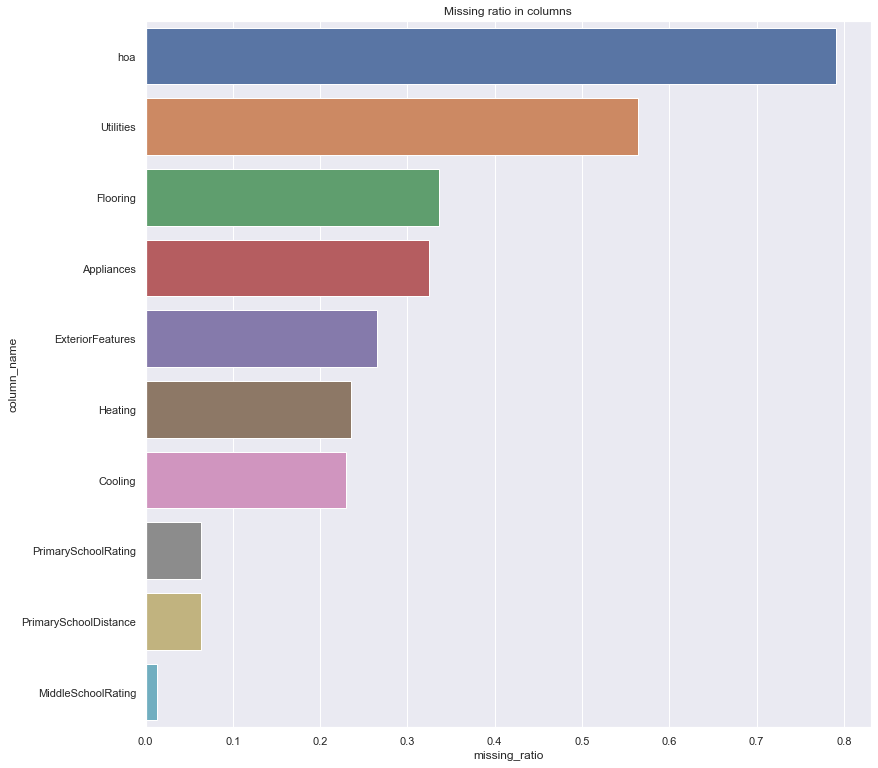

In [257]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df.shape[0]
missing_df = missing_df.sort_values(by='missing_count', ascending=False)
sns.set(rc={'figure.figsize':(13,13)})
sns.barplot(data=missing_df[0:10], x='missing_ratio', y='column_name').set_title('Missing ratio in columns')

We find missing values in 'hoa' and 'Utilities' are over 50%, so we drop them. Because if we fill missing values based on minority, it will have great bias.

In [258]:
df_1 = df_1.drop(columns = ['hoa', 'Utilities'])

## (2) Drop Outliers

We decide to drop values beyond 3 standard deviation in Price.

Text(0.5, 1.0, 'Boxplot for Outliers in Price')

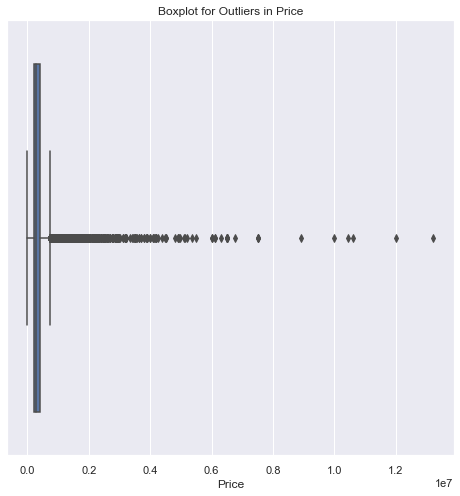

In [259]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(x = df_1['Price']).set_title('Boxplot for Outliers in Price')

In [260]:
price = np.array(df_1['Price'])
mean = np.mean(price,axis=0)
sd = np.std(price, axis=0)
price_1 = [x for x in price if (x > mean - 3 * sd)]
price_2 = [x for x in price_1 if (x < mean + 3 * sd)]
print('Ratio of outliers removed in Price is %.2f' % ((len(price)-len(price_2))/len(price)))

Ratio of outliers removed in Price is 0.01


In [261]:
df_2 = df_1[df_1['Price'].isin(list(price_2))]

## (3) Convert object into numerical value

In [262]:
df_3 = df_2.select_dtypes(include='object')
df_3.head()

HomeType      City                                   Basement  \
0          CONDO  Norcross                                          0   
1  SINGLE_FAMILY  Norcross                                          0   
2  SINGLE_FAMILY  Norcross  Finished, Walk-Out Access, Walk-Up Access   
3      TOWNHOUSE  Norcross                                          0   
4  SINGLE_FAMILY  Norcross                                Crawl Space   

                                          Appliances  \
0                          dishwasher Electric Range   
1                          Range / Oven Refrigerator   
2           Dishwasher Range/Oven Refrigerator Other   
3  Dishwasher,Disposal,Electric Cooktop,Electric ...   
4                                              Other   

                      Cooling                     Heating         Flooring  \
0   Ceiling Fan S,Central Air  gas Forced Air Natural Gas                0   
1                     Central                  Forced air  Carpet Laminate   
2  Central Air Ceiling Fan(s)               Other Central         Hardwood   
3                 Central Air                     Central  Carpet,Hardwood   
4                 Central Air      Forced Air,Natural Gas            Other   

  ExteriorFeatures               RoofType  
0             Wood  C o m p o s i t i o n  
1       Brick Wood  C o m p o s i t i o n  
2       Stone Wood                      0  
3             Wood  C o m p o s i t i o n  
4      Brick Other  C o m p o s i t i o n

### a. Count 'Appliances'

Fo convenience, we drop rows containing missing values of 'Appliances'. Since 'Appliances' is combined by different types, we could count them to replace string type values.

In [263]:
df_3 = df_2.dropna(subset = ['Appliances'])
adf =df_3['Appliances']
adf.iloc[np.where(df_3['Appliances']==0)[0]]='0'
df_al_p1=[]
for i in range(0,len(adf)):
    if adf.iloc[i] != 0:
        df_al_p1.append([len(adf.iloc[i]),adf.iloc[i].encode('raw_unicode_escape'),adf.index[i]])
        df_al_pp1=[]
for i in range(0,len(df_al_p1)):
    df_al_pp1.append(df_al_p1[i][0])
for i in range(0,len(df_al_p1)):
    if df_al_p1[i][0]==max(df_al_pp1):
        print(df_al_p1[i])

[253, b'Dishwasher Range/Oven Refrigerator Disposal Double Oven Convection Oven Dryer Washer Central Vacuum Indoor Grill Ice Maker Gas Water Heater Cooktop - Separate Microwave - Built In Oven - Wall ENERGY STAR Qualified Appliances Stainless Steel Appliance(s)', 10454]


In [264]:
df_3['Appliances']=adf
df_dpnew=df_3 # utility :u
df_dpnew.index=range(0,len(df_3))
sdsds=[]
for i in range(0,len(df_dpnew)):
    sdsds.append(0)
    if 'Dishwasher' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Range/Oven' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Refrigerator' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Disposal' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Double Oven' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Convection Oven' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Dryer' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Washer' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Central Vacuum' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Indoor Grill' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Ice Maker' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Gas Wa' in df_dpnew['Appliances'][i]: #ter Heater
        sdsds[i]=sdsds[i]+1
    if 'Cooktop - Separate' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Microwave - Built In' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'ENERGY STAR Qualified Appliances,' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Stainless Steel Appliance(s)' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Oven - Wall' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'dishwasher' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Range / Oven' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Electric Ran' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1
    if 'Electric Cooktop' in df_dpnew['Appliances'][i]:
        sdsds[i]=sdsds[i]+1

In [265]:
df_3['Appliances']=sdsds

After filling missing value with average number, we count Appliance number again.

### b. Encode other features

Step1: Encode 'HomeType' and 'City' via label encoder.

In [266]:
df_3['HomeType'].value_counts()
df_3['City'].value_counts()

SINGLE_FAMILY    15540
TOWNHOUSE         2021
CONDO              988
LOT                508
MANUFACTURED        66
MULTI_FAMILY        48
APARTMENT            2
Name: HomeType, dtype: int64

Marietta         1688
Atlanta          1315
Alpharetta        793
Lawrenceville     778
Smyrna            711
                 ... 
Nelson              2
Emerson             2
Lithonia            1
Cobb                1
Mcdonough           1
Name: City, Length: 72, dtype: int64

In [267]:
encode= preprocessing.LabelEncoder()
for i in ['HomeType','City']:
    encode.fit(df_3[i])
    df_3[i]=np.array(encode.transform(df_3[i]))

LabelEncoder()

LabelEncoder()

Step2: Encode 'Basement', 'Cooling', 'Heating', 'Flooring', 'ExteriorFeatures' and 'RoofType'. Considering that NaN/0 may express the same thing-missing value or the house doesn't have that kind of decoration(a plain house), we decide to encode 0/Nan to 0, anything else as 1.

In [268]:
df_3[['Basement','Cooling','Heating','Flooring','ExteriorFeatures', 'RoofType']].fillna(0, inplace=True)
df_3[['Basement','Cooling','Heating','Flooring','ExteriorFeatures', 'RoofType']]= df_3[['Basement','Cooling','Heating','Flooring','ExteriorFeatures','RoofType']].astype(bool).astype(int)

## (4) Fill numerical missing value

In [269]:
miss = list(df_3.columns[np.where(np.isnan(df_3))[1]].drop_duplicates())
miss
for i in miss:
    df_3[i].fillna(np.mean(df_3[i]),inplace=True)
df = df_3

['HighSchoolDistance',
 'HighSchoolRating',
 'PrimarySchoolDistance',
 'PrimarySchoolRating',
 'MiddleSchoolDistance',
 'MiddleSchoolRating',
 'AverageHouseValue',
 'FemaleMedianAge',
 'MaleMedianAge',
 'MedianAge']

In [270]:
list(df.columns)

['HomeType',
 'City',
 'Price',
 'TaxAssessedValue',
 'DaysOnZillow',
 'PageViewCount',
 'FavoriteCount',
 'Bedrooms',
 'Bathrooms',
 'Stories',
 'LivingArea',
 'LotSize',
 'Basement',
 'Appliances',
 'Cooling',
 'Heating',
 'Flooring',
 'ExteriorFeatures',
 'RoofType',
 'YearBuilt',
 'PrimarySchoolDistance',
 'PrimarySchoolRating',
 'MiddleSchoolDistance',
 'MiddleSchoolRating',
 'HighSchoolDistance',
 'HighSchoolRating',
 'BusinessMailboxes',
 'ResidentialMailboxes',
 'NumberofBusinesses',
 'NumberofEmployees',
 'Population2010',
 'CurrentPopulation',
 'AmericanIndianPopulation',
 'AsianPopulation',
 'BlackPopulation',
 'HawaiianPopulation',
 'HispanicPopulation',
 'WhitePopulation',
 'AnnualPayroll',
 'Households',
 'FemalePopulation',
 'MalePopulation',
 'IncomePerHousehold',
 'PersonsPerHousehold',
 'AverageHouseValue',
 'FemaleMedianAge',
 'MaleMedianAge',
 'MedianAge']

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19173 entries, 0 to 19172
Data columns (total 48 columns):
HomeType                    19173 non-null int64
City                        19173 non-null int64
Price                       19173 non-null int64
TaxAssessedValue            19173 non-null int64
DaysOnZillow                19173 non-null int64
PageViewCount               19173 non-null int64
FavoriteCount               19173 non-null int64
Bedrooms                    19173 non-null int64
Bathrooms                   19173 non-null float64
Stories                     19173 non-null int64
LivingArea                  19173 non-null int64
LotSize                     19173 non-null int64
Basement                    19173 non-null int64
Appliances                  19173 non-null int64
Cooling                     19173 non-null int64
Heating                     19173 non-null int64
Flooring                    19173 non-null int64
ExteriorFeatures            19173 non-null int64
RoofTyp

In [272]:
df

HomeType  City   Price  TaxAssessedValue  DaysOnZillow  PageViewCount  \
0             1    51  201900            176500             9            929   
1             5    51  110000             88800            38           2865   
2             5    51  195000            157900             1            252   
3             6    51  239900            227800            34           1227   
4             5    51  210000            147000            53           1127   
...         ...   ...     ...               ...           ...            ...   
19168         5    15   89900             78970           456            588   
19169         5    15  134990                 0           396            441   
19170         5    15  114400             98820            21           1260   
19171         5    15   89900             59210            95            594   
19172         5    15   83900             45220            19           1064   

       FavoriteCount  Bedrooms  Bathrooms  Stories  ...  AnnualPayroll  \
0                 37         3        3.0        2  ...     3375916000   
1                 49         3        2.0        0  ...     3375916000   
2                 17         3        2.0        1  ...     3375916000   
3                 88         3        3.0        2  ...     3375916000   
4                 29         3        2.0        1  ...     3375916000   
...              ...       ...        ...      ...  ...            ...   
19168             25         4        2.0        1  ...     2738847000   
19169             24         3        2.0        1  ...     2738847000   
19170             75         3        2.0        1  ...     2738847000   
19171             15         4        2.0        1  ...     2738847000   
19172             69         3        2.0        1  ...     2738847000   

       Households  FemalePopulation  MalePopulation  IncomePerHousehold  \
0           23871             36237           40119        39674.339031   
1           23871             36237           40119        39674.339031   
2           23871             36237           40119        39674.339031   
3           23871             36237           40119        39674.339031   
4           23871             36237           40119        39674.339031   
...           ...               ...             ...                 ...   
19168       69559             91845           82058        40763.167254   
19169       69559             91845           82058        40763.167254   
19170       69559             91845           82058        40763.167254   
19171       69559             91845           82058        40763.167254   
19172       69559             91845           82058        40763.167254   

       PersonsPerHousehold  AverageHouseValue  FemaleMedianAge  MaleMedianAge  \
0                 3.197858           138650.0        29.300000      28.850000   
1                 3.197858           138650.0        29.300000      28.850000   
2                 3.197858           138650.0        29.300000      28.850000   
3                 3.197858           138650.0        29.300000      28.850000   
4                 3.197858           138650.0        29.300000      28.850000   
...                    ...                ...              ...            ...   
19168             2.424670           127150.0        36.216667      32.516667   
19169             2.424670           127150.0        36.216667      32.516667   
19170             2.424670           127150.0        36.216667      32.516667   
19171             2.424670           127150.0        36.216667      32.516667   
19172             2.424670           127150.0        36.216667      32.516667   

       MedianAge  
0      29.050000  
1      29.050000  
2      29.050000  
3      29.050000  
4      29.050000  
...          ...  
19168  34.433333  
19169  34.433333  
19170  34.433333  
19171  34.433333  
19172  34.433333  

[19173 rows x 48 columns]

In [273]:
import copy 
df_before_log=copy.deepcopy(df)

# 6. Transformation

For some models we may use, such as Linear Regression, there is an assumption that the data should be normal distributed. We check the most important feature y-Price, and find that it is skewed. So we decide to transform data based on powertransform method.

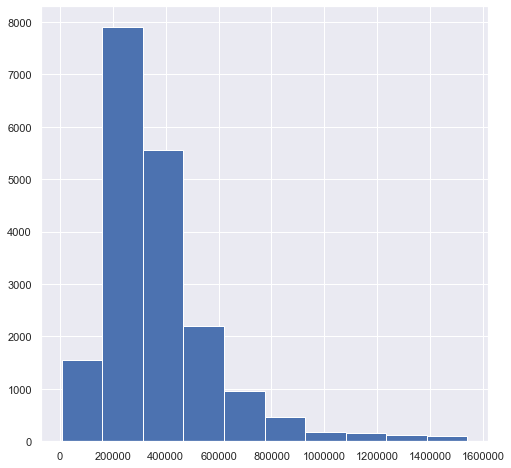

In [274]:
df['Price'].hist()

In [275]:
from scipy.stats import boxcox
for i in list(df.columns):
    df[i], lmbda = boxcox(df[i]+1,lmbda=None)

In [276]:
df.shape

(19173, 48)

In [277]:
df

HomeType       City      Price  TaxAssessedValue  DaysOnZillow  \
0        4.042986  20.009742  31.448482         49.051212      2.253184   
1      410.281860  20.009742  28.366913         42.252075      3.539562   
2      410.281860  20.009742  31.265064         47.886151      0.688625   
3      778.460344  20.009742  32.371066         51.818083      3.438487   
4      410.281860  20.009742  31.657014         47.151046      3.842274   
...           ...        ...        ...               ...           ...   
19168  410.281860   8.188015  27.398201         41.179339      5.783374   
19169  410.281860   8.188015  29.377346          0.000000      5.657850   
19170  410.281860   8.188015  28.558316         43.251298      3.002455   
19171  410.281860   8.188015  27.398201         38.648009      4.372950   
19172  410.281860   8.188015  27.072675         36.404198      2.912474   

       PageViewCount  FavoriteCount  Bedrooms  Bathrooms   Stories  ...  \
0          14.399386       4.192443  3.681205   2.659298  1.293322  ...   
1          19.220562       4.558476  3.681205   1.823771  0.000000  ...   
2          10.002469       3.233820  3.681205   1.823771  0.767555  ...   
3          15.492890       5.352963  3.681205   2.659298  1.293322  ...   
4          15.152372       3.883244  3.681205   1.823771  0.767555  ...   
...              ...            ...       ...        ...       ...  ...   
19168      12.727179       3.698758  5.107787   1.823771  0.767555  ...   
19169      11.750272       3.648545  3.681205   1.823771  0.767555  ...   
19170      15.600367       5.131910  3.681205   1.823771  0.767555  ...   
19171      12.762680       3.087637  5.107787   1.823771  0.767555  ...   
19172      14.925177       5.017833  3.681205   1.823771  0.767555  ...   

       AnnualPayroll  Households  FemalePopulation  MalePopulation  \
0          11.393259   17.039526         21.385134       21.054824   
1          11.393259   17.039526         21.385134       21.054824   
2          11.393259   17.039526         21.385134       21.054824   
3          11.393259   17.039526         21.385134       21.054824   
4          11.393259   17.039526         21.385134       21.054824   
...              ...         ...               ...             ...   
19168      11.345932   20.016643         24.952671       23.647532   
19169      11.345932   20.016643         24.952671       23.647532   
19170      11.345932   20.016643         24.952671       23.647532   
19171      11.345932   20.016643         24.952671       23.647532   
19172      11.345932   20.016643         24.952671       23.647532   

       IncomePerHousehold  PersonsPerHousehold  AverageHouseValue  \
0            12854.497112           513.494172          12.648212   
1            12854.497112           513.494172          12.648212   
2            12854.497112           513.494172          12.648212   
3            12854.497112           513.494172          12.648212   
4            12854.497112           513.494172          12.648212   
...                   ...                  ...                ...   
19168        13165.054759           165.960265          12.549586   
19169        13165.054759           165.960265          12.549586   
19170        13165.054759           165.960265          12.549586   
19171        13165.054759           165.960265          12.549586   
19172        13165.054759           165.960265          12.549586   

       FemaleMedianAge  MaleMedianAge  MedianAge  
0             3.054704       1.102177   1.382239  
1             3.054704       1.102177   1.382239  
2             3.054704       1.102177   1.382239  
3             3.054704       1.102177   1.382239  
4             3.054704       1.102177   1.382239  
...                ...            ...        ...  
19168         3.217786       1.108160   1.399828  
19169         3.217786       1.108160   1.399828  
19170         3.217786       1.108160   1.399828  
19171         3.217786     

# Log transformation 

In [278]:
df_before_log

HomeType  City   Price  TaxAssessedValue  DaysOnZillow  PageViewCount  \
0             1    51  201900            176500             9            929   
1             5    51  110000             88800            38           2865   
2             5    51  195000            157900             1            252   
3             6    51  239900            227800            34           1227   
4             5    51  210000            147000            53           1127   
...         ...   ...     ...               ...           ...            ...   
19168         5    15   89900             78970           456            588   
19169         5    15  134990                 0           396            441   
19170         5    15  114400             98820            21           1260   
19171         5    15   89900             59210            95            594   
19172         5    15   83900             45220            19           1064   

       FavoriteCount  Bedrooms  Bathrooms  Stories  ...  AnnualPayroll  \
0                 37         3        3.0        2  ...     3375916000   
1                 49         3        2.0        0  ...     3375916000   
2                 17         3        2.0        1  ...     3375916000   
3                 88         3        3.0        2  ...     3375916000   
4                 29         3        2.0        1  ...     3375916000   
...              ...       ...        ...      ...  ...            ...   
19168             25         4        2.0        1  ...     2738847000   
19169             24         3        2.0        1  ...     2738847000   
19170             75         3        2.0        1  ...     2738847000   
19171             15         4        2.0        1  ...     2738847000   
19172             69         3        2.0        1  ...     2738847000   

       Households  FemalePopulation  MalePopulation  IncomePerHousehold  \
0           23871             36237           40119        39674.339031   
1           23871             36237           40119        39674.339031   
2           23871             36237           40119        39674.339031   
3           23871             36237           40119        39674.339031   
4           23871             36237           40119        39674.339031   
...           ...               ...             ...                 ...   
19168       69559             91845           82058        40763.167254   
19169       69559             91845           82058        40763.167254   
19170       69559             91845           82058        40763.167254   
19171       69559             91845           82058        40763.167254   
19172       69559             91845           82058        40763.167254   

       PersonsPerHousehold  AverageHouseValue  FemaleMedianAge  MaleMedianAge  \
0                 3.197858           138650.0        29.300000      28.850000   
1                 3.197858           138650.0        29.300000      28.850000   
2                 3.197858           138650.0        29.300000      28.850000   
3                 3.197858           138650.0        29.300000      28.850000   
4                 3.197858           138650.0        29.300000      28.850000   
...                    ...                ...              ...            ...   
19168             2.424670           127150.0        36.216667      32.516667   
19169             2.424670           127150.0        36.216667      32.516667   
19170             2.424670           127150.0        36.216667      32.516667   
19171             2.424670           127150.0        36.216667      32.516667   
19172             2.424670           127150.0        36.216667      32.516667   

       MedianAge  
0      29.050000  
1      29.050000  
2      29.050000  
3      29.050000  
4      29.050000  
...          ...  
19168  34.433333  
19169  34.433333  
19170  34.433333  
19171  34.433333  
19172  34.433333  

[19173 rows x 48 columns]

In [279]:
df_before_log_columns = ['HomeType','City','Price','TaxAssessedValue','DaysOnZillow','PageViewCount','FavoriteCount','Bedrooms',
                  'Bathrooms','Stories','LivingArea','LotSize','Basement','Appliances',
                  'Cooling','Heating','Flooring','ExteriorFeatures','RoofType'
                 ,'YearBuilt','PrimarySchoolDistance','PrimarySchoolRating','MiddleSchoolDistance','MiddleSchoolRating','HighSchoolDistance',
                 'HighSchoolRating','BusinessMailboxes','ResidentialMailboxes','NumberofBusinesses','NumberofEmployees','Population2010',
                  'CurrentPopulation','AmericanIndianPopulation','AsianPopulation','BlackPopulation','HawaiianPopulation','HispanicPopulation',
                        'WhitePopulation','AnnualPayroll','Households','FemalePopulation','MalePopulation',
                        'IncomePerHousehold','PersonsPerHousehold','AverageHouseValue',
                        'MaleMedianAge','MedianAge']

In [280]:
#Log Transformation
def process_num(d, col):
    #d.drop(d[d[col]<=0].index, inplace=True)
    d[col+'_log'] =  np.log1p(d[col])
    return d

In [281]:
num_df = df_before_log[df_before_log_columns]
num_df.info()
num_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19173 entries, 0 to 19172
Data columns (total 47 columns):
HomeType                    19173 non-null int64
City                        19173 non-null int64
Price                       19173 non-null int64
TaxAssessedValue            19173 non-null int64
DaysOnZillow                19173 non-null int64
PageViewCount               19173 non-null int64
FavoriteCount               19173 non-null int64
Bedrooms                    19173 non-null int64
Bathrooms                   19173 non-null float64
Stories                     19173 non-null int64
LivingArea                  19173 non-null int64
LotSize                     19173 non-null int64
Basement                    19173 non-null int64
Appliances                  19173 non-null int64
Cooling                     19173 non-null int64
Heating                     19173 non-null int64
Flooring                    19173 non-null int64
ExteriorFeatures            19173 non-null int64
RoofTyp

HomeType  City   Price  TaxAssessedValue  DaysOnZillow  PageViewCount  \
0             1    51  201900            176500             9            929   
1             5    51  110000             88800            38           2865   
2             5    51  195000            157900             1            252   
3             6    51  239900            227800            34           1227   
4             5    51  210000            147000            53           1127   
...         ...   ...     ...               ...           ...            ...   
19168         5    15   89900             78970           456            588   
19169         5    15  134990                 0           396            441   
19170         5    15  114400             98820            21           1260   
19171         5    15   89900             59210            95            594   
19172         5    15   83900             45220            19           1064   

       FavoriteCount  Bedrooms  Bathrooms  Stories  ...  WhitePopulation  \
0                 37         3        3.0        2  ...            28910   
1                 49         3        2.0        0  ...            28910   
2                 17         3        2.0        1  ...            28910   
3                 88         3        3.0        2  ...            28910   
4                 29         3        2.0        1  ...            28910   
...              ...       ...        ...      ...  ...              ...   
19168             25         4        2.0        1  ...            80858   
19169             24         3        2.0        1  ...            80858   
19170             75         3        2.0        1  ...            80858   
19171             15         4        2.0        1  ...            80858   
19172             69         3        2.0        1  ...            80858   

       AnnualPayroll  Households  FemalePopulation  MalePopulation  \
0         3375916000       23871             36237           40119   
1         3375916000       23871             36237           40119   
2         3375916000       23871             36237           40119   
3         3375916000       23871             36237           40119   
4         3375916000       23871             36237           40119   
...              ...         ...               ...             ...   
19168     2738847000       69559             91845           82058   
19169     2738847000       69559             91845           82058   
19170     2738847000       69559             91845           82058   
19171     2738847000       69559             91845           82058   
19172     2738847000       69559             91845           82058   

       IncomePerHousehold  PersonsPerHousehold  AverageHouseValue  \
0            39674.339031             3.197858           138650.0   
1            39674.339031             3.197858           138650.0   
2            39674.339031             3.197858           138650.0   
3            39674.339031             3.197858           138650.0   
4            39674.339031             3.197858           138650.0   
...                   ...                  ...                ...   
19168        40763.167254             2.424670           127150.0   
19169        40763.167254             2.424670           127150.0   
19170        40763.167254             2.424670           127150.0   
19171        40763.167254             2.424670           127150.0   
19172        40763.167254             2.424670           127150.0   

       MaleMedianAge  MedianAge  
0          28.850000  29.050000  
1          28.850000  29.050000  
2          28.850000  29.050000  
3          28.850000  29.050000  
4          28.850000  29.050000  
...              ...        ...  
19168      32.516667  34.433333  
19169      32.516667  34.433333  
19170      32.516667  34.433333  
19171      32.516667  34.433333  
19172      32.516667  34.433333  

[19173 rows x 47 columns]

In [282]:
for s in df_before_log_columns:
    num_df = process_num(num_df, s)

In [283]:
num_df_log = num_df.drop(df_before_log_columns, axis=1)

In [284]:
num_df_log

HomeType_log  City_log  Price_log  TaxAssessedValue_log  \
0          0.693147  3.951244  12.215533             12.081082   
1          1.791759  3.951244  11.608245             11.394153   
2          1.791759  3.951244  12.180760             11.969724   
3          1.945910  3.951244  12.387982             12.336228   
4          1.791759  3.951244  12.254868             11.898195   
...             ...       ...        ...                   ...   
19168      1.791759  2.772589  11.406464             11.276836   
19169      1.791759  2.772589  11.812963              0.000000   
19170      1.791759  2.772589  11.647465             11.501065   
19171      1.791759  2.772589  11.406464             10.988863   
19172      1.791759  2.772589  11.337393             10.719317   

       DaysOnZillow_log  PageViewCount_log  FavoriteCount_log  Bedrooms_log  \
0              2.302585           6.835185           3.637586      1.386294   
1              3.663562           7.960673           3.912023      1.386294   
2              0.693147           5.533389           2.890372      1.386294   
3              3.555348           7.113142           4.488636      1.386294   
4              3.988984           7.028201           3.401197      1.386294   
...                 ...                ...                ...           ...   
19168          6.124683           6.378426           3.258097      1.609438   
19169          5.983936           6.091310           3.218876      1.386294   
19170          3.091042           7.139660           4.330733      1.386294   
19171          4.564348           6.388561           2.772589      1.609438   
19172          2.995732           6.970730           4.248495      1.386294   

       Bathrooms_log  Stories_log  ...  WhitePopulation_log  \
0           1.386294     1.098612  ...            10.271977   
1           1.098612     0.000000  ...            10.271977   
2           1.098612     0.693147  ...            10.271977   
3           1.386294     1.098612  ...            10.271977   
4           1.098612     0.693147  ...            10.271977   
...              ...          ...  ...                  ...   
19168       1.098612     0.693147  ...            11.300462   
19169       1.098612     0.693147  ...            11.300462   
19170       1.098612     0.693147  ...            11.300462   
19171       1.098612     0.693147  ...            11.300462   
19172       1.098612     0.693147  ...            11.300462   

       AnnualPayroll_log  Households_log  FemalePopulation_log  \
0              21.939933       10.080462             10.497864   
1              21.939933       10.080462             10.497864   
2              21.939933       10.080462             10.497864   
3              21.939933       10.080462             10.497864   
4              21.939933       10.080462             10.497864   
...                  ...             ...                   ...   
19168          21.730803       11.149945             11.427869   
19169          21.730803       11.149945             11.427869   
19170          21.730803       11.149945             11.427869   
19171          21.730803       11.149945             11.427869   
19172          21.730803       11.149945             11.427869   

       MalePopulation_log  IncomePerHousehold_log  PersonsPerHousehold_log  \
0               10.599630               10.588485                 1.434575   
1               10.599630               10.588485                 1.434575   
2               10.599630               10.588485                 1.434575   
3               10.599630               10.588485                 1.434575   
4               10.599630               10.588485                 1.434575   
...                   ...                     ...                      ...   
19168           11.315194               10.615559                 1.231005   
19169           11.315194               10.615559                 1.231005   
19170        

In [285]:
num_df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19173 entries, 0 to 19172
Data columns (total 47 columns):
HomeType_log                    19173 non-null float64
City_log                        19173 non-null float64
Price_log                       19173 non-null float64
TaxAssessedValue_log            19173 non-null float64
DaysOnZillow_log                19173 non-null float64
PageViewCount_log               19173 non-null float64
FavoriteCount_log               19173 non-null float64
Bedrooms_log                    19173 non-null float64
Bathrooms_log                   19173 non-null float64
Stories_log                     19173 non-null float64
LivingArea_log                  19173 non-null float64
LotSize_log                     19173 non-null float64
Basement_log                    19173 non-null float64
Appliances_log                  19173 non-null float64
Cooling_log                     19173 non-null float64
Heating_log                     19173 non-null float64
Flooring_lo

# Metrics

In the beggining, we considered five regression metrics for model selection. They are MAE, MSE, RMSE, MAPE and MPE

In [286]:
def metrics(pred, truth):
    print("MAE: %.2f" % np.mean(np.abs(pred- truth))) #MAE
    print("MSE: %.2f" % np.mean((pred- truth) ** 2))   #MSE
    print("RMSE: %.2f" % np.sqrt(np.mean((pred - truth) ** 2))) #RMSE
    print("MAPE: %.2f" % (np.mean(np.abs((pred -truth) / truth)) * 100)) #MAPE
    print("MPE: %.2f" % (np.mean((pred - truth) /truth)* 100))  #MPE

MPE used for proxy on bias. The bias alone won’t be enough to evaluate our forecast precision.

After data exploration and data preprocessing, we already removed outliers we defined. According to the paper (Georgios.D), MAE,MAPE (MAPE is considered as the weighted version of MAE the optimal constant predictions for MAPE it turns out to be the weighted median of the target value) can penalize huge errors that not as that badly as MSE does. Thus, they are not that sensitive to outliers as mean square error. In conclusin, MAE provides a protection against outliers whereas RMSE and MSE provides the assurance to get an unbiased forecast.If using MAE as a metric results in a high bias, we might want to use RMSE (Nicolas. V). If the dataset contains many outliers, resulting in a skewed forecast, we might want to use MAE. In this case, we do not have outliers anymore and also we prefer to care about model accuracy. Therefore, we prefer to use RMSE and MSE. 

It is also hard to realize if our model is good or not by looking at the absolute values of MSE or RMSE. We want to measure how much our model is better than the constant baseline.

The coefficient of determination, or R², is the main metric we use to evaluate a model and it is closely related to MSE, but has the advantage of being scale-free — it doesn’t matter if the output values are very large or very small, the R² is always going to be between -∞ and 1.In conclusion, R² is the ratio between how good our model is vs how good is the naive mean model.

Therefore, Our main regresison metric for model selection will be R^2. We also will check model's MSE and RMSE.

In [287]:
from sklearn.metrics import r2_score
def metrics_new(pred, truth):
    #print("MAE: %.2f" % np.mean(np.abs(pred- truth))) #MAE
    print("MSE: %.2f" % np.mean((pred- truth) ** 2))   #MSE
    print("RMSE: %.2f" % np.sqrt(np.mean((pred - truth) ** 2))) #RMSE
    #print("MAPE: %.2f" % (np.mean(np.abs((pred -truth) / truth)) * 100)) #MAPE
    #print("MPE: %.2f" % (np.mean((pred - truth) /truth)* 100))  #MPE
    print("R^2: %.3f" % (r2_score(truth, pred))) #R^2

# Spliting Data into Training and Testing dataset

In [288]:
Y = num_df_log['Price_log']
X = num_df_log.drop(['Price_log'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2020)

# PART TWO-exploratory data analysis and test hypotheses

### Dataset before transformation:num_df

### 1. general introduction 

In [289]:
num_df.describe()

HomeType          City         Price  TaxAssessedValue  \
count  19173.000000  19173.000000  1.917300e+04      1.917300e+04   
mean       4.809889     33.134825  3.684249e+05      1.822540e+05   
std        1.072921     21.188028  2.153710e+05      1.969438e+05   
min        0.000000      0.000000  7.500000e+03      0.000000e+00   
25%        5.000000     15.000000  2.300000e+05      0.000000e+00   
50%        5.000000     36.000000  3.159900e+05      1.504000e+05   
75%        5.000000     50.000000  4.430250e+05      2.777100e+05   
max        6.000000     71.000000  1.540000e+06      5.050440e+06   

       DaysOnZillow  PageViewCount  FavoriteCount      Bedrooms     Bathrooms  \
count  19173.000000   19173.000000   19173.000000  19173.000000  19173.000000   
mean     353.773379     647.109007      26.519376      3.726282      3.150642   
std     1119.483445     768.950134      37.043053      1.191666      1.280748   
min        0.000000       0.000000       0.000000      0.000000      0.000000   
25%       26.000000     137.000000       4.000000      3.000000      2.000000   
50%       77.000000     410.000000      14.000000      4.000000      3.000000   
75%      165.000000     884.000000      35.000000      4.000000      4.000000   
max    14536.000000   14877.000000     571.000000     14.000000     11.000000   

            Stories  ...  WhitePopulation_log  AnnualPayroll_log  \
count  19173.000000  ...         19173.000000       19173.000000   
mean       1.705993  ...            10.934784          20.912056   
std        0.985438  ...             1.101604           1.658224   
min        0.000000  ...             0.000000          13.987783   
25%        1.000000  ...            10.322527          19.685965   
50%        2.000000  ...            11.005660          20.762303   
75%        2.000000  ...            11.647343          21.787815   
max       34.000000  ...            12.885387          24.758774   

       Households_log  FemalePopulation_log  MalePopulation_log  \
count    19173.000000          19173.000000        19173.000000   
mean        10.382553             10.737048           10.690106   
std          1.163525              1.134069            1.135943   
min          0.000000              0.000000            0.000000   
25%          9.899580             10.332930           10.273084   
50%         10.336924             10.668211           10.653865   
75%         11.002616             11.349747           11.297428   
max         12.860736             13.030011           13.004442   

       IncomePerHousehold_log  PersonsPerHousehold_log  AverageHouseValue_log  \
count            19173.000000             19173.000000           19173.000000   
mean                11.110147                 1.320942              12.211503   
std                  0.617433                 0.095212               0.297935   
min                  0.000000                 0.000000              11.512935   
25%                 11.044859                 1.291918              11.998286   
50%                 11.127336                 1.337547              12.238061   
75%                 11.254569                 1.373716              12.403639   
max                 11.580399                 1.435085              12.773305   

       MaleMedianAge_log  MedianAge_log  
count       19173.000000   19173.000000  
mean            3.569531       3.595412  
std             0.066101       0.066458  
min             3.364994       3.391147  
25%             3.529077       3.552487  
50%             3.573282       3.597312  
75%             3.602777       3.632687  
max             3.983413       3.988984  

[8 rows x 94 columns]

### 2. Missing Value:NO 

### After the data processing, we dealt with all the missing values, so there are no more missing values in the dataset.

In [290]:
mv=[]
for i in num_df.columns:
    mv.append(num_df[i].isnull().any())   

In [291]:
pd.DataFrame({'Feature':num_df.columns,
              'Missing value':mv
             })

Feature  Missing value
0                  HomeType          False
1                      City          False
2                     Price          False
3          TaxAssessedValue          False
4              DaysOnZillow          False
..                      ...            ...
89   IncomePerHousehold_log          False
90  PersonsPerHousehold_log          False
91    AverageHouseValue_log          False
92        MaleMedianAge_log          False
93            MedianAge_log          False

[94 rows x 2 columns]

## 3.Outliers 

### 3.1 scatter diagram
we will first use diagram to show whether features include outliers. For some of the features are categorical features before, so we choose some of the original numerical features to find the outliers.

In [228]:
col=[]
for i in num_df.columns:
    col.append(i) 

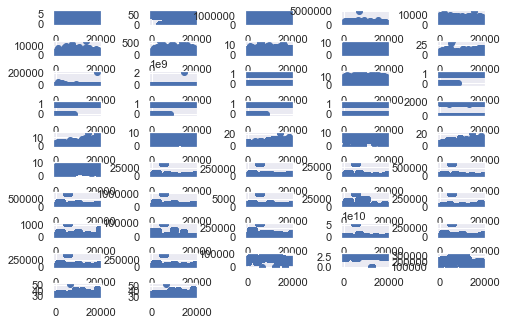

In [229]:
for i in range(1,48):
    #yi = np.sin(2*np.pi*t)
    #y2 = np.sin(2*np.pi*t)
    plt.subplot(10,5,i)
    b=num_df[col[i-1]]
    #plt.figure(figsize=(1,1))
    plt.scatter(range(0,len(num_df)),b)
    #plt.subplots_adjust(wspace=0, hspace=0) 
    #fig.subplots_adjust(wspace=0.5,hspace=0.5)
    plt.subplots_adjust(left=4, bottom=4, right=5, top=5,
                    wspace=1, hspace=1)

<Figure size 216x216 with 0 Axes>

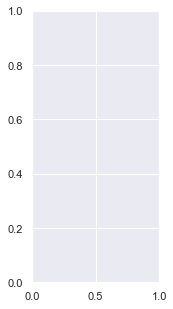

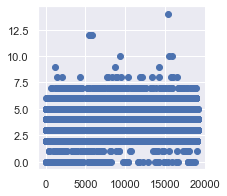

In [230]:
k=5
fig=plt.figure(figsize=(k,k))
ax1=fig.add_subplot(1,2,1)
plt.figure(figsize=(3,3))
plt.scatter(range(0,len(num_df['Bedrooms'])),num_df['Bedrooms'])
plt.subplots_adjust(wspace=0, hspace=0)


<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'HomeType')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'City')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Price')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'TaxAssessedValue')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'DaysOnZillow')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'PageViewCount')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'FavoriteCount')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Bedrooms')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Bathrooms')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Stories')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'LivingArea')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'LotSize')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Basement')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Appliances')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Cooling')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Heating')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Flooring')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'ExteriorFeatures')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'RoofType')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'YearBuilt')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'PrimarySchoolDistance')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'PrimarySchoolRating')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'MiddleSchoolDistance')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'MiddleSchoolRating')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'HighSchoolDistance')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'HighSchoolRating')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'BusinessMailboxes')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'ResidentialMailboxes')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'NumberofBusinesses')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'NumberofEmployees')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Population2010')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'CurrentPopulation')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'AmericanIndianPopulation')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'AsianPopulation')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'BlackPopulation')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'HawaiianPopulation')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'HispanicPopulation')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'WhitePopulation')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'AnnualPayroll')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Households')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'FemalePopulation')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'MalePopulation')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'IncomePerHousehold')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'PersonsPerHousehold')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'AverageHouseValue')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'MaleMedianAge')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'MedianAge')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'HomeType_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'City_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Price_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'TaxAssessedValue_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'DaysOnZillow_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'PageViewCount_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'FavoriteCount_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Bedrooms_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Bathrooms_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Stories_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'LivingArea_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'LotSize_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Basement_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Appliances_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Cooling_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Heating_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Flooring_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'ExteriorFeatures_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'RoofType_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'YearBuilt_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'PrimarySchoolDistance_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'PrimarySchoolRating_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'MiddleSchoolDistance_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'MiddleSchoolRating_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'HighSchoolDistance_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'HighSchoolRating_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'BusinessMailboxes_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'ResidentialMailboxes_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'NumberofBusinesses_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'NumberofEmployees_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Population2010_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'CurrentPopulation_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'AmericanIndianPopulation_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'AsianPopulation_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'BlackPopulation_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'HawaiianPopulation_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'HispanicPopulation_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'WhitePopulation_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'AnnualPayroll_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'Households_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'FemalePopulation_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'MalePopulation_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'IncomePerHousehold_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'PersonsPerHousehold_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'AverageHouseValue_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'MaleMedianAge_log')

<Figure size 216x216 with 0 Axes>

Text(0.5, 1.0, 'MedianAge_log')

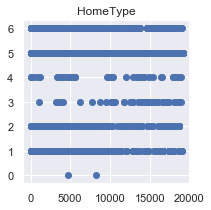

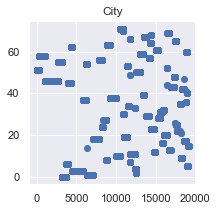

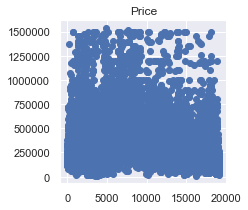

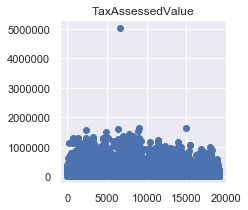

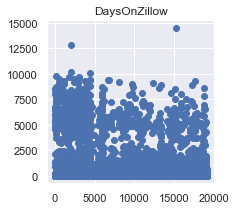

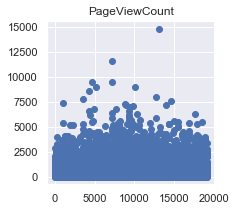

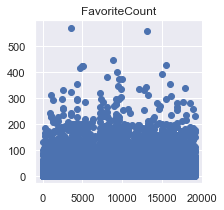

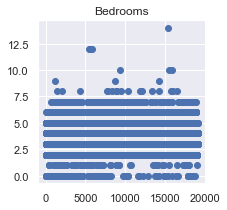

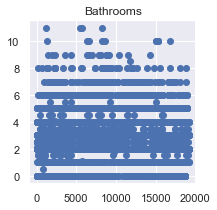

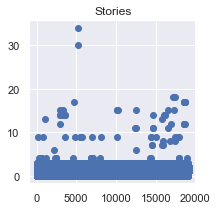

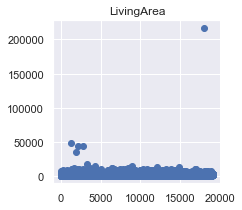

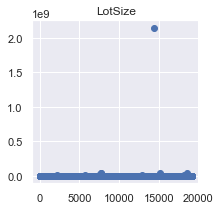

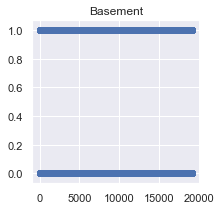

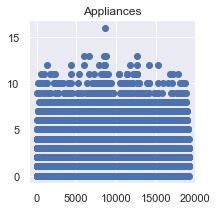

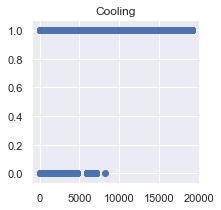

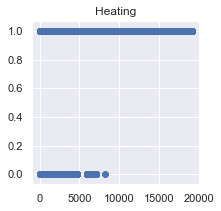

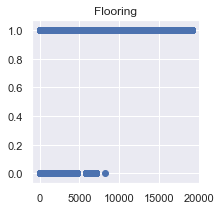

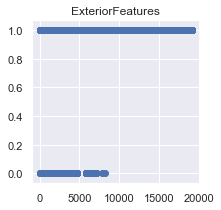

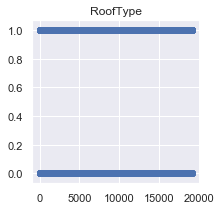

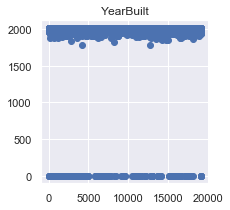

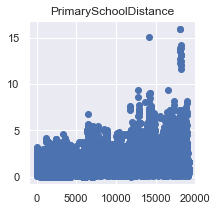

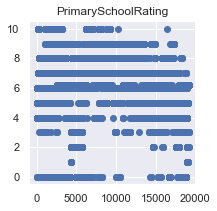

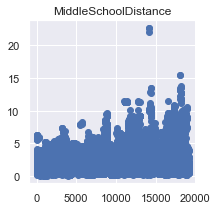

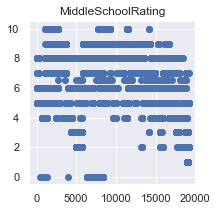

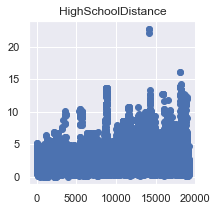

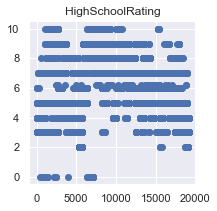

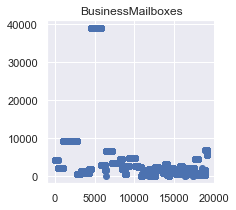

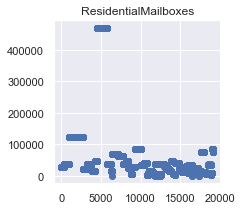

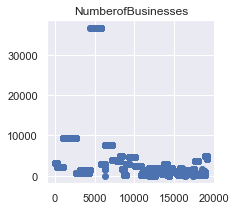

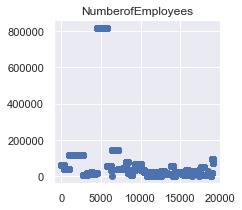

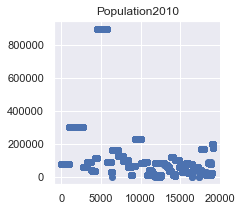

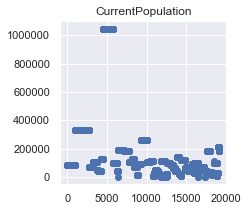

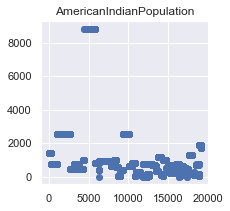

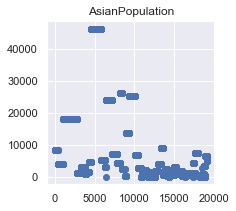

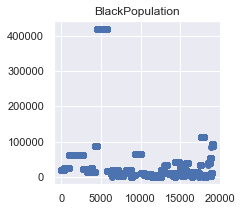

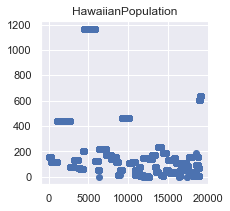

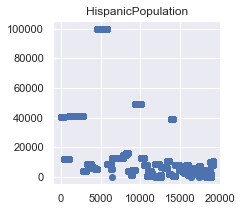

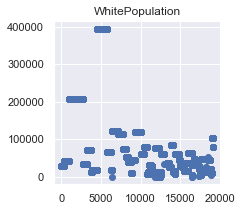

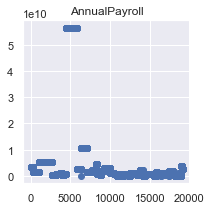

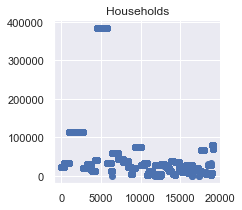

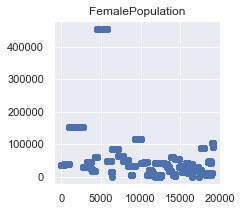

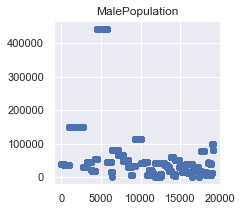

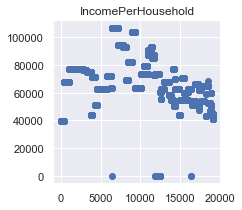

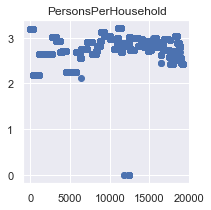

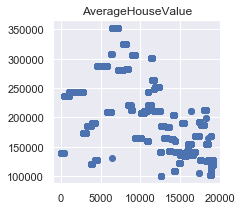

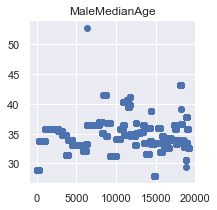

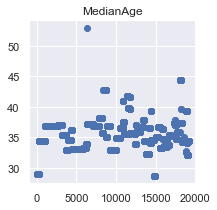

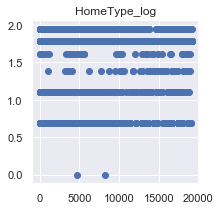

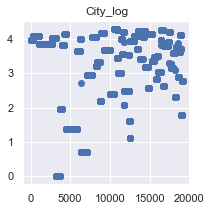

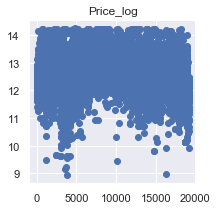

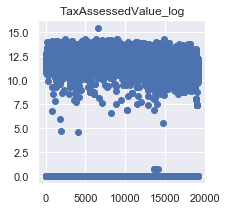

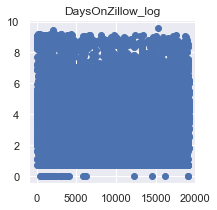

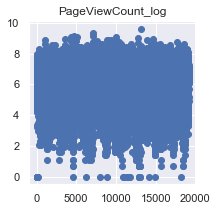

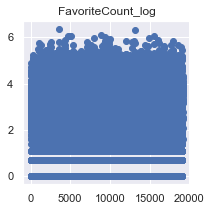

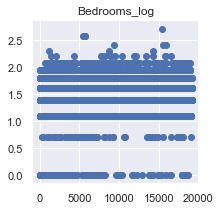

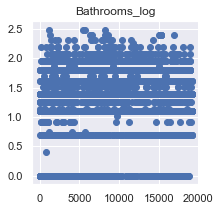

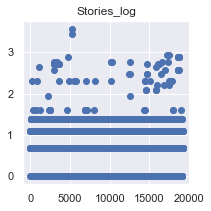

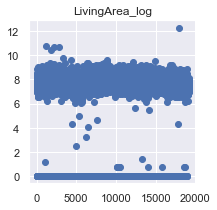

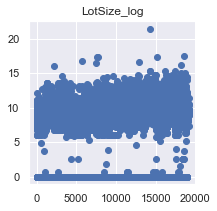

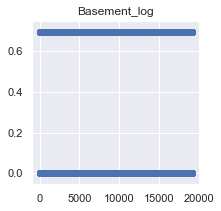

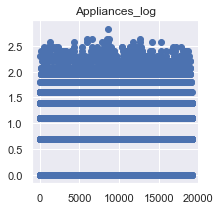

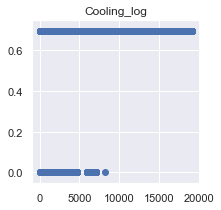

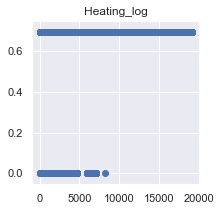

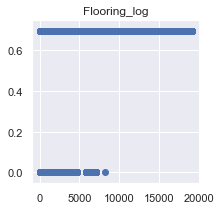

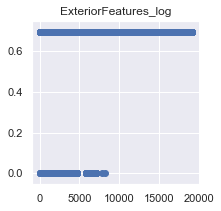

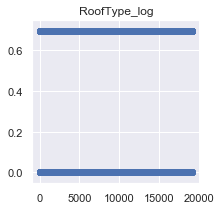

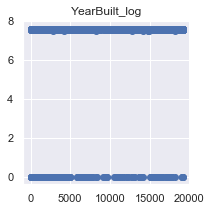

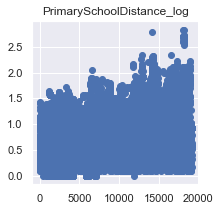

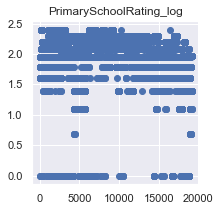

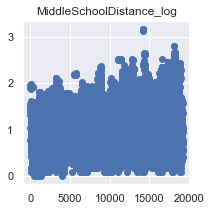

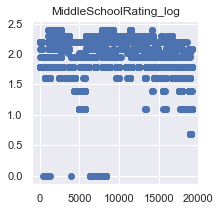

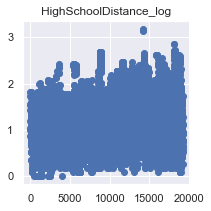

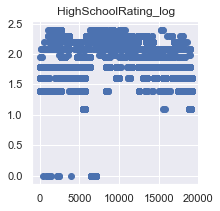

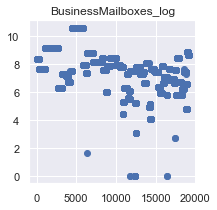

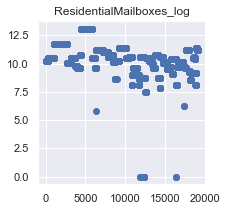

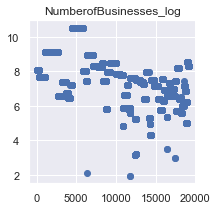

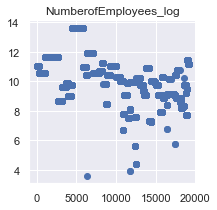

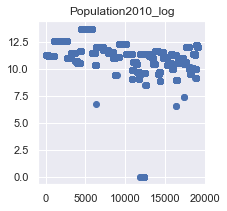

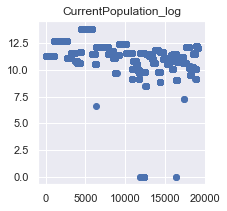

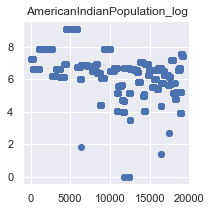

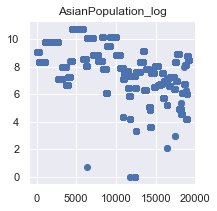

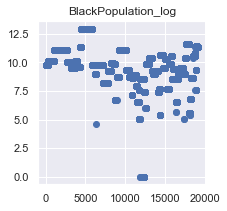

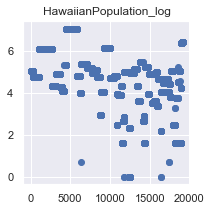

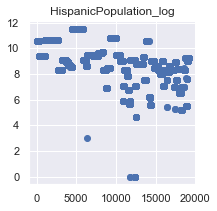

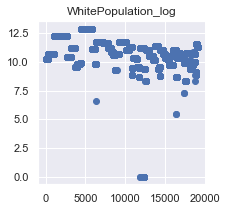

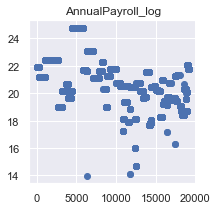

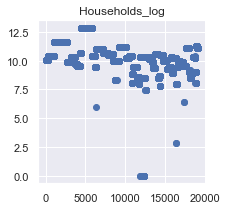

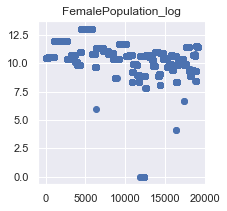

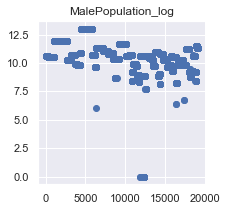

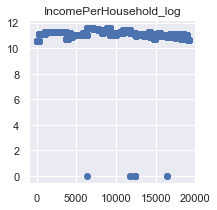

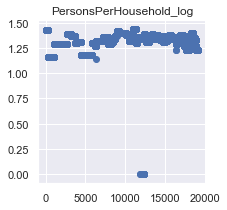

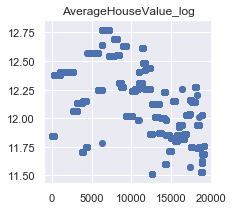

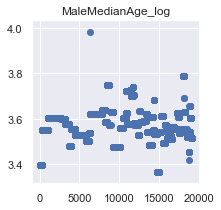

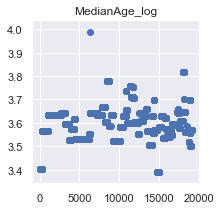

In [231]:
for i in num_df.columns:
    plt.figure(figsize=(3,3))
    plt.scatter(range(0,len(num_df[i])),num_df[i])
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.title(i)


### According to the scatter plot, we find most of the features contain outliers. 

### 3.2 Delete Outliers
We keep value of features within three standard deviations, because that's essentially 99% of the range.

In [232]:
numdf=num_df
for i in numdf.columns:
    feature = np.array(numdf[i])
    mean = np.mean(feature,axis=0)
    sd = np.std(feature, axis=0)
num_df=numdf

## 4. Skewed distribution 

### 4.1 Graph
Observe the skewness distribution of the features through the graph.

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Appliances')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

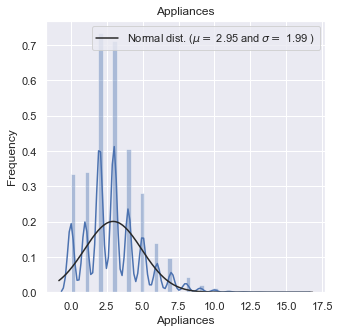

<Figure size 432x288 with 0 Axes>

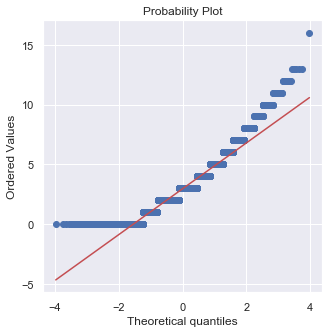

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Price')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

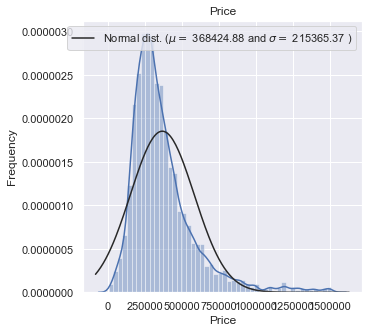

<Figure size 432x288 with 0 Axes>

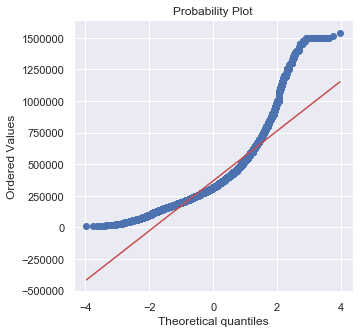

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'TaxAssessedValue')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

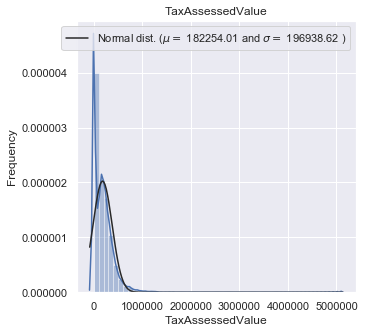

<Figure size 432x288 with 0 Axes>

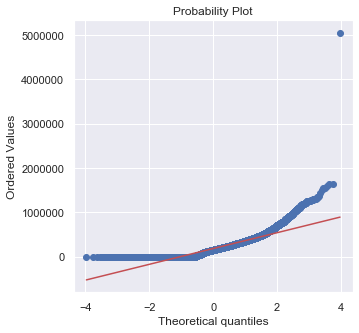

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'DaysOnZillow')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

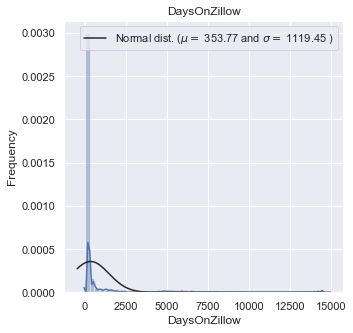

<Figure size 432x288 with 0 Axes>

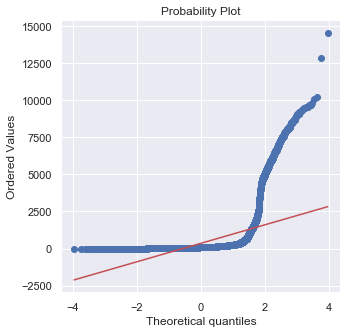

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'PageViewCount')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

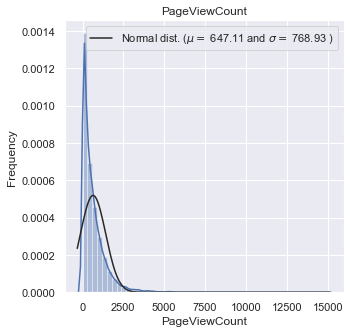

<Figure size 432x288 with 0 Axes>

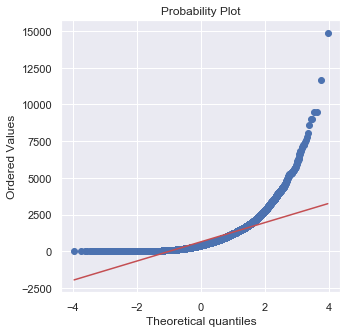

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'FavoriteCount')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

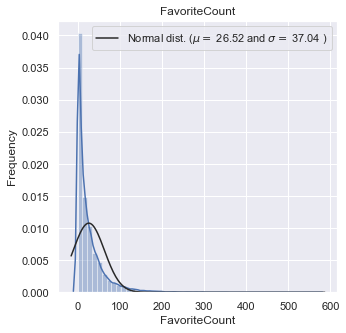

<Figure size 432x288 with 0 Axes>

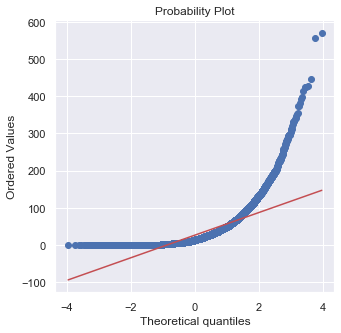

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Bedrooms')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

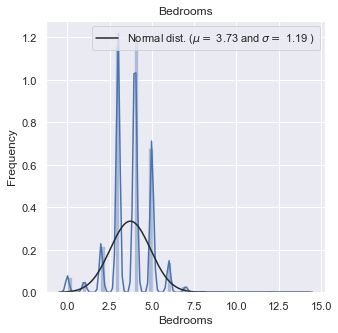

<Figure size 432x288 with 0 Axes>

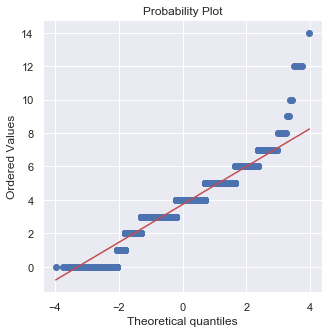

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Bathrooms')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

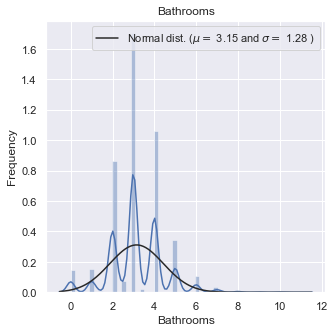

<Figure size 432x288 with 0 Axes>

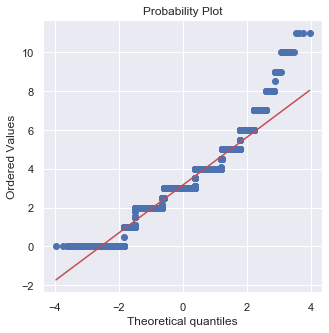

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Stories')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

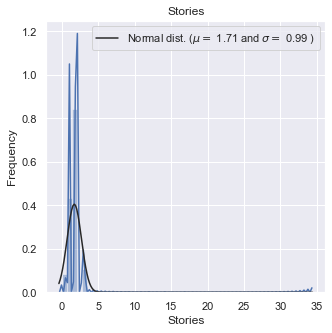

<Figure size 432x288 with 0 Axes>

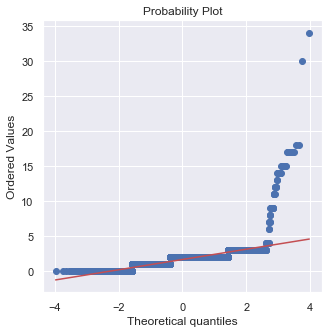

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'LivingArea')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

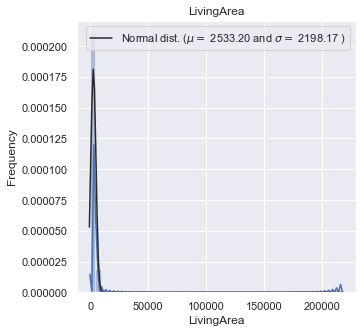

<Figure size 432x288 with 0 Axes>

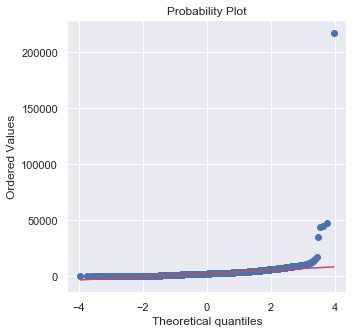

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'LotSize')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

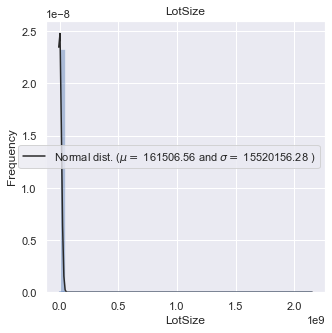

<Figure size 432x288 with 0 Axes>

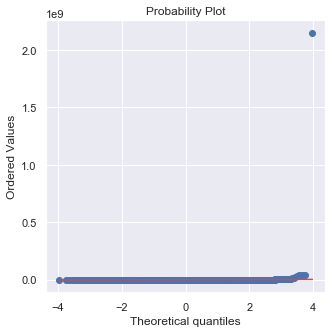

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Basement')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

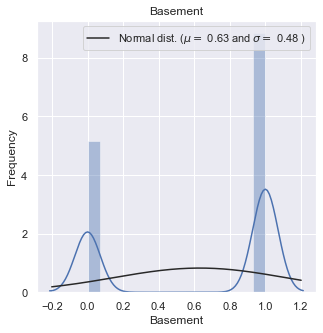

<Figure size 432x288 with 0 Axes>

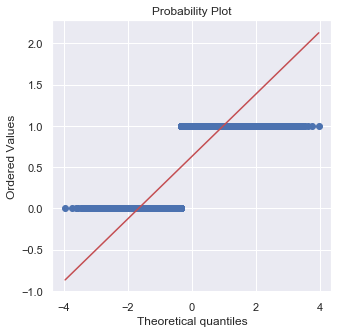

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'YearBuilt')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

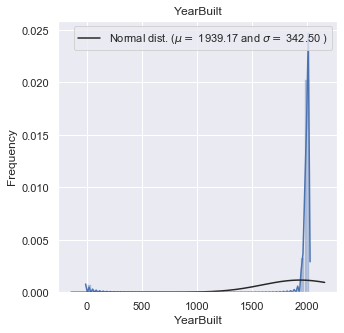

<Figure size 432x288 with 0 Axes>

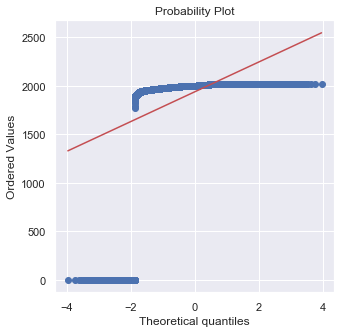

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'PrimarySchoolDistance')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

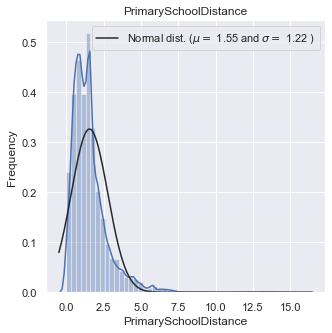

<Figure size 432x288 with 0 Axes>

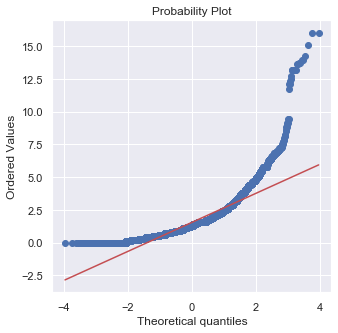

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'PrimarySchoolRating')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

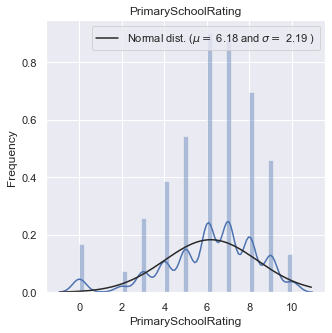

<Figure size 432x288 with 0 Axes>

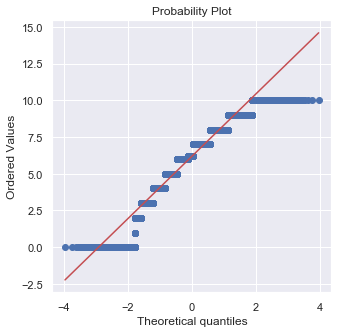

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'MiddleSchoolDistance')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

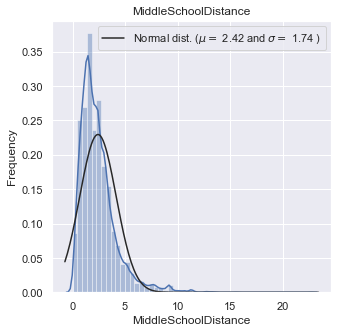

<Figure size 432x288 with 0 Axes>

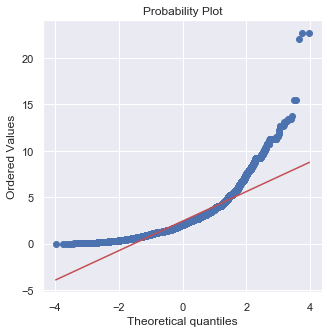

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'MiddleSchoolRating')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

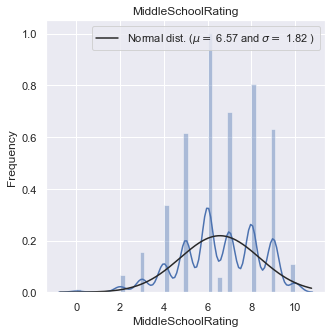

<Figure size 432x288 with 0 Axes>

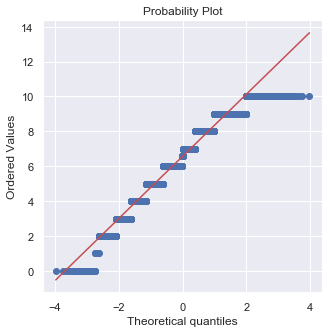

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'HighSchoolDistance')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

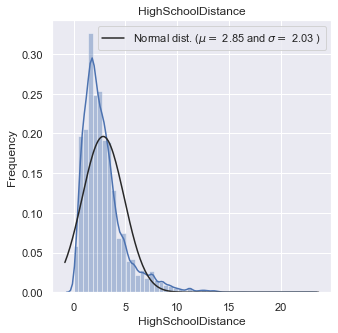

<Figure size 432x288 with 0 Axes>

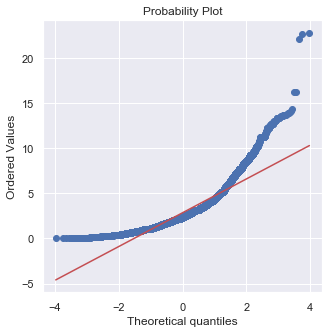

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'HighSchoolRating')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

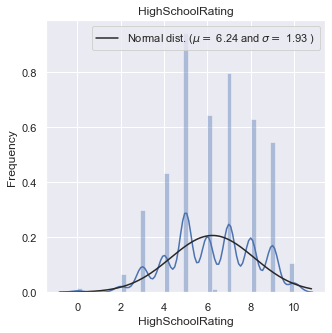

<Figure size 432x288 with 0 Axes>

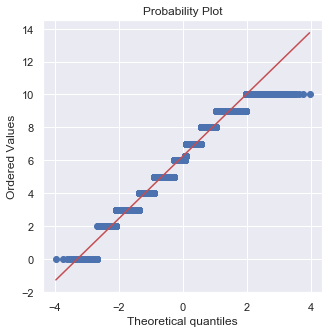

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'BusinessMailboxes')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

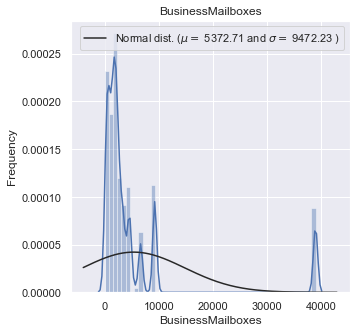

<Figure size 432x288 with 0 Axes>

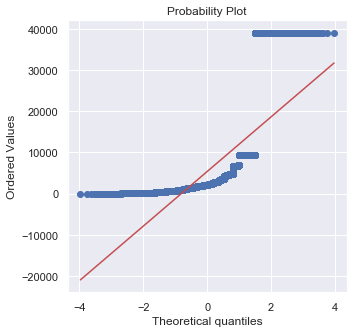

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'ResidentialMailboxes')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

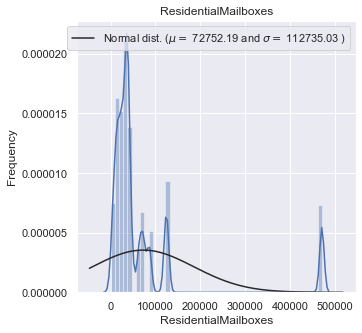

<Figure size 432x288 with 0 Axes>

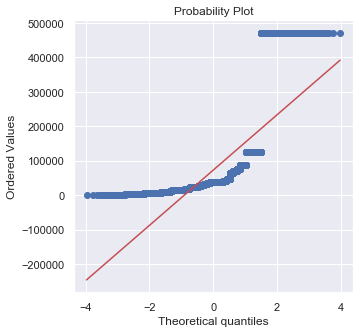

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'NumberofBusinesses')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

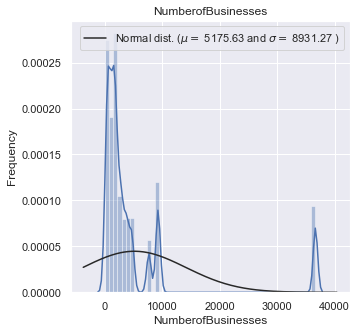

<Figure size 432x288 with 0 Axes>

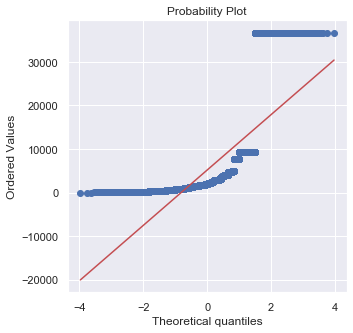

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'NumberofEmployees')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

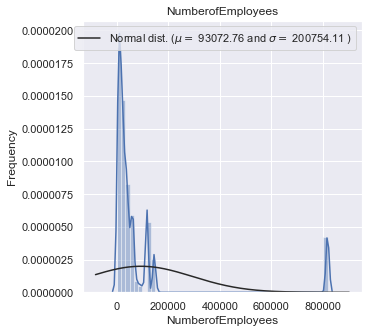

<Figure size 432x288 with 0 Axes>

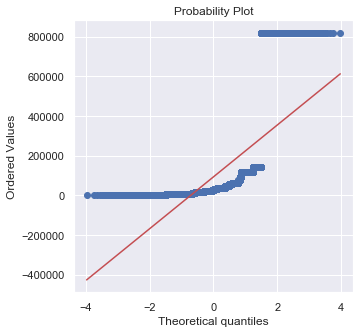

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Population2010')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

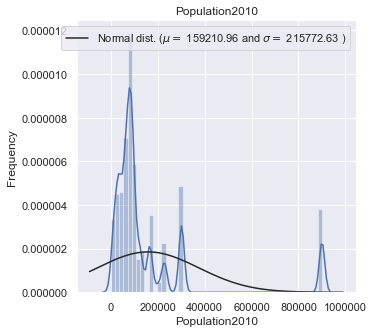

<Figure size 432x288 with 0 Axes>

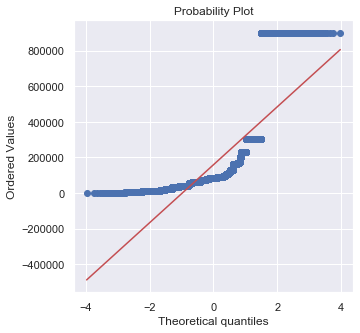

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'CurrentPopulation')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

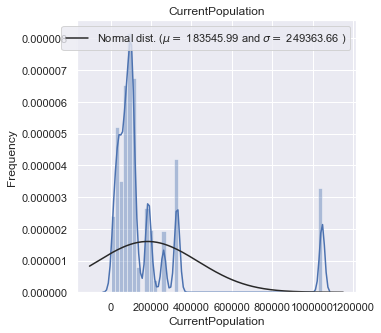

<Figure size 432x288 with 0 Axes>

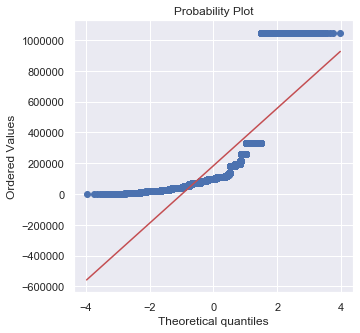

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'AmericanIndianPopulation')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

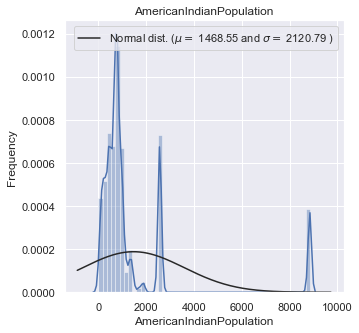

<Figure size 432x288 with 0 Axes>

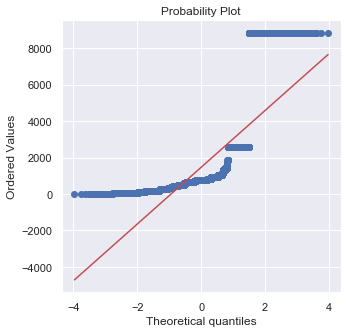

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'AsianPopulation')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

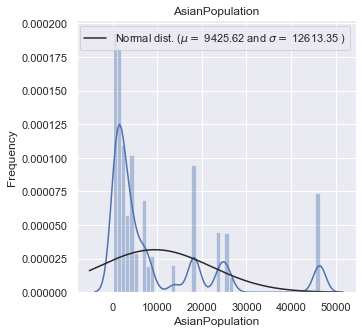

<Figure size 432x288 with 0 Axes>

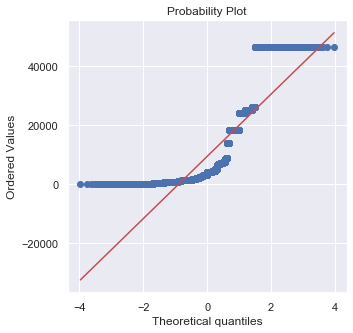

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'BlackPopulation')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

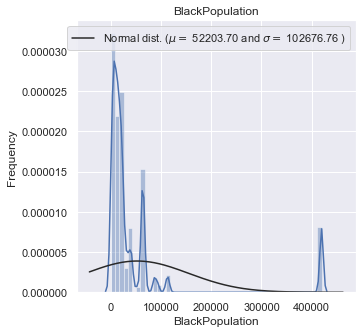

<Figure size 432x288 with 0 Axes>

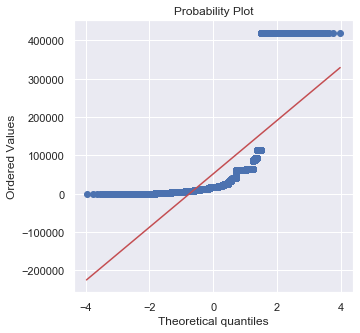

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'HawaiianPopulation')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

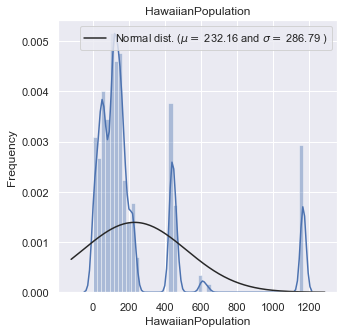

<Figure size 432x288 with 0 Axes>

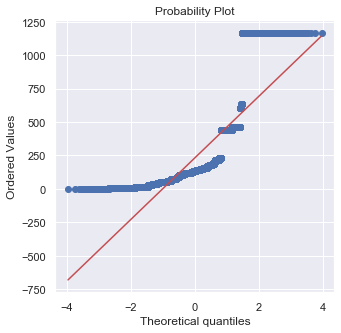

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'HispanicPopulation')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

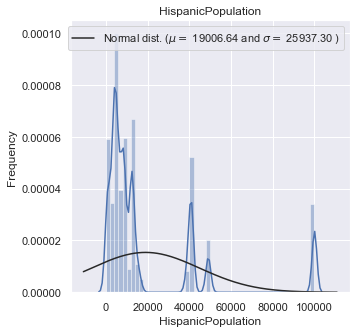

<Figure size 432x288 with 0 Axes>

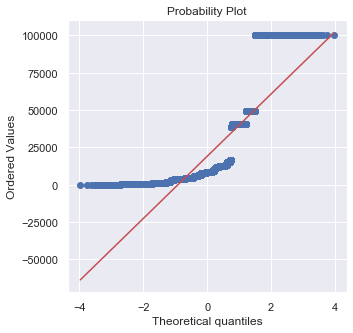

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'WhitePopulation')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

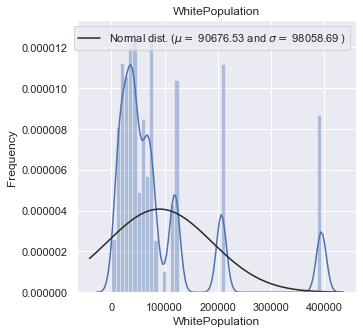

<Figure size 432x288 with 0 Axes>

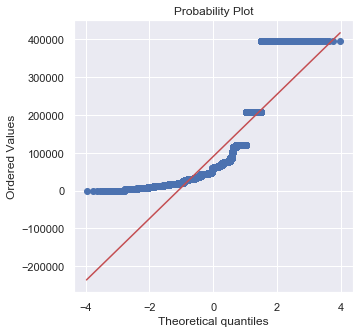

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'AnnualPayroll')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

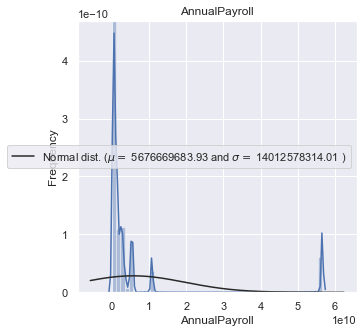

<Figure size 432x288 with 0 Axes>

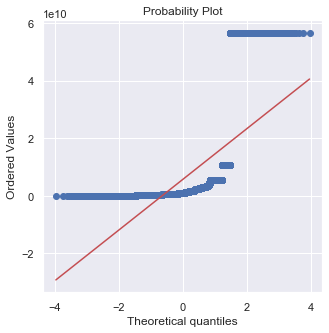

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Households')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

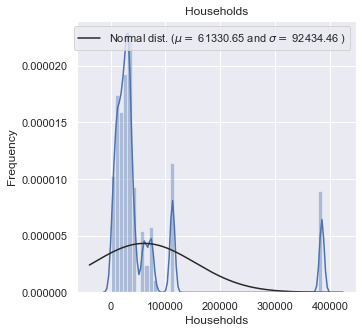

<Figure size 432x288 with 0 Axes>

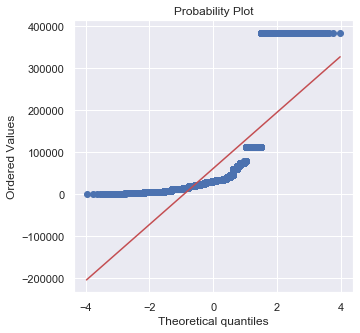

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'FemalePopulation')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

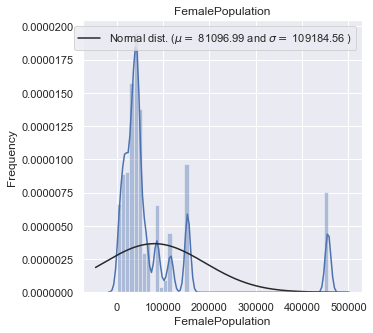

<Figure size 432x288 with 0 Axes>

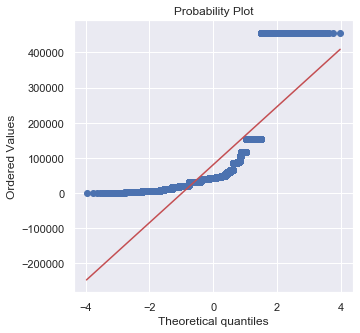

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'MalePopulation')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

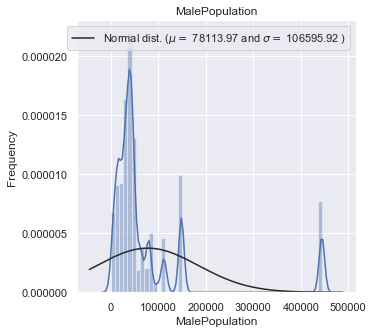

<Figure size 432x288 with 0 Axes>

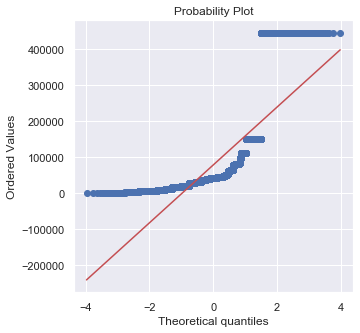

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'IncomePerHousehold')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

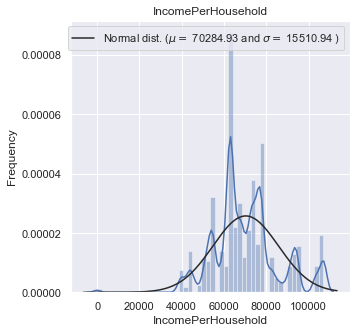

<Figure size 432x288 with 0 Axes>

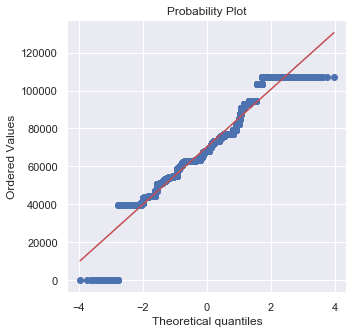

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'PersonsPerHousehold')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

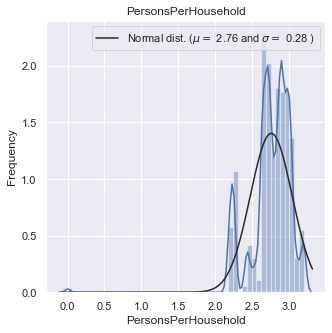

<Figure size 432x288 with 0 Axes>

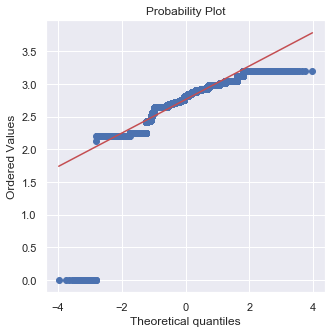

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'AverageHouseValue')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

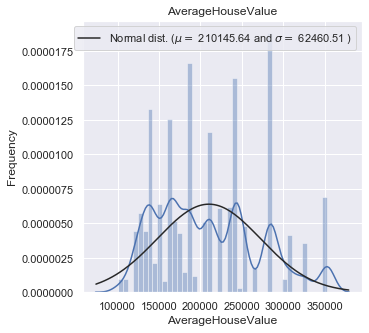

<Figure size 432x288 with 0 Axes>

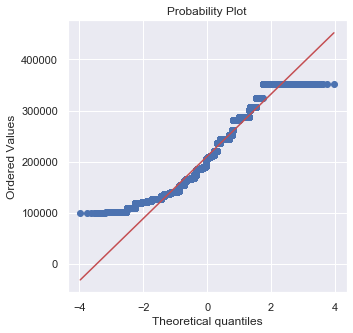

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'MaleMedianAge')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

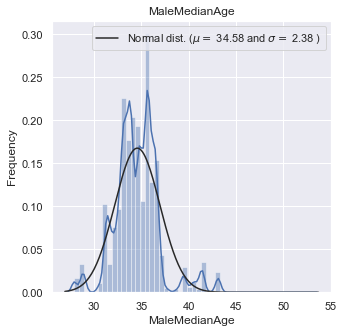

<Figure size 432x288 with 0 Axes>

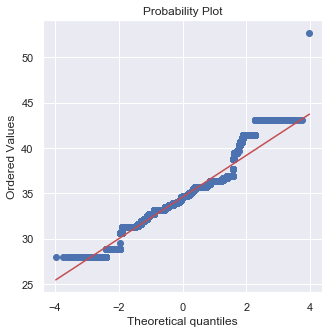

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'MedianAge')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

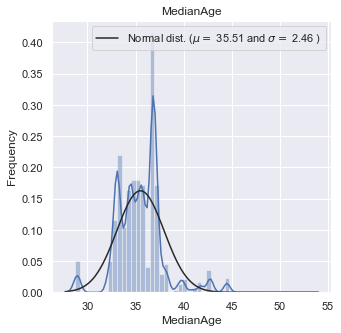

<Figure size 432x288 with 0 Axes>

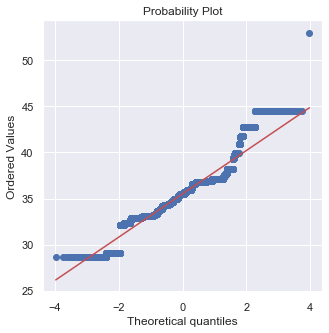

In [233]:
for k in ['Appliances','Price','TaxAssessedValue','DaysOnZillow',
          'PageViewCount', 'FavoriteCount','Bedrooms', 'Bathrooms', 'Stories',
          'LivingArea', 'LotSize', 'Basement', 'YearBuilt',
       'PrimarySchoolDistance', 'PrimarySchoolRating', 'MiddleSchoolDistance',
       'MiddleSchoolRating', 'HighSchoolDistance', 'HighSchoolRating',
       'BusinessMailboxes', 'ResidentialMailboxes', 'NumberofBusinesses',
       'NumberofEmployees', 'Population2010', 'CurrentPopulation',
       'AmericanIndianPopulation', 'AsianPopulation', 'BlackPopulation',
       'HawaiianPopulation', 'HispanicPopulation', 'WhitePopulation',
       'AnnualPayroll', 'Households', 'FemalePopulation', 'MalePopulation',
       'IncomePerHousehold', 'PersonsPerHousehold', 'AverageHouseValue',
       'MaleMedianAge', 'MedianAge']:
    df1=numdf
    
    fig = plt.figure()
    plt.figure(figsize=(5,5))
    sns.distplot(df1[k] , fit=norm) #画出数据的分布图
    (mu, sigma) = norm.fit(df1[k])  #求mu，sigma
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best') #画图例
    plt.ylabel('Frequency')
    plt.title(k)

    fig = plt.figure()
    plt.figure(figsize=(5,5))
    res = stats.probplot(df1[k], plot=plt) #画拟合曲线
    plt.show()

### According to the graph of distribution and QQ plot, we find most of the features  follow  skewed distribution.

### 4.2  Transfer skewed distribution to normal
As the transformation we do in the data processing part, we took the log of the value of the features, so we can modify the distribution of the features to normal distribution.

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Appliances_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

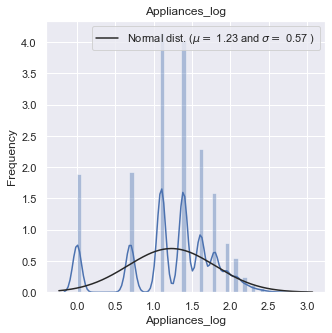

<Figure size 432x288 with 0 Axes>

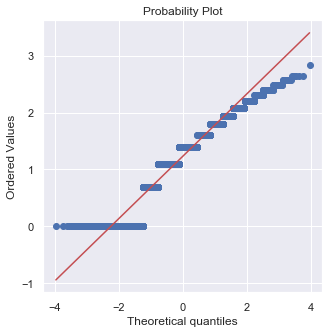

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Price_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

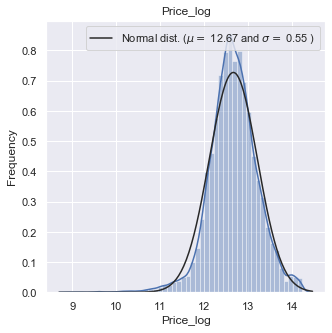

<Figure size 432x288 with 0 Axes>

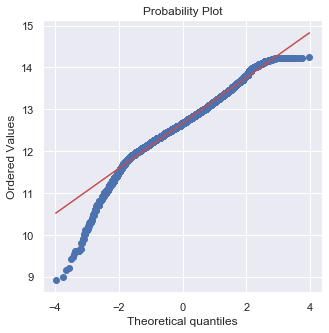

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'TaxAssessedValue_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

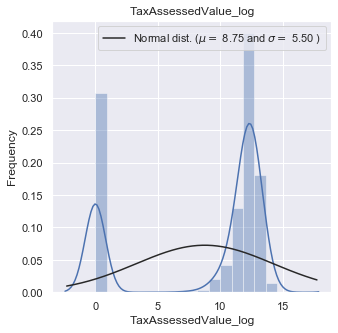

<Figure size 432x288 with 0 Axes>

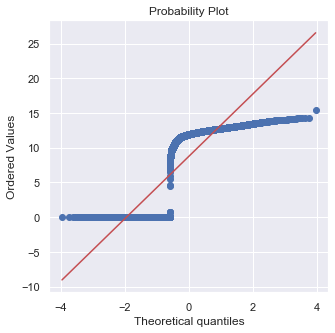

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'DaysOnZillow_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

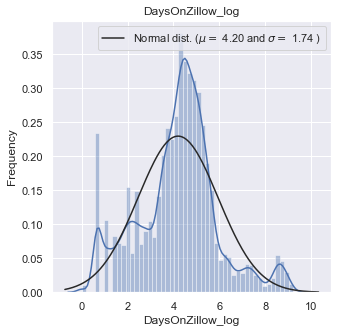

<Figure size 432x288 with 0 Axes>

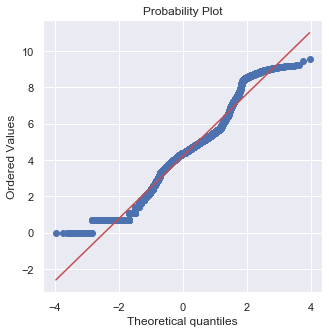

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'PageViewCount_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

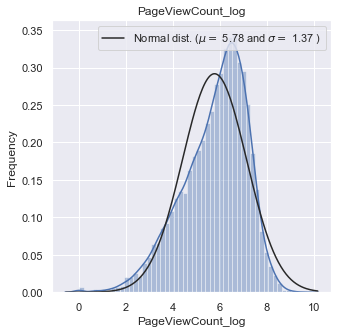

<Figure size 432x288 with 0 Axes>

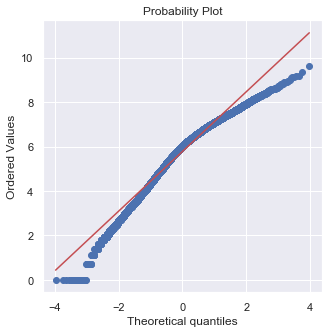

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'FavoriteCount_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

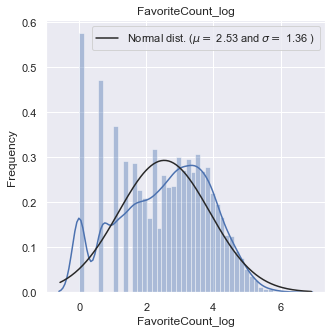

<Figure size 432x288 with 0 Axes>

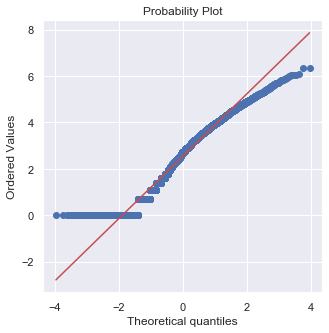

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Bedrooms_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

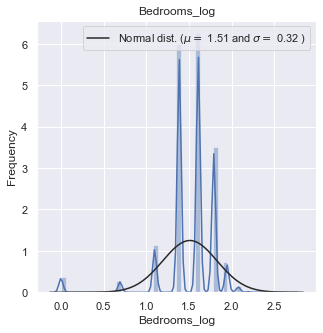

<Figure size 432x288 with 0 Axes>

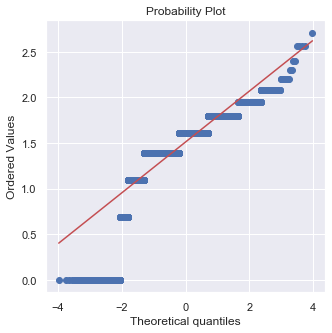

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Bathrooms_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

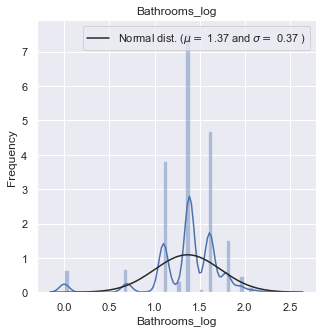

<Figure size 432x288 with 0 Axes>

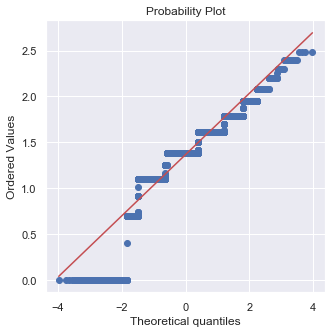

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Stories_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

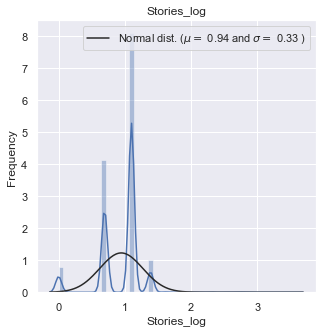

<Figure size 432x288 with 0 Axes>

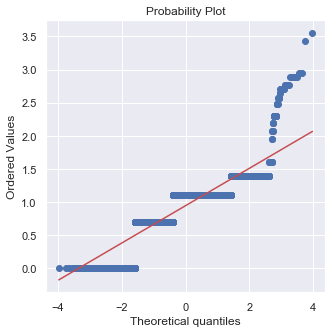

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'LivingArea_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

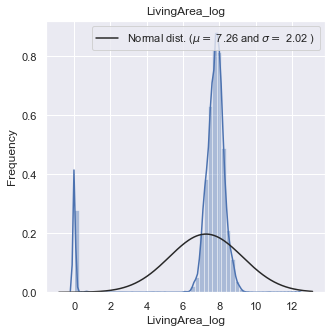

<Figure size 432x288 with 0 Axes>

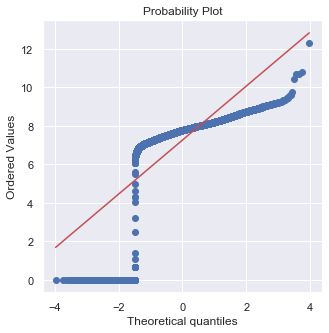

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'LotSize_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

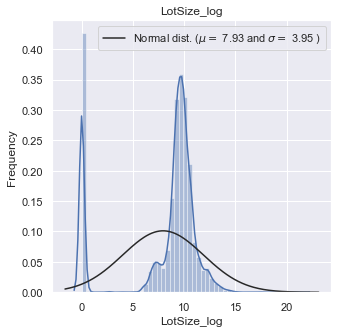

<Figure size 432x288 with 0 Axes>

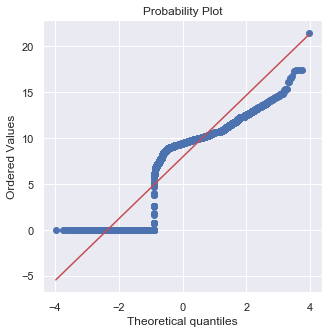

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Basement_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

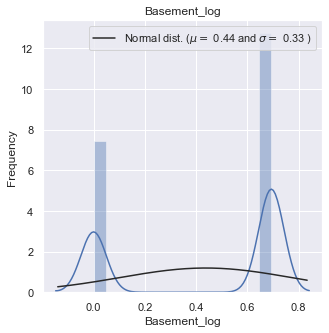

<Figure size 432x288 with 0 Axes>

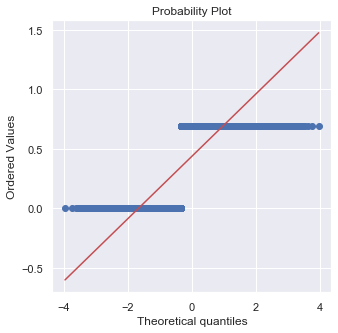

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'YearBuilt_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

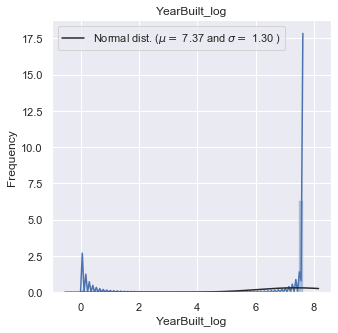

<Figure size 432x288 with 0 Axes>

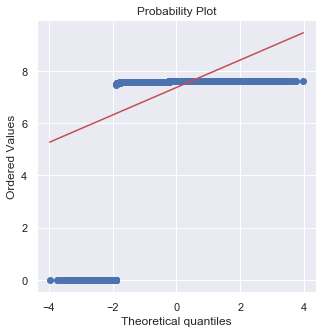

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'PrimarySchoolDistance_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

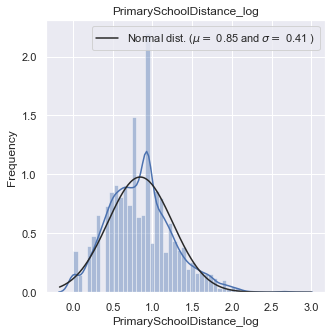

<Figure size 432x288 with 0 Axes>

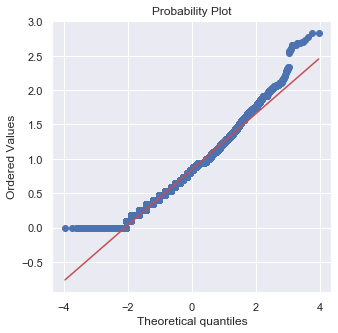

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'PrimarySchoolRating_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

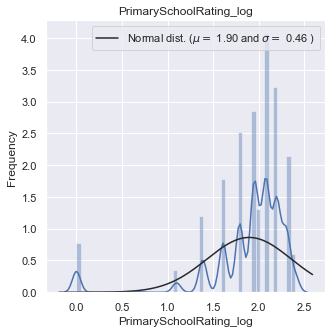

<Figure size 432x288 with 0 Axes>

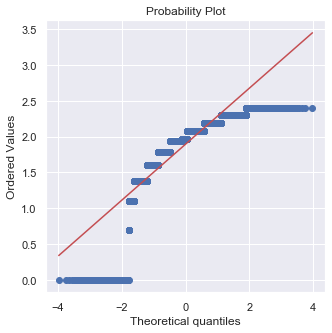

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'MiddleSchoolDistance_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

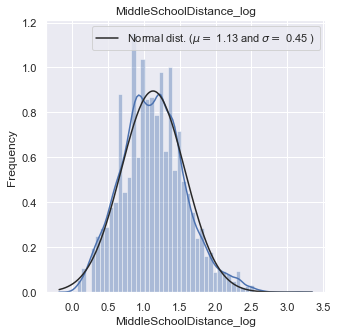

<Figure size 432x288 with 0 Axes>

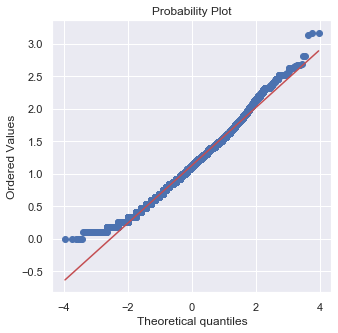

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'MiddleSchoolRating_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

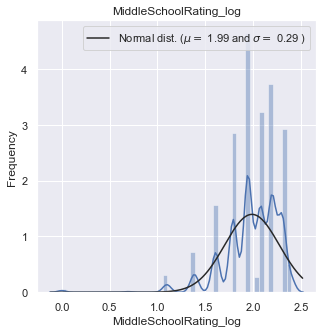

<Figure size 432x288 with 0 Axes>

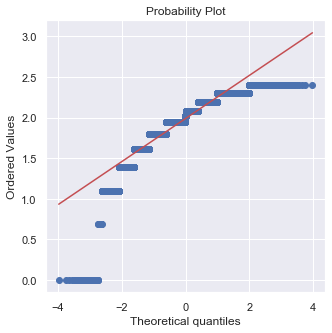

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'HighSchoolDistance_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

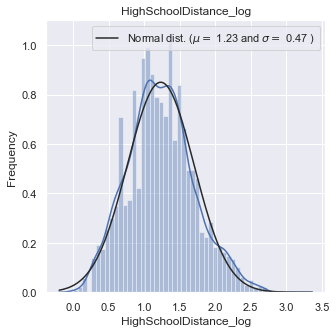

<Figure size 432x288 with 0 Axes>

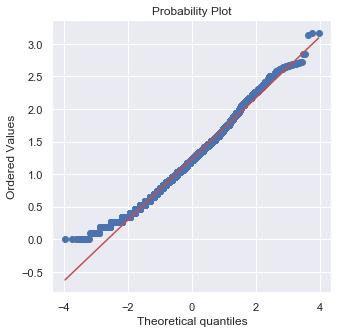

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'HighSchoolRating_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

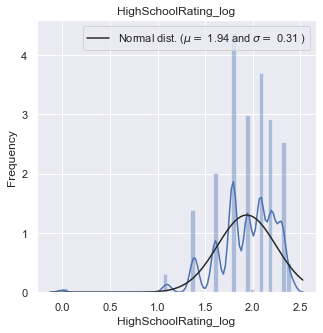

<Figure size 432x288 with 0 Axes>

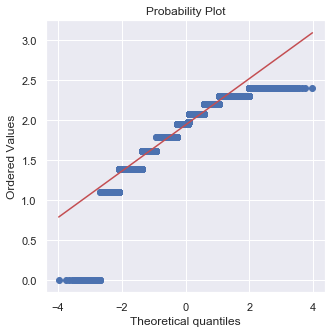

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'BusinessMailboxes_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

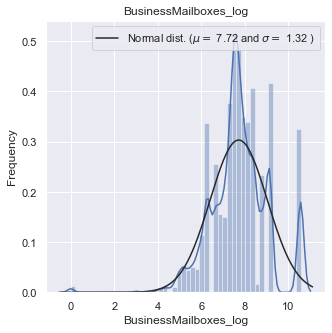

<Figure size 432x288 with 0 Axes>

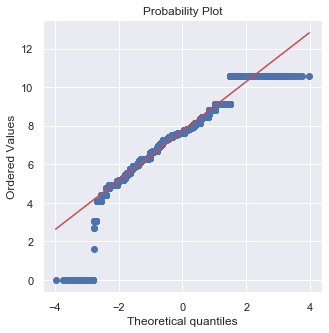

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'ResidentialMailboxes_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

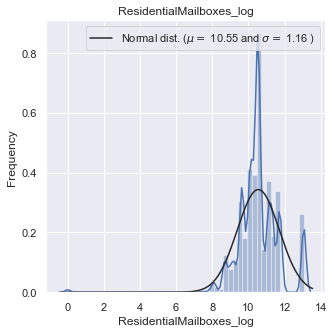

<Figure size 432x288 with 0 Axes>

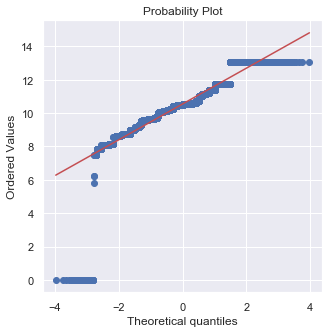

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'NumberofBusinesses_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

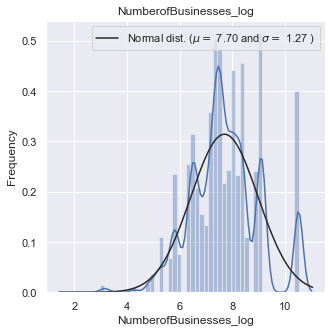

<Figure size 432x288 with 0 Axes>

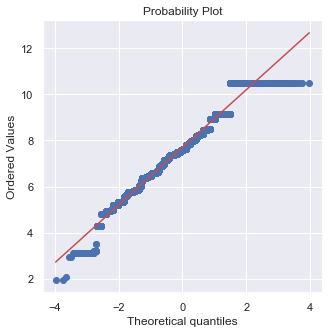

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'NumberofEmployees_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

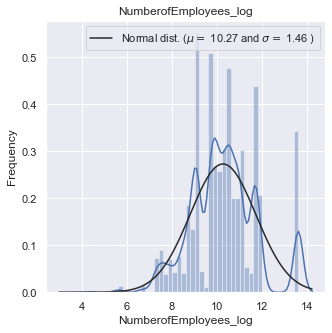

<Figure size 432x288 with 0 Axes>

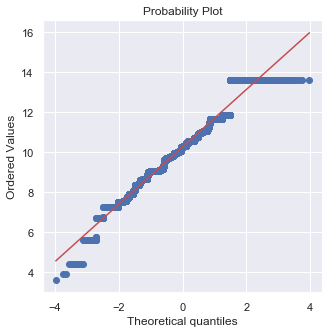

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Population2010_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

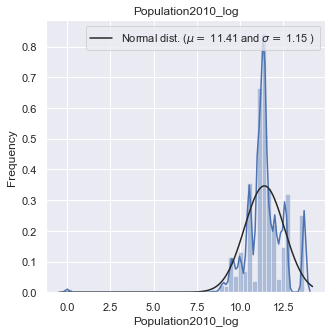

<Figure size 432x288 with 0 Axes>

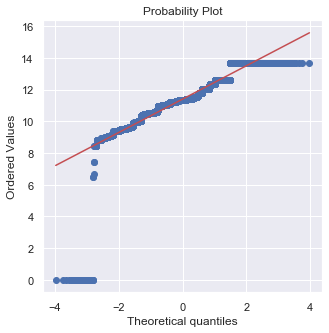

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'CurrentPopulation_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

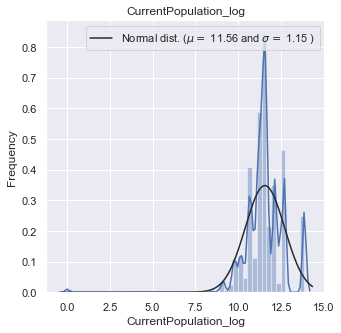

<Figure size 432x288 with 0 Axes>

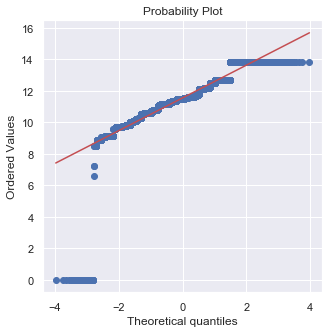

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'AmericanIndianPopulation_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

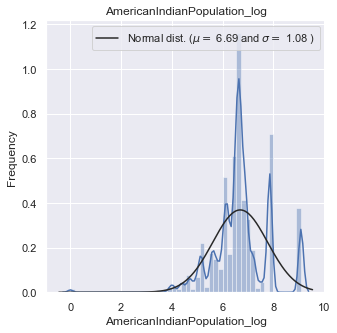

<Figure size 432x288 with 0 Axes>

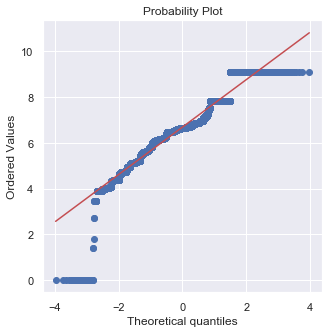

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'AsianPopulation_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

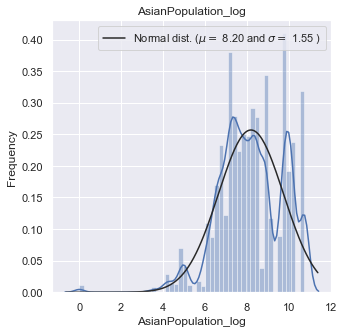

<Figure size 432x288 with 0 Axes>

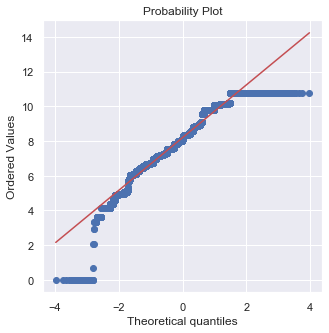

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'BlackPopulation_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

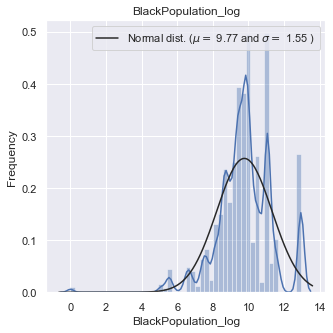

<Figure size 432x288 with 0 Axes>

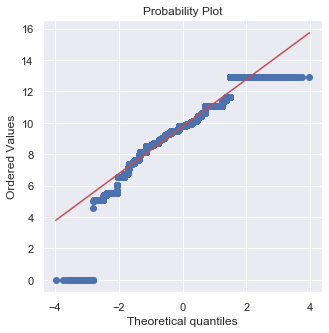

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'HawaiianPopulation_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

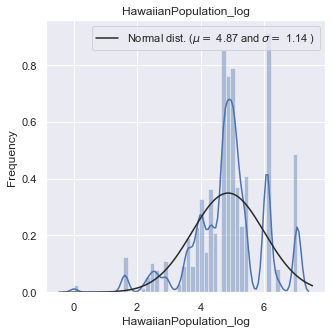

<Figure size 432x288 with 0 Axes>

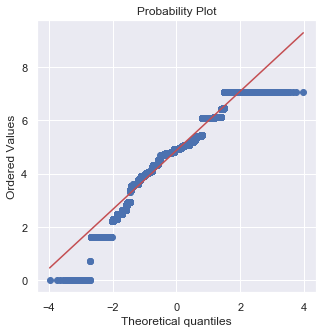

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'HispanicPopulation_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

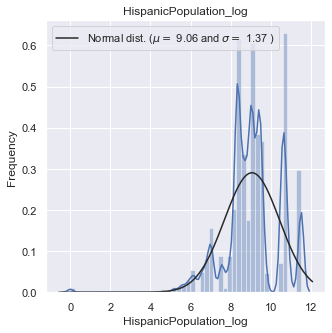

<Figure size 432x288 with 0 Axes>

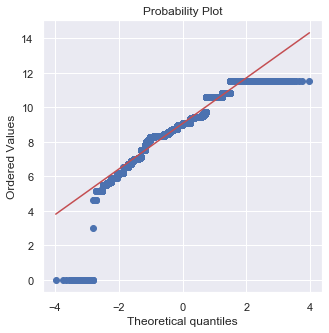

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'WhitePopulation_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

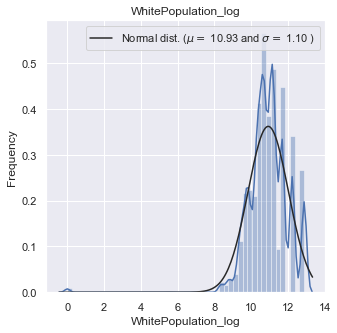

<Figure size 432x288 with 0 Axes>

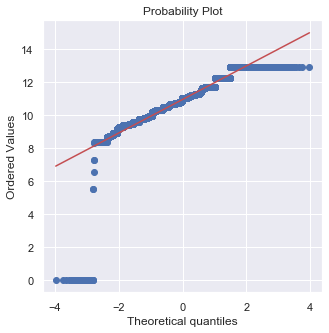

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'AnnualPayroll_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

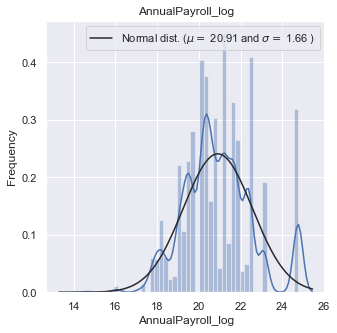

<Figure size 432x288 with 0 Axes>

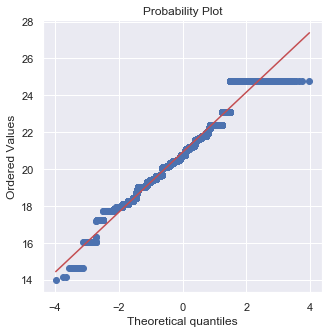

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Households_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

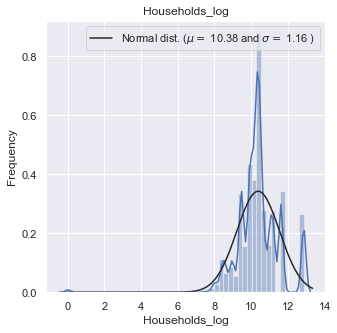

<Figure size 432x288 with 0 Axes>

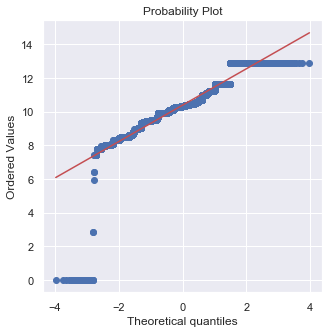

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'FemalePopulation_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

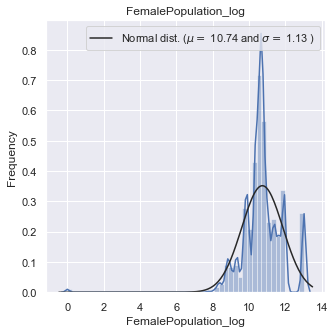

<Figure size 432x288 with 0 Axes>

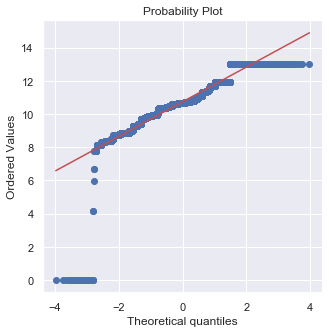

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'MalePopulation_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

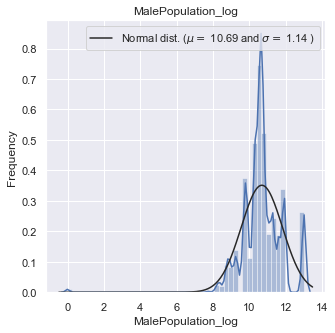

<Figure size 432x288 with 0 Axes>

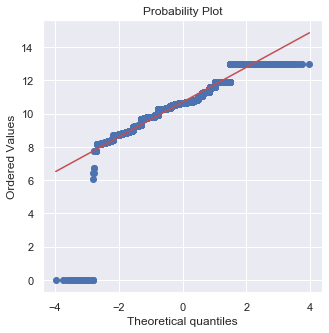

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'IncomePerHousehold_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

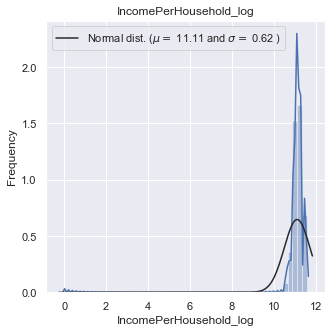

<Figure size 432x288 with 0 Axes>

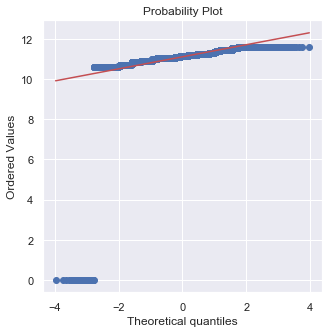

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'PersonsPerHousehold_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

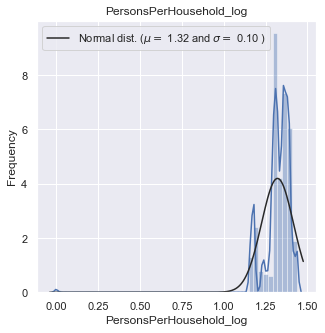

<Figure size 432x288 with 0 Axes>

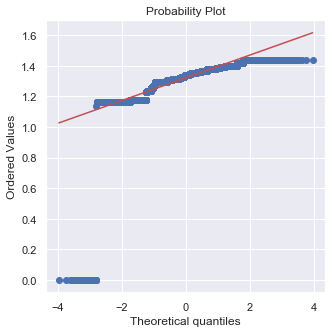

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'AverageHouseValue_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

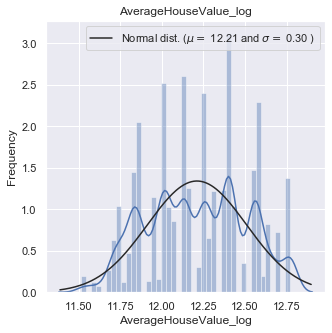

<Figure size 432x288 with 0 Axes>

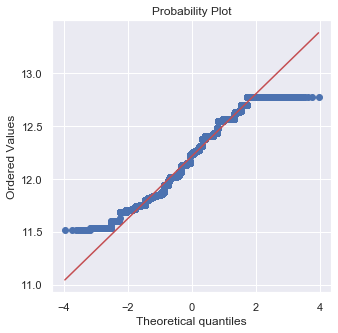

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'MaleMedianAge_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

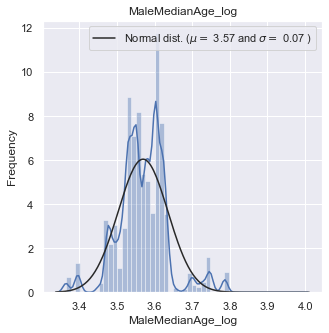

<Figure size 432x288 with 0 Axes>

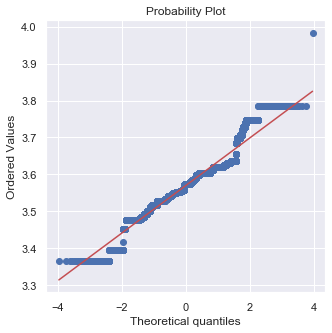

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'MedianAge_log')

<Figure size 360x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

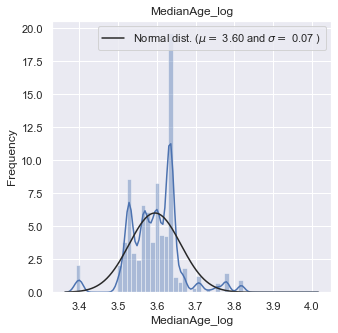

<Figure size 432x288 with 0 Axes>

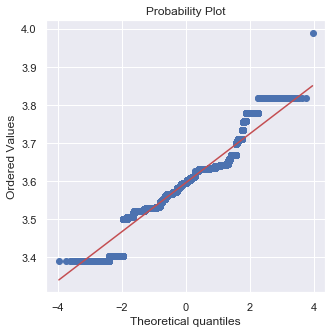

In [234]:
for k in ['Appliances_log','Price_log','TaxAssessedValue_log','DaysOnZillow_log',
          'PageViewCount_log', 'FavoriteCount_log','Bedrooms_log', 'Bathrooms_log', 'Stories_log',
          'LivingArea_log', 'LotSize_log', 'Basement_log','YearBuilt_log', 'PrimarySchoolDistance_log', 'PrimarySchoolRating_log',
       'MiddleSchoolDistance_log', 'MiddleSchoolRating_log',
       'HighSchoolDistance_log', 'HighSchoolRating_log',
       'BusinessMailboxes_log', 'ResidentialMailboxes_log',
       'NumberofBusinesses_log', 'NumberofEmployees_log', 'Population2010_log',
       'CurrentPopulation_log', 'AmericanIndianPopulation_log',
       'AsianPopulation_log', 'BlackPopulation_log', 'HawaiianPopulation_log',
       'HispanicPopulation_log', 'WhitePopulation_log', 'AnnualPayroll_log',
       'Households_log', 'FemalePopulation_log', 'MalePopulation_log',
       'IncomePerHousehold_log', 'PersonsPerHousehold_log',
       'AverageHouseValue_log', 'MaleMedianAge_log', 'MedianAge_log']:
    df1=num_df_log
    
    fig = plt.figure()
    plt.figure(figsize=(5,5))
    sns.distplot(df1[k] , fit=norm) #画出数据的分布图
    (mu, sigma) = norm.fit(df1[k])  #求mu，sigma
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best') #画图例
    plt.ylabel('Frequency')
    plt.title(k)

    fig = plt.figure()
    plt.figure(figsize=(5,5))
    res = stats.probplot(df1[k], plot=plt) #画拟合曲线
    plt.show()

## 5.Test Hypotheses

### 5.1 Hypothese
+ 1.H0:The numbers of bedrooms/ bathrooms would be important features to affect house price
+ 2.H0:The numbers of living areas would be important features to affect house price.
+ 3.H0:The Tax Assessed Value would be important features to affect house price.
+ 4.H0:The distance of middle school and the rate of middle school would be important features to affect house price.
+ 5.H0:The distance of primary school and the rate of primary school would be important features to affect house price.
+ 6.H0:The distance of high school and the rate of high school would be important features to affect house price.
+ 7.H0:There is no strong correlation between the variables.

### 5.2 H0(1-4)
We use XGboost Feature Importance to solve the first four hypotheses.

[15:46:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

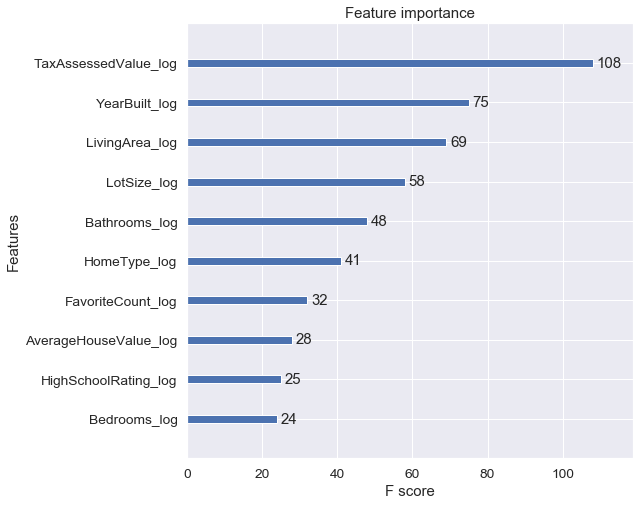

In [297]:
model = XGBRegressor()
model.fit(x_train, y_train)
plot_importance(model, max_num_features=10)
plt.show()

Acccording to the result, 
+ We can not refuse the first hypothese,
+ we can not refuse the second hypothese,
+ we can not refuse the third hypothese,
+ we refuse the forth hypothese,
+ we refuse the fifth hypothese,
+ we can not refuse the sixth hypothese.

### 5.3 H0(5)
We do the Correlation Analysis to test the the fifth hypotheses.

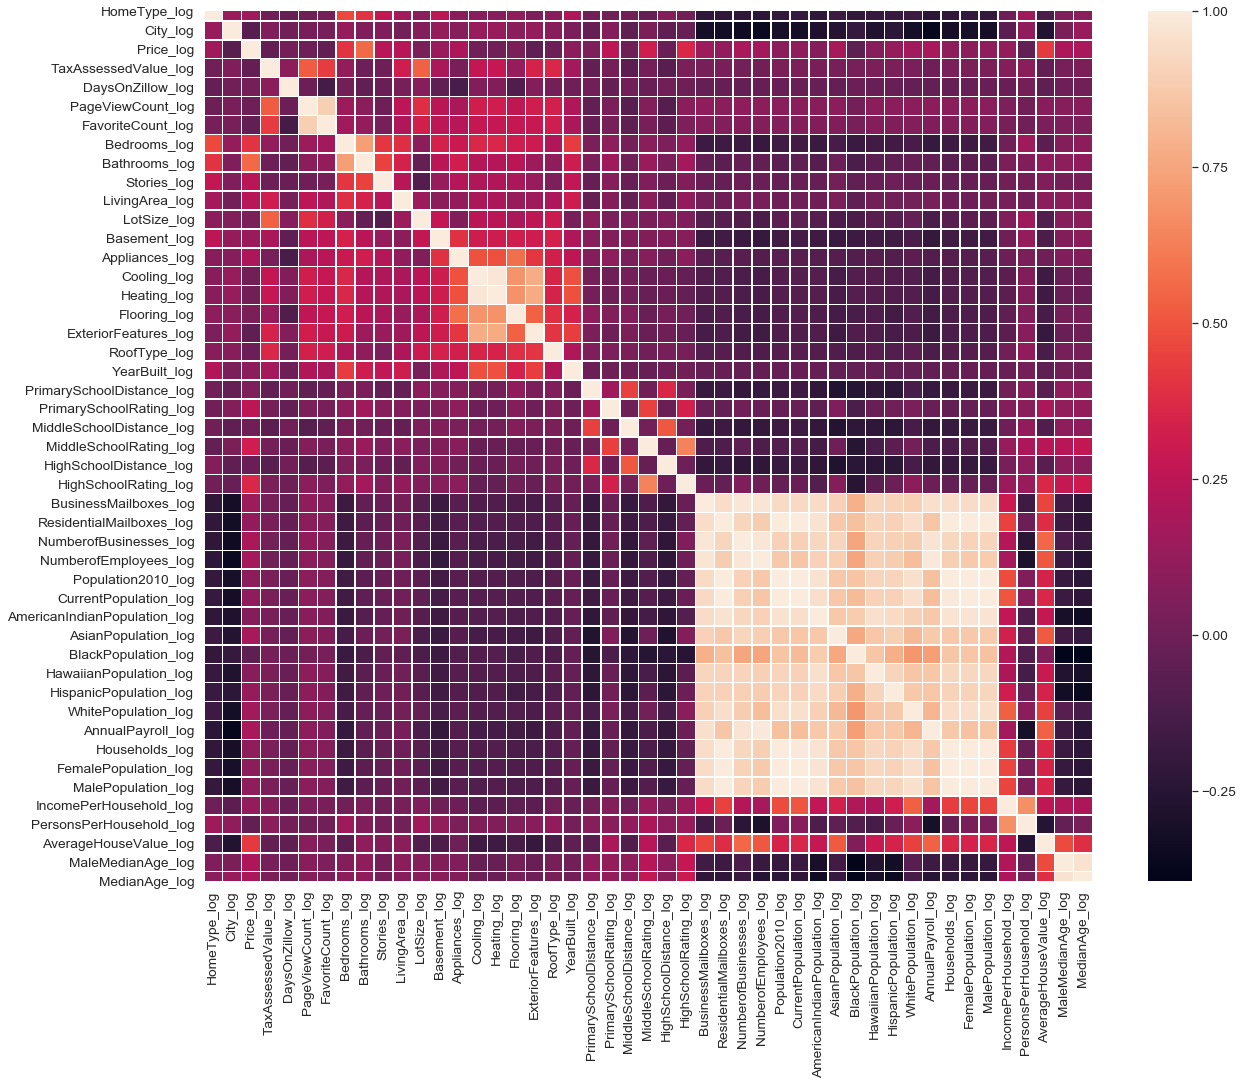

In [298]:
#Correlation Analysis
df=num_df_log
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 16))
#sns.heatmap(corrmat, vmax=.8, square=True)
sns.heatmap(corrmat, fmt="d", square=True, linewidths=.5)

#### Accord to the Correlation analysis,we find Features('BusinessMailboxes', 'ResidentialMailboxes', 'NumberofBusinesses','NumberofEmployees', 'Population2010', 'CurrentPopulation','AmericanIndianPopulation', 'AsianPopulation', 'BlackPopulation','HawaiianPopulation', 'HispanicPopulation', 'WhitePopulation','AnnualPayroll', 'Households', 'FemalePopulation', 'MalePopulation') have strong correlation.

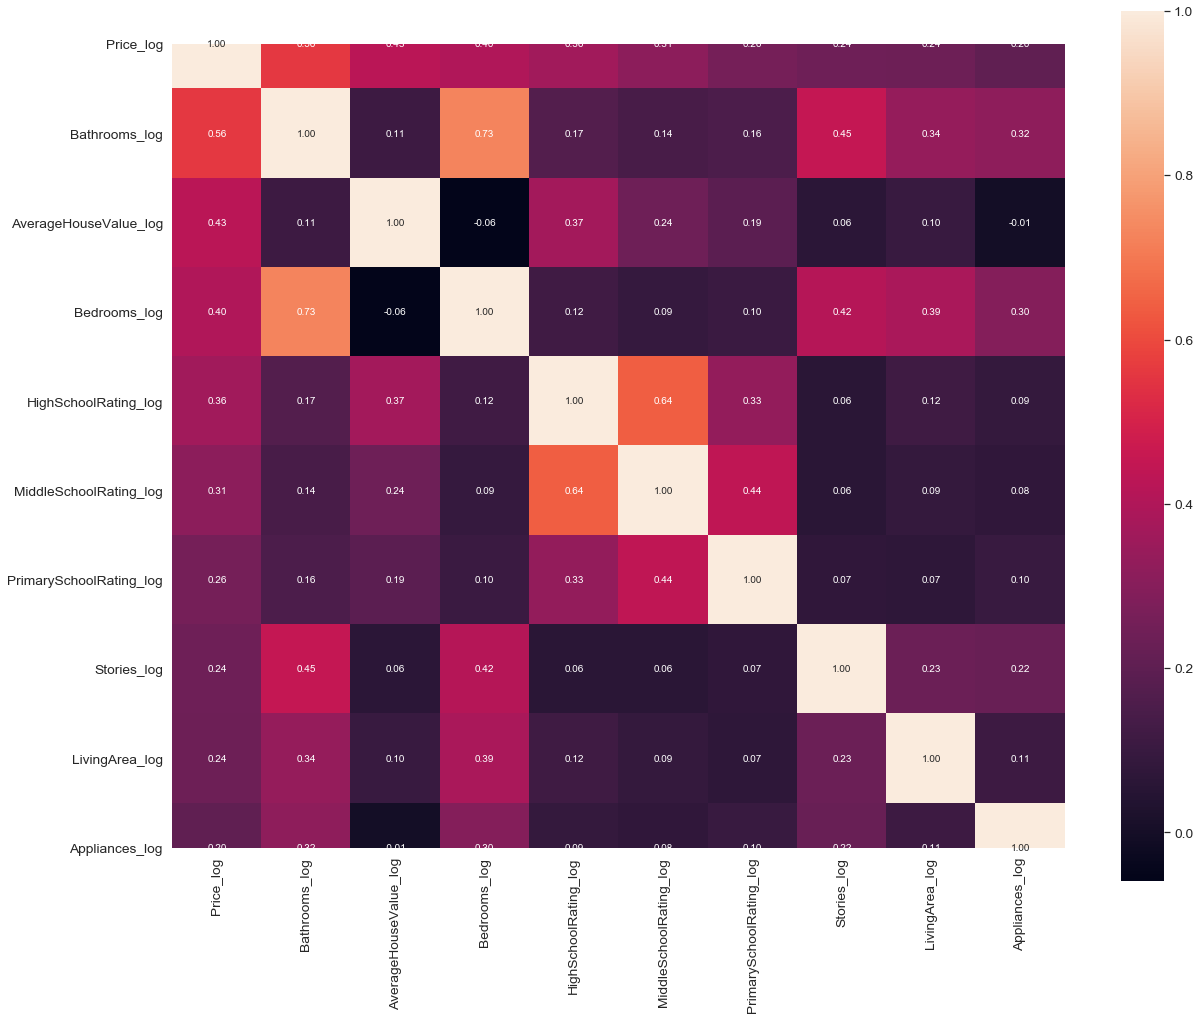

In [317]:
k = 10
cols = corrmat.nlargest(k, 'Price_log')['Price_log'].index
#df[["HighSchoolRating",'MiddleSchoolRating','PrimarySchoolRating']] = df[["HighSchoolRating",'MiddleSchoolRating','PrimarySchoolRating']].astype("float")
cm = df[cols].corr()
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(20, 16))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Dataset after transformation:num_df_log

In [292]:
num_df_log.describe()

HomeType_log      City_log     Price_log  TaxAssessedValue_log  \
count  19173.000000  19173.000000  19173.000000          19173.000000   
mean       1.730991      3.152491     12.671136              8.751206   
std        0.273359      1.086894      0.548613              5.496046   
min        0.000000      0.000000      8.922792              0.000000   
25%        1.791759      2.772589     12.345839              0.000000   
50%        1.791759      3.610918     12.663469             11.921060   
75%        1.791759      3.931826     13.001384             12.534336   
max        1.945910      4.276666     14.247294             15.434986   

       DaysOnZillow_log  PageViewCount_log  FavoriteCount_log  Bedrooms_log  \
count      19173.000000       19173.000000       19173.000000  19173.000000   
mean           4.199001           5.777254           2.534748      1.511634   
std            1.739694           1.367594           1.360974      0.318901   
min            0.000000           0.000000           0.000000      0.000000   
25%            3.295837           4.927254           1.609438      1.386294   
50%            4.356709           6.018593           2.708050      1.609438   
75%            5.111988           6.785588           3.583519      1.609438   
max            9.584452           9.607639           6.349139      2.708050   

       Bathrooms_log   Stories_log  ...  WhitePopulation_log  \
count   19173.000000  19173.000000  ...         19173.000000   
mean        1.366232      0.944764  ...            10.934784   
std         0.365976      0.325295  ...             1.101604   
min         0.000000      0.000000  ...             0.000000   
25%         1.098612      0.693147  ...            10.322527   
50%         1.386294      1.098612  ...            11.005660   
75%         1.609438      1.098612  ...            11.647343   
max         2.484907      3.555348  ...            12.885387   

       AnnualPayroll_log  Households_log  FemalePopulation_log  \
count       19173.000000    19173.000000          19173.000000   
mean           20.912056       10.382553             10.737048   
std             1.658224        1.163525              1.134069   
min            13.987783        0.000000              0.000000   
25%            19.685965        9.899580             10.332930   
50%            20.762303       10.336924             10.668211   
75%            21.787815       11.002616             11.349747   
max            24.758774       12.860736             13.030011   

       MalePopulation_log  IncomePerHousehold_log  PersonsPerHousehold_log  \
count        19173.000000            19173.000000             19173.000000   
mean            10.690106               11.110147                 1.320942   
std              1.135943                0.617433                 0.095212   
min              0.000000                0.000000                 0.000000   
25%             10.273084               11.044859                 1.291918   
50%             10.653865               11.127336                 1.337547   
75%             11.297428               11.254569                 1.373716   
max             13.004442               11.580399                 1.435085   

       AverageHouseValue_log  MaleMedianAge_log  MedianAge_log  
count           19173.000000       19173.000000   19173.000000  
mean               12.211503           3.569531       3.595412  
std                 0.297935           0.066101       0.066458  
min                11.512935           3.364994       3.391147  
25%                11.998286           3.529077       3.552487  
50%                12.238061           3.573282       3.597312  
75%                12.403639           3.602777       3.632687  
max                12.773305           3.983413       3.988984  

[8 rows x 47 columns]

# PART THREE

# Linear Regression Model 

In [51]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
pred_train = model.predict(x_train)
pred_train_and_truth_train = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth_train.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.556079              12.238675             283815.0   
18253                12.636126              12.574185             307468.0   
4741                 13.121579              13.945662             499608.0   
8406                 12.658403              12.312687             314394.0   
234                  12.865758              13.060277             386837.0   
11125                12.644936              12.610173             310189.0   
2813                 12.937120              13.060277             415451.0   
698                  12.998240              13.199141             441636.0   
10623                13.100364              13.384729             489121.0   
16239                12.542968              12.577636             280119.0   
15949                12.455405              12.049425             256634.0   
1668                 12.850045              12.911645             380806.0   
3372                 13.104070              13.485618             490936.0   
10397                12.487891              12.425212             265108.0   
17489                11.894047              12.383675             146393.0   
6284                 13.204633              12.895553             542875.0   
9598                 12.799507              12.498373             362039.0   
12770                12.286667              11.774528             216786.0   
6068                 12.806256              12.891669             364490.0   
8000                 13.206723              12.779594             544010.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [53]:
metrics_new(pred_train_and_truth_train['predict_train_price'], pred_train_and_truth_train['truth_train_price'])

MSE: 24232630584.36
RMSE: 155668.34
R^2: 0.475


In [54]:
pred = model.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.776966        12.672950       353969.0     319001.0
17892          12.134827        12.100718       186247.0     180001.0
12198          12.778883        12.736704       354649.0     340001.0
9774           12.667722        12.594734       317338.0     295001.0
18511          12.309434        11.938200       221778.0     153001.0
18437          12.396334        12.341438       241913.0     228991.0
8661           13.192121        13.038440       536124.0     459751.0
14024          13.053426        12.985170       466693.0     435901.0
12975          12.701386        12.514296       328202.0     272201.0
4385           12.478052        12.257041       262512.0     210458.0
18095          12.740454        12.736410       341279.0     339901.0
13870          12.962142        13.361382       425978.0     635001.0
9663           12.567285        12.429220       287014.0     250001.0
15665          12.205366        11.956976       199859.0     155901.0
6755           13.074740        13.997833       476747.0    1200001.0
2695           12.736137        12.524166       339808.0     274901.0
15953          12.270244        12.205578       213255.0     199901.0
16692          12.416146        12.706821       246754.0     329991.0
14             12.061417        11.660492       173064.0     115901.0
15851          12.430727        12.165256       250378.0     192001.0

In [55]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 23692169913.22
RMSE: 153922.61
R^2: 0.494


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'LinerRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

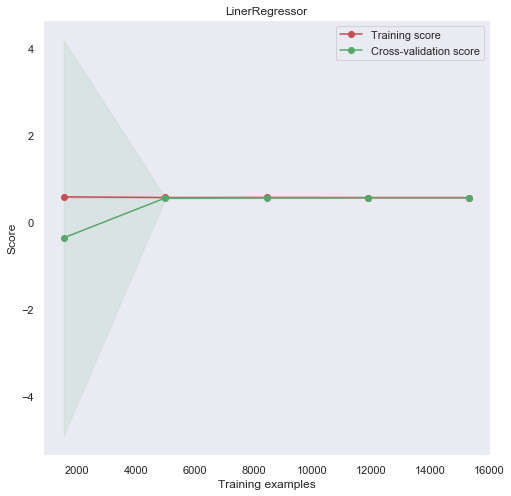

In [56]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('LinerRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(linear_model.LinearRegression(), X, Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Suprised Result about Linear Regression

We got suprised result from linear model. The R^2 of linear model in train set is 0.475 and the R^2 of linear model in test set is 0.494. The "accuracy" of linear model in test set is larger than train set. We thought the the problem would caused by under-fitting. Because underfitting of linear regression, and train set has much larger number of data than test set. Therefore, train test's total variation is much bigger than test set's. R^2 caculated by explained variation/ total variation. Therefore, test set's R^2 is higher than train set's. In conclusion, the main reason is underfitting. 

# Lasso before tunning

In [57]:
from sklearn.linear_model import LassoCV

lasso_before_tune = LassoCV(random_state=42)
lasso_before_tune.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=42, selection='cyclic',
        tol=0.0001, verbose=False)

In [58]:
pred_train = lasso_before_tune.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.560945              12.238675             285200.0   
18253                12.589637              12.574185             293501.0   
4741                 13.092976              13.945662             485520.0   
8406                 12.715466              12.312687             332856.0   
234                  12.814673              13.060277             367571.0   
11125                12.659639              12.610173             314783.0   
2813                 12.955898              13.060277             423326.0   
698                  12.969534              13.199141             429138.0   
10623                13.104674              13.384729             491233.0   
16239                12.513348              12.577636             271943.0   
15949                12.448790              12.049425             254942.0   
1668                 12.845361              12.911645             379026.0   
3372                 13.099178              13.485618             488541.0   
10397                12.489319              12.425212             265486.0   
17489                11.876379              12.383675             143829.0   
6284                 13.238098              12.895553             561349.0   
9598                 12.801840              12.498373             362885.0   
12770                12.290086              11.774528             217529.0   
6068                 12.843656              12.891669             378381.0   
8000                 13.190836              12.779594             535436.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [59]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 24338199207.20
RMSE: 156007.05
R^2: 0.473


In [60]:
pred = lasso_before_tune.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.779611        12.672950       354907.0     319001.0
17892          12.124018        12.100718       184244.0     180001.0
12198          12.778795        12.736704       354617.0     340001.0
9774           12.673518        12.594734       319182.0     295001.0
18511          12.250711        11.938200       209130.0     153001.0
18437          12.347855        12.341438       230465.0     228991.0
8661           13.216737        13.038440       549485.0     459751.0
14024          13.088215        12.985170       483214.0     435901.0
12975          12.704250        12.514296       329144.0     272201.0
4385           12.427848        12.257041       249658.0     210458.0
18095          12.721644        12.736410       334919.0     339901.0
13870          12.985262        13.361382       435941.0     635001.0
9663           12.560380        12.429220       285039.0     250001.0
15665          12.241180        11.956976       207146.0     155901.0
6755           13.061725        13.997833       470582.0    1200001.0
2695           12.747466        12.524166       343680.0     274901.0
15953          12.265742        12.205578       212297.0     199901.0
16692          12.433037        12.706821       250957.0     329991.0
14             12.016714        11.660492       165498.0     115901.0
15851          12.454108        12.165256       256301.0     192001.0

In [61]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 23786964926.03
RMSE: 154230.23
R^2: 0.492


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Lasso_before_tune_Regressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

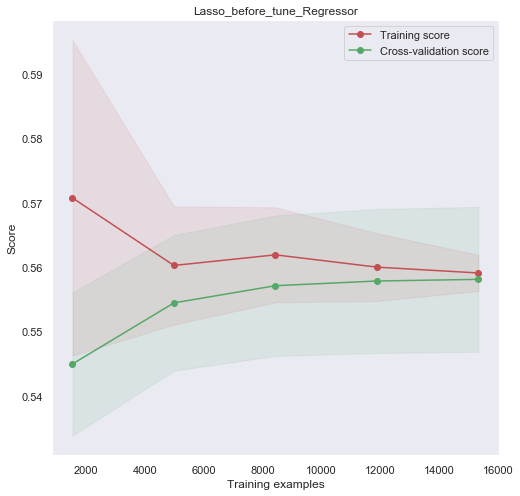

In [62]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('Lasso_before_tune_Regressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(lasso_before_tune, X, Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Lasso Tunning 

In [63]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
alphas = np.logspace(-4, -0.5, 30)


tuned_parameters = [{'alpha': alphas}]
n_folds = 10

grid_lasso = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True, scoring = 'r2')
grid_lasso.fit(x_train, y_train)
print(grid_lasso.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-0...
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'alpha': 0.0001}


In [64]:
best_model_lasso = Lasso().set_params(**grid_lasso.best_params_)
best_model_lasso.fit(x_train,y_train)
pred_train = best_model_lasso.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.558036              12.238675             284371.0   
18253                12.580563              12.574185             290850.0   
4741                 13.100440              13.945662             489158.0   
8406                 12.718950              12.312687             334018.0   
234                  12.818273              13.060277             368897.0   
11125                12.641743              12.610173             309200.0   
2813                 12.944877              13.060277             418686.0   
698                  12.984651              13.199141             435675.0   
10623                13.106468              13.384729             492115.0   
16239                12.527788              12.577636             275898.0   
15949                12.447808              12.049425             254691.0   
1668                 12.844400              12.911645             378662.0   
3372                 13.100395              13.485618             489136.0   
10397                12.486900              12.425212             264845.0   
17489                11.872781              12.383675             143312.0   
6284                 13.251691              12.895553             569031.0   
9598                 12.805580              12.498373             364244.0   
12770                12.292059              11.774528             217958.0   
6068                 12.847709              12.891669             379917.0   
8000                 13.199623              12.779594             540161.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [65]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 24297057076.22
RMSE: 155875.13
R^2: 0.474


In [66]:
pred = best_model_lasso.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.776502        12.672950       353805.0     319001.0
17892          12.131508        12.100718       185630.0     180001.0
12198          12.784891        12.736704       356786.0     340001.0
9774           12.673216        12.594734       319086.0     295001.0
18511          12.253911        11.938200       209800.0     153001.0
18437          12.350842        12.341438       231155.0     228991.0
8661           13.199654        13.038440       540178.0     459751.0
14024          13.081594        12.985170       480025.0     435901.0
12975          12.703772        12.514296       328987.0     272201.0
4385           12.434745        12.257041       251386.0     210458.0
18095          12.716590        12.736410       333230.0     339901.0
13870          12.980056        13.361382       433677.0     635001.0
9663           12.557013        12.429220       284081.0     250001.0
15665          12.243141        11.956976       207553.0     155901.0
6755           13.062106        13.997833       470761.0    1200001.0
2695           12.741878        12.524166       341765.0     274901.0
15953          12.265984        12.205578       212348.0     199901.0
16692          12.418352        12.706821       247299.0     329991.0
14             12.015480        11.660492       165294.0     115901.0
15851          12.441186        12.165256       253010.0     192001.0

In [67]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 23742069014.06
RMSE: 154084.62
R^2: 0.493


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'LassoRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

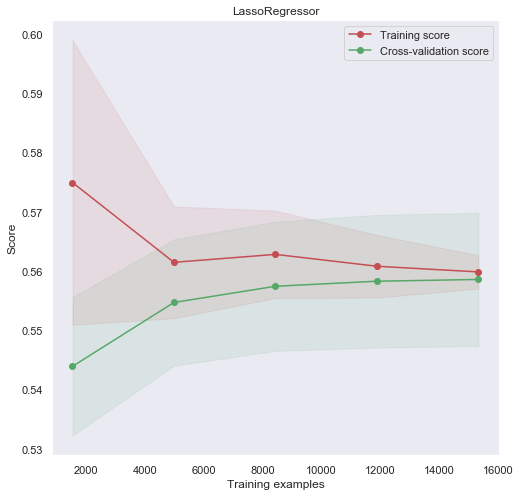

In [68]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('LassoRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(best_model_lasso, X, Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Tiny Conclusion for Lasso Linear Regression

The R^2 of Lasso Linear Regression is 0.493. We used one hyperparameter which is alpha (penalty). The default Lasso model and tuned Lass model have similar R^2. It makes sense that tuned lasso regression do not have higher "accuracy", because the hyperparameter (alpha) is used to penlizing (avoid overfitting). Its purpose is increase bias and decrease variance. 

# Random Forest before tunning

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf_before_model= RandomForestRegressor(random_state=42)
rf_before_model.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [70]:
pred_train = rf_before_model.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.263242              12.238675             211767.0   
18253                12.586665              12.574185             292630.0   
4741                 13.879479              13.945662            1066059.0   
8406                 12.291581              12.312687             217854.0   
234                  13.063931              13.060277             471621.0   
11125                12.602915              12.610173             297424.0   
2813                 13.010668              13.060277             447158.0   
698                  13.205200              13.199141             543182.0   
10623                13.391559              13.384729             654455.0   
16239                12.613209              12.577636             300502.0   
15949                12.074775              12.049425             175391.0   
1668                 12.917067              12.911645             407203.0   
3372                 13.461799              13.485618             702077.0   
10397                12.444249              12.425212             253787.0   
17489                12.371105              12.383675             235886.0   
6284                 12.901373              12.895553             400862.0   
9598                 12.501056              12.498373             268621.0   
12770                11.765908              11.774528             128786.0   
6068                 12.893123              12.891669             397569.0   
8000                 12.777310              12.779594             354091.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [71]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1528574786.11
RMSE: 39096.99
R^2: 0.967


In [72]:
pred = rf_before_model.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.684504        12.672950       322708.0     319001.0
17892          11.480072        12.100718        96768.0     180001.0
12198          12.701751        12.736704       328322.0     340001.0
9774           12.494716        12.594734       266923.0     295001.0
18511          12.020730        11.938200       166164.0     153001.0
18437          12.350983        12.341438       231187.0     228991.0
8661           13.173865        13.038440       526425.0     459751.0
14024          12.943309        12.985170       418030.0     435901.0
12975          12.545072        12.514296       280709.0     272201.0
4385           12.252470        12.257041       209498.0     210458.0
18095          12.619474        12.736410       302390.0     339901.0
13870          12.880712        13.361382       392665.0     635001.0
9663           12.391427        12.429220       240729.0     250001.0
15665          11.930781        11.956976       151870.0     155901.0
6755           13.848393        13.997833      1033430.0    1200001.0
2695           12.374204        12.524166       236618.0     274901.0
15953          12.187745        12.205578       196368.0     199901.0
16692          12.433198        12.706821       250997.0     329991.0
14             11.819950        11.660492       135937.0     115901.0
15851          12.153537        12.165256       189764.0     192001.0

In [73]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 9153757256.71
RMSE: 95675.27
R^2: 0.805


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'RandomForest_before_tune_Regressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

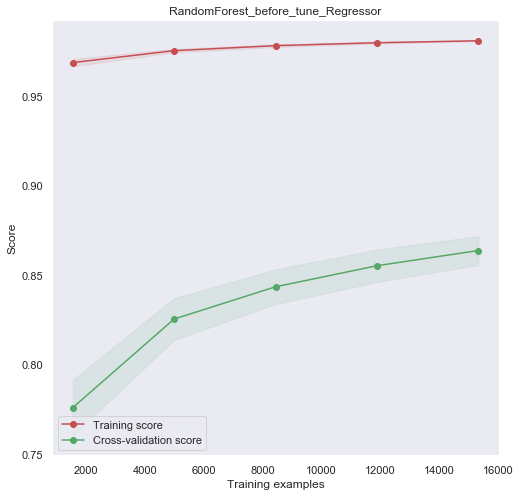

In [74]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('RandomForest_before_tune_Regressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(rf_before_model, X, Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Random Forest_RandomSearch 

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor(random_state=42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 8,10,20,50]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
param_grid= {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(model,param_grid, n_iter = 1000, cv =5,random_state=42, n_jobs = -1, scoring = 'r2')
# Fit the random search model
rf_random.fit(x_train, y_train)

# examine the best model
print(rf_random.best_params_)
print(rf_random.best_estimator_)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

{'n_estimators': 177, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=177, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


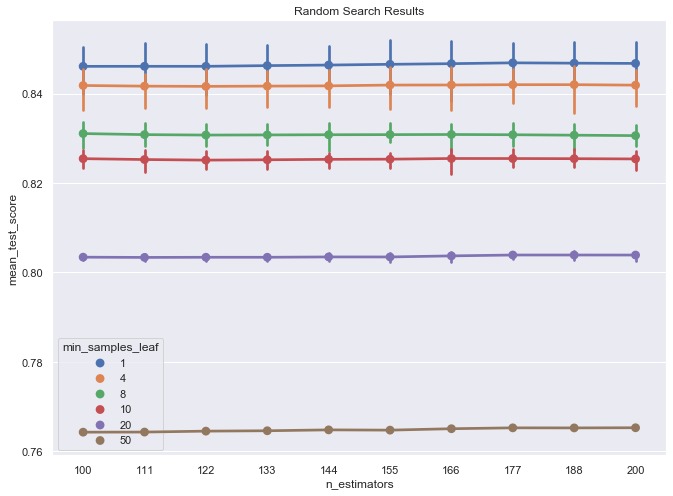

In [76]:
import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Random Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(rf_random.cv_results_, 'n_estimators', 'min_samples_leaf')


In [77]:
best_rf_model = RandomForestRegressor(random_state=42).set_params(**rf_random.best_params_)
best_rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=177, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [78]:
pred_train = best_rf_model.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.259371              12.238675             210949.0   
18253                12.588797              12.574185             293255.0   
4741                 13.880571              13.945662            1067223.0   
8406                 12.288503              12.312687             217185.0   
234                  13.065233              13.060277             472235.0   
11125                12.604005              12.610173             297749.0   
2813                 13.007100              13.060277             445566.0   
698                  13.210090              13.199141             545845.0   
10623                13.408097              13.384729             665369.0   
16239                12.606796              12.577636             298581.0   
15949                12.054496              12.049425             171870.0   
1668                 12.920553              12.911645             408625.0   
3372                 13.461680              13.485618             701994.0   
10397                12.443359              12.425212             253561.0   
17489                12.388571              12.383675             240042.0   
6284                 12.902052              12.895553             401134.0   
9598                 12.498806              12.498373             268017.0   
12770                11.735844              11.774528             124972.0   
6068                 12.902608              12.891669             401358.0   
8000                 12.771847              12.779594             352162.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [79]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1523391655.95
RMSE: 39030.65
R^2: 0.967


In [80]:
pred = best_rf_model.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.680442        12.672950       321400.0     319001.0
17892          11.465357        12.100718        95355.0     180001.0
12198          12.704762        12.736704       329312.0     340001.0
9774           12.494212        12.594734       266789.0     295001.0
18511          12.058968        11.938200       172641.0     153001.0
18437          12.352421        12.341438       231520.0     228991.0
8661           13.156100        13.038440       517156.0     459751.0
14024          12.933460        12.985170       413933.0     435901.0
12975          12.529389        12.514296       276340.0     272201.0
4385           12.256808        12.257041       210409.0     210458.0
18095          12.606308        12.736410       298435.0     339901.0
13870          12.848457        13.361382       380202.0     635001.0
9663           12.376206        12.429220       237092.0     250001.0
15665          11.933989        11.956976       152358.0     155901.0
6755           13.867820        13.997833      1053701.0    1200001.0
2695           12.367563        12.524166       235052.0     274901.0
15953          12.184781        12.205578       195787.0     199901.0
16692          12.414887        12.706821       246443.0     329991.0
14             11.801463        11.660492       133447.0     115901.0
15851          12.165088        12.165256       191969.0     192001.0

In [213]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 15874918336.07
RMSE: 125995.71
R^2: 0.661


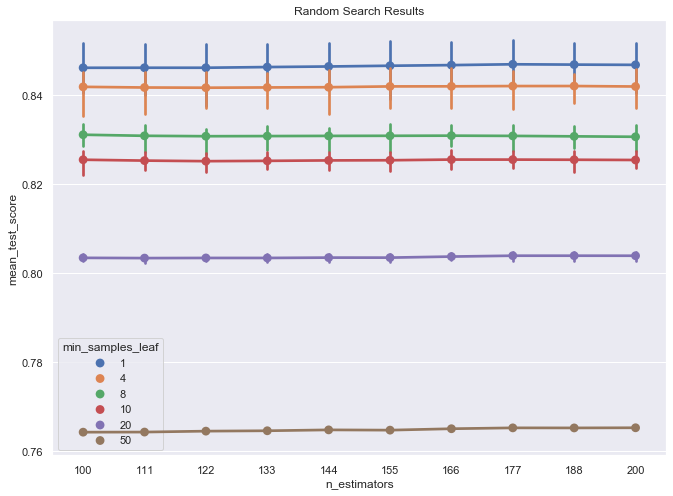

In [82]:
# plot the results

import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Random Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(rf_random.cv_results_, 'n_estimators', 'min_samples_leaf')


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'XGBRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

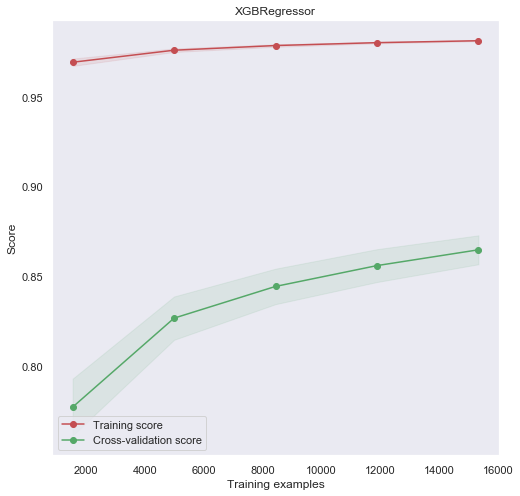

In [83]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('XGBRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X, Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), random_state=2020)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Tiny Conclusion for Random Forest

The R^2 of default Random Forest Model is 0.805. We used four hyperparameters to tune the Random Forest model.They are number of estimators, max despth, min sample split and min sample leaf. The R^2 of Random Forest Model is 0.661. The tuned Random forest got really bad R^2 in test set but has good R^2 in tran set which is 0.967. It means Tuned Random Forest overfitting. Our assumption is that we set too large of n_estimators too force model to be more complicated. Random Forest tuning really wastes time (half or one day for Random Forest Tuning), so we do not have enough time to revise hyperparameters and tune model again. In the future, we will try revise the range of n_estimators and we have confidence that Random Forest will have much better result in test set.

# XGBoost_GridSearch

In [84]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

model = XGBRegressor(objective ='reg:squarederror',random_state=42)
model.fit(x_train, y_train)

# Create the random grid
param_grid= {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15] }
print(param_grid)

grid = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15]}


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=42, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 

{'learning_rate': 0.15, 'max_depth': 8}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


In [85]:
best_model_XGBoost = XGBRegressor(random_state=42).set_params(**grid.best_params_)
best_model_XGBoost.fit(x_train,y_train)

[04:21:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [86]:
pred_train = best_model_XGBoost.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.250715              12.238675             209131.0   
18253                12.607268              12.574185             298722.0   
4741                 13.897685              13.945662            1085645.0   
8406                 12.286574              12.312687             216766.0   
234                  13.054332              13.060277             467115.0   
11125                12.608298              12.610173             299030.0   
2813                 13.006720              13.060277             445396.0   
698                  13.190767              13.199141             535399.0   
10623                13.437185              13.384729             685007.0   
16239                12.637964              12.577636             308034.0   
15949                12.043436              12.049425             169980.0   
1668                 12.944077              12.911645             418351.0   
3372                 13.371639              13.485618             641548.0   
10397                12.492845              12.425212             266424.0   
17489                12.398043              12.383675             242327.0   
6284                 12.890859              12.895553             396669.0   
9598                 12.555911              12.498373             283768.0   
12770                11.826969              11.774528             136895.0   
6068                 12.935985              12.891669             414979.0   
8000                 12.777688              12.779594             354225.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [87]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1361838390.75
RMSE: 36903.09
R^2: 0.971


In [88]:
pred = best_model_XGBoost.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.710608        12.672950       331243.0     319001.0
17892          11.431957        12.100718        92222.0     180001.0
12198          12.656980        12.736704       313947.0     340001.0
9774           12.546282        12.594734       281048.0     295001.0
18511          12.022827        11.938200       166513.0     153001.0
18437          12.372535        12.341438       236224.0     228991.0
8661           13.263519        13.038440       575802.0     459751.0
14024          13.024722        12.985170       453487.0     435901.0
12975          12.479917        12.514296       263002.0     272201.0
4385           12.179930        12.257041       194839.0     210458.0
18095          12.681760        12.736410       321824.0     339901.0
13870          13.182715        13.361382       531105.0     635001.0
9663           12.358023        12.429220       232820.0     250001.0
15665          11.979459        11.956976       159446.0     155901.0
6755           13.842778        13.997833      1027642.0    1200001.0
2695           12.422010        12.524166       248205.0     274901.0
15953          12.080418        12.205578       176384.0     199901.0
16692          12.456396        12.706821       256888.0     329991.0
14             11.704274        11.660492       121088.0     115901.0
15851          12.132890        12.165256       185886.0     192001.0

In [89]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 8167857347.30
RMSE: 90376.20
R^2: 0.826


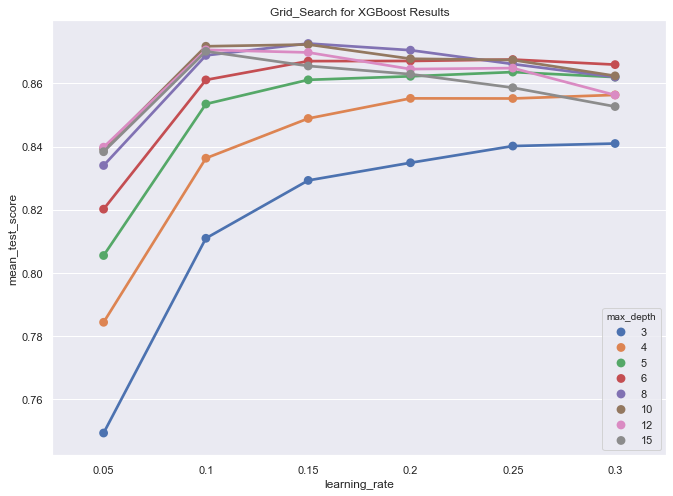

In [90]:
# plot the results

import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Grid_Search for XGBoost Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid.cv_results_, 'learning_rate', 'max_depth')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'XGBRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

[04:21:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:21:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[04:27:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:27:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[04:32:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:33:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


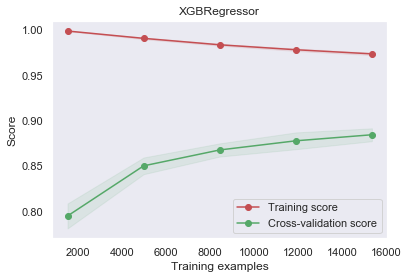

In [91]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('XGBRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(best_model_XGBoost, X, Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), random_state=2020)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# XGBoost before Tunning

In [93]:
from xgboost import XGBRegressor
model_XGB = XGBRegressor(objective ='reg:squarederror', random_state=42)
model_XGB.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [94]:
pred_train = model_XGB.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.226754              12.238675             204179.0   
18253                12.604381              12.574185             297860.0   
4741                 13.730320              13.945662             918337.0   
8406                 12.357557              12.312687             232712.0   
234                  13.070049              13.060277             474515.0   
11125                12.569075              12.610173             287528.0   
2813                 12.940280              13.060277             416766.0   
698                  13.224698              13.199141             553877.0   
10623                13.523803              13.384729             746986.0   
16239                12.712918              12.577636             332009.0   
15949                12.139552              12.049425             187129.0   
1668                 12.969047              12.911645             428929.0   
3372                 13.346521              13.485618             625634.0   
10397                12.429756              12.425212             250135.0   
17489                12.179892              12.383675             194832.0   
6284                 12.984177              12.895553             435468.0   
9598                 12.527796              12.498373             275900.0   
12770                11.937084              11.774528             152830.0   
6068                 12.925675              12.891669             410723.0   
8000                 12.833187              12.779594             374440.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [95]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 9581065388.97
RMSE: 97882.92
R^2: 0.793


In [96]:
pred = model_XGB.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.639056        12.672950       308370.0     319001.0
17892          11.471642        12.100718        95956.0     180001.0
12198          12.651381        12.736704       312194.0     340001.0
9774           12.518630        12.594734       273383.0     295001.0
18511          12.224936        11.938200       203808.0     153001.0
18437          12.469892        12.341438       260378.0     228991.0
8661           13.346697        13.038440       625744.0     459751.0
14024          12.955319        12.985170       423081.0     435901.0
12975          12.652393        12.514296       312510.0     272201.0
4385           12.172954        12.257041       193485.0     210458.0
18095          12.673296        12.736410       319111.0     339901.0
13870          12.996673        13.361382       440944.0     635001.0
9663           12.346475        12.429220       230147.0     250001.0
15665          12.115696        11.956976       182717.0     155901.0
6755           13.773303        13.997833       958670.0    1200001.0
2695           12.406693        12.524166       244432.0     274901.0
15953          12.120080        12.205578       183520.0     199901.0
16692          12.420364        12.706821       247797.0     329991.0
14             11.630335        11.660492       112458.0     115901.0
15851          12.216623        12.165256       202121.0     192001.0

In [97]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 11276221962.81
RMSE: 106189.56
R^2: 0.759


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'XGBRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

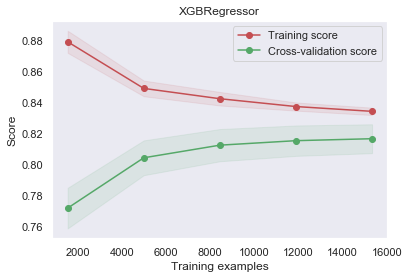

In [98]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
estimator=XGBRegressor(objective ='reg:squarederror')
plt.figure()
plt.title('XGBRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(estimator, X, Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Tiny Conclusion for XGBoost

The R^2 of default XGBoost model in test set is 0.759. We tuned two hyperparameters (Learning rate and max depth). After tuned, the R^2 of the optimal XGBoost model ('learning_rate': 0.15, 'max_depth': 8) in test set is 0.826. In conclusion, tuned hyperparameters help XGBoost model to have higher "accuracy". According to the XGBoost introduction online, we need to tune learning rate and number of iteration together to get great result (higher R^2 or lower MSE/RMSE). However, number of iterations tunning cost too much time, we did not try it. If we have more time, we will try more useful and important hyperparameters. 

# LGBM_before_tunning

In [99]:
from lightgbm.sklearn import LGBMRegressor

lgbm_model_before_tune= LGBMRegressor(random_state=42)
lgbm_model_before_tune.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [100]:
pred_train = lgbm_model_before_tune.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.216293              12.238675             202055.0   
18253                12.563306              12.574185             285874.0   
4741                 13.924917              13.945662            1115616.0   
8406                 12.314943              12.312687             223004.0   
234                  13.054483              13.060277             467186.0   
11125                12.615701              12.610173             301252.0   
2813                 12.951652              13.060277             421532.0   
698                  13.230585              13.199141             557147.0   
10623                13.472658              13.384729             709743.0   
16239                12.638364              12.577636             308157.0   
15949                12.066349              12.049425             173920.0   
1668                 12.941940              12.911645             417458.0   
3372                 13.374813              13.485618             643588.0   
10397                12.499728              12.425212             268264.0   
17489                12.346002              12.383675             230039.0   
6284                 12.930675              12.895553             412782.0   
9598                 12.547516              12.498373             281395.0   
12770                11.794248              11.774528             132488.0   
6068                 12.919420              12.891669             408162.0   
8000                 12.793792              12.779594             359976.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [101]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 4875456830.55
RMSE: 69824.47
R^2: 0.894


In [102]:
pred = lgbm_model_before_tune.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)


predict_price_log  truth_price_log  predict_price  truth_price
1356           12.697397        12.672950       326896.0     319001.0
17892          11.301721        12.100718        80961.0     180001.0
12198          12.652824        12.736704       312645.0     340001.0
9774           12.535093        12.594734       277921.0     295001.0
18511          12.125326        11.938200       184485.0     153001.0
18437          12.403332        12.341438       243612.0     228991.0
8661           13.281429        13.038440       586207.0     459751.0
14024          13.011335        12.985170       447457.0     435901.0
12975          12.581651        12.514296       291167.0     272201.0
4385           12.182793        12.257041       195398.0     210458.0
18095          12.681321        12.736410       321683.0     339901.0
13870          13.113408        13.361382       495542.0     635001.0
9663           12.353393        12.429220       231745.0     250001.0
15665          11.876265        11.956976       143812.0     155901.0
6755           13.816665        13.997833      1001155.0    1200001.0
2695           12.333773        12.524166       227243.0     274901.0
15953          12.133921        12.205578       186078.0     199901.0
16692          12.499332        12.706821       268158.0     329991.0
14             11.707227        11.660492       121446.0     115901.0
15851          12.174837        12.165256       193849.0     192001.0

In [103]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 8262161622.80
RMSE: 90896.43
R^2: 0.824


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LassoRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

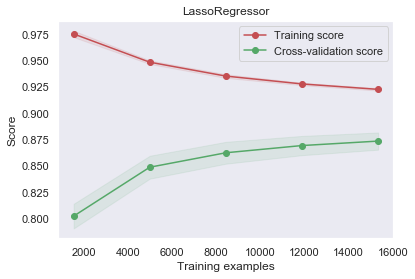

In [104]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('LassoRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(lgbm_model_before_tune, X, Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# LGBM_GridSearch

In [105]:
from lightgbm.sklearn import LGBMRegressor

model = LGBMRegressor()
model.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [106]:

from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

model = LGBMRegressor(random_state=42)
model.fit(x_train, y_train)

# Create the random grid
param_grid= {"num_leaves"    : [20,30,60,70,100,150,200] ,
    "min_data_in_leaf"        : [10,20,50,100,150,200,300]  }
print(param_grid)

grid_LGBM = GridSearchCV(model, param_grid, cv=5, scoring = 'r2')
grid_LGBM.fit(x_train, y_train)
print(grid_LGBM.best_params_)
print(grid_LGBM.best_estimator_)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

{'num_leaves': [20, 30, 60, 70, 100, 150, 200], 'min_data_in_leaf': [10, 20, 50, 100, 150, 200, 300]}


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=42,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'min_data_in_leaf': [10, 20, 50, 100, 150, 200, 300],
                         'num_leaves': [20, 30, 60, 70, 100, 150, 200]},
             pre_dispatch='2*n

{'min_data_in_leaf': 20, 'num_leaves': 200}
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=200,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


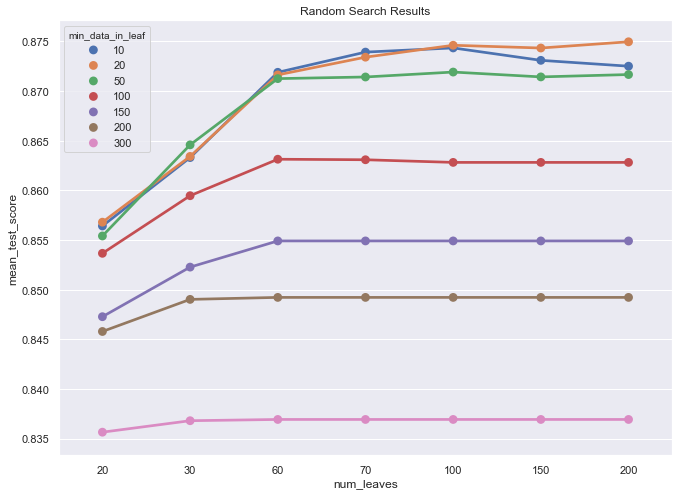

In [107]:
import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Random Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid_LGBM.cv_results_, 'num_leaves', 'min_data_in_leaf')


In [108]:
best_model_Lgbm = LGBMRegressor(random_state=42).set_params(**grid_LGBM.best_params_)
best_model_Lgbm.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=200,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [109]:
pred_train =best_model_Lgbm.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.256304              12.238675             210303.0   
18253                12.560228              12.574185             284995.0   
4741                 13.989030              13.945662            1189484.0   
8406                 12.317927              12.312687             223670.0   
234                  13.057503              13.060277             468599.0   
11125                12.616866              12.610173             301603.0   
2813                 12.990851              13.060277             438384.0   
698                  13.220418              13.199141             551512.0   
10623                13.426770              13.384729             677910.0   
16239                12.633948              12.577636             306799.0   
15949                12.026002              12.049425             167042.0   
1668                 12.917561              12.911645             407404.0   
3372                 13.425758              13.485618             677224.0   
10397                12.470274              12.425212             260478.0   
17489                12.427596              12.383675             249595.0   
6284                 12.889724              12.895553             396219.0   
9598                 12.526541              12.498373             275555.0   
12770                11.762226              11.774528             128313.0   
6068                 12.923896              12.891669             409993.0   
8000                 12.802093              12.779594             362976.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [110]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1035184184.50
RMSE: 32174.28
R^2: 0.978


In [111]:
pred = best_model_Lgbm.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.705462        12.672950       329543.0     319001.0
17892          11.502408        12.100718        98954.0     180001.0
12198          12.641831        12.736704       309227.0     340001.0
9774           12.489500        12.594734       265534.0     295001.0
18511          12.146452        11.938200       188424.0     153001.0
18437          12.354230        12.341438       231939.0     228991.0
8661           13.174958        13.038440       527001.0     459751.0
14024          12.921175        12.985170       408879.0     435901.0
12975          12.525407        12.514296       275242.0     272201.0
4385           12.161620        12.257041       191304.0     210458.0
18095          12.692497        12.736410       325298.0     339901.0
13870          13.067452        13.361382       473285.0     635001.0
9663           12.390830        12.429220       240585.0     250001.0
15665          11.970024        11.956976       157948.0     155901.0
6755           13.866594        13.997833      1052410.0    1200001.0
2695           12.449884        12.524166       255221.0     274901.0
15953          12.111594        12.205578       181969.0     199901.0
16692          12.487294        12.706821       264949.0     329991.0
14             11.722908        11.660492       123366.0     115901.0
15851          12.120149        12.165256       183533.0     192001.0

In [112]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 7837783637.59
RMSE: 88531.26
R^2: 0.833


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LGMBRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

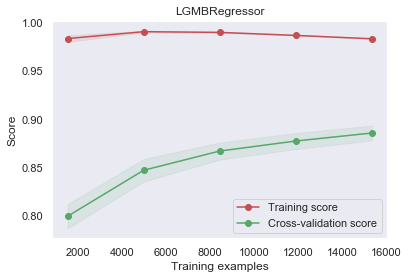

In [113]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('LGMBRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(best_model_Lgbm, X, Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), random_state=2020)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Tiny Conclusion for LGBM

The R^2 of default lgbm model in test set is 0.822. We tuned two hyperparameters (min data in leaf and number of leaves). After tuned, the R^2 of the optimal LGBM model ('min_data_in_leaf': 20, 'num_leaves': 200) in test set is 0.833. In conclusion, tuned hyperparameters help LGBM model to have higher R^2. 

According to the grid search graph and LGBM introduction online, Setting min_data_in_leaf to smaller value will lead growing deeper a tree, which means will help model to have higher "accuracy" and also will be easier to be overfitting. Online paper mentioned that larger number of leaves means higher "accuracy" (higher R^2 or lower RMSE/MSE), but our grid search showed that it also has possbility that "accuracy" decreased when number of leaves increased. Therefore, the better way is to consider more hyperparameters (If we have enough time, we will try more). 

An interesting story:
In the beginning, we found that R^2 of tuned LGBM even smaller than R^2 of the default LGBM. After we checked LGBM Introfuction online, we found that the default value of num_leaves is 31. But our first tuning range of num_leaves is (5,30). Our max value in the range of num_leaves still smaller than default value. After revised the range of num_leaves, we got better results.  

# Ensemble Learning for built in model

In [114]:
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
LCV_model = LassoCV()
lr_model = linear_model.LinearRegression()
XGB_model = XGBRegressor(objective ='reg:squarederror')
LGBM_model = LGBMRegressor()
estimators = [XGB_model, LGBM_model, lr_model, LCV_model, rf_model]
reg_built_in_model = StackingRegressor(regressors=estimators, meta_regressor=GradientBoostingRegressor(random_state=42))
reg_built_in_model.fit(x_train,y_train)


StackingRegressor(meta_regressor=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [115]:
pred_train = reg_built_in_model.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.252118              12.238675             209424.0   
18253                12.575672              12.574185             289431.0   
4741                 13.893850              13.945662            1081490.0   
8406                 12.266059              12.312687             212364.0   
234                  13.048036              13.060277             464184.0   
11125                12.605369              12.610173             298155.0   
2813                 13.027253              13.060277             454636.0   
698                  13.180979              13.199141             530184.0   
10623                13.419867              13.384729             673246.0   
16239                12.617255              12.577636             301720.0   
15949                12.063560              12.049425             173435.0   
1668                 12.915169              12.911645             406431.0   
3372                 13.474555              13.485618             711091.0   
10397                12.444606              12.425212             253877.0   
17489                12.387150              12.383675             239701.0   
6284                 12.902923              12.895553             401484.0   
9598                 12.496000              12.498373             267266.0   
12770                11.725929              11.774528             123739.0   
6068                 12.912723              12.891669             405438.0   
8000                 12.764635              12.779594             349632.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [116]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 800889354.09
RMSE: 28299.99
R^2: 0.983


In [117]:
pred = reg_built_in_model.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)


predict_price_log  truth_price_log  predict_price  truth_price
1356           12.703892        12.672950       329026.0     319001.0
17892          11.471332        12.100718        95926.0     180001.0
12198          12.718498        12.736704       333867.0     340001.0
9774           12.472514        12.594734       261062.0     295001.0
18511          12.086035        11.938200       177377.0     153001.0
18437          12.344003        12.341438       229579.0     228991.0
8661           13.108398        13.038440       493066.0     459751.0
14024          12.915169        12.985170       406431.0     435901.0
12975          12.517587        12.514296       273098.0     272201.0
4385           12.224459        12.257041       203711.0     210458.0
18095          12.625228        12.736410       304135.0     339901.0
13870          12.829662        13.361382       373122.0     635001.0
9663           12.377097        12.429220       237304.0     250001.0
15665          11.937188        11.956976       152846.0     155901.0
6755           13.900430        13.997833      1088629.0    1200001.0
2695           12.372849        12.524166       236298.0     274901.0
15953          12.189015        12.205578       196617.0     199901.0
16692          12.414247        12.706821       246286.0     329991.0
14             11.855402        11.660492       140843.0     115901.0
15851          12.175923        12.165256       194060.0     192001.0

In [118]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 9273818536.51
RMSE: 96300.67
R^2: 0.802


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ensemble Learning')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

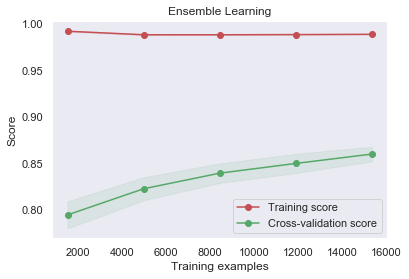

In [119]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('Ensemble Learning')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(reg_built_in_model, X,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Ensemble learning without linear and lasso

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
XGB_model = XGBRegressor(objective ='reg:squarederror')
LGBM_model = LGBMRegressor()
estimators = [XGB_model, LGBM_model, rf_model]
reg_built_in_model_without_linearlasso = StackingRegressor(regressors=estimators, meta_regressor=GradientBoostingRegressor(random_state=42))
reg_built_in_model_without_linearlasso.fit(x_train,y_train)

StackingRegressor(meta_regressor=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [121]:
pred_train = reg_built_in_model_without_linearlasso.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.254827              12.238675             209993.0   
18253                12.590112              12.574185             293641.0   
4741                 13.906026              13.945662            1094739.0   
8406                 12.276252              12.312687             214540.0   
234                  13.063033              13.060277             471198.0   
11125                12.596836              12.610173             295622.0   
2813                 13.040962              13.060277             460912.0   
698                  13.187536              13.199141             533672.0   
10623                13.406665              13.384729             664417.0   
16239                12.591836              12.577636             294147.0   
15949                12.036338              12.049425             168778.0   
1668                 12.930963              12.911645             412901.0   
3372                 13.472081              13.485618             709334.0   
10397                12.463106              12.425212             258618.0   
17489                12.393213              12.383675             241159.0   
6284                 12.889354              12.895553             396073.0   
9598                 12.492748              12.498373             266398.0   
12770                11.698635              11.774528             120407.0   
6068                 12.929759              12.891669             412404.0   
8000                 12.765815              12.779594             350044.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [122]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 896157567.52
RMSE: 29935.89
R^2: 0.981


In [123]:
pred = reg_built_in_model_without_linearlasso.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)


predict_price_log  truth_price_log  predict_price  truth_price
1356           12.669739        12.672950       317979.0     319001.0
17892          11.365807        12.100718        86319.0     180001.0
12198          12.702112        12.736704       328441.0     340001.0
9774           12.492478        12.594734       266326.0     295001.0
18511          12.141012        11.938200       187402.0     153001.0
18437          12.334361        12.341438       227376.0     228991.0
8661           13.108372        13.038440       493053.0     459751.0
14024          12.946020        12.985170       419165.0     435901.0
12975          12.516335        12.514296       272757.0     272201.0
4385           12.230039        12.257041       204851.0     210458.0
18095          12.611659        12.736410       300036.0     339901.0
13870          12.809540        13.361382       365690.0     635001.0
9663           12.359793        12.429220       233233.0     250001.0
15665          11.962359        11.956976       156742.0     155901.0
6755           13.888551        13.997833      1075774.0    1200001.0
2695           12.344346        12.524166       229658.0     274901.0
15953          12.186400        12.205578       196104.0     199901.0
16692          12.432804        12.706821       250899.0     329991.0
14             11.870431        11.660492       142976.0     115901.0
15851          12.139050        12.165256       187035.0     192001.0

In [124]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 9405134334.19
RMSE: 96980.07
R^2: 0.799


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ensemble Learning')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

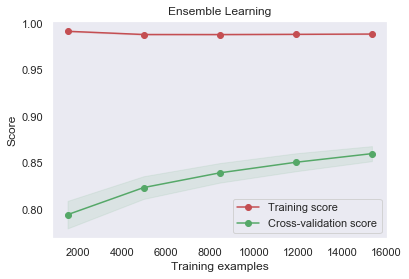

In [125]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('Ensemble Learning')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(reg_built_in_model_without_linearlasso, X,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Ensemble Learning with best model

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
LCV_model = LassoCV()
lr_model = linear_model.LinearRegression()
XGB_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
LGBM_model = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=200,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
estimators = [XGB_model, LGBM_model, lr_model, LCV_model, rf_model]
reg_model = StackingRegressor(regressors=estimators, meta_regressor=GradientBoostingRegressor(random_state=42))
reg_model.fit(x_train,y_train)

StackingRegressor(meta_regressor=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [127]:
pred_train = reg_model.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.239362              12.238675             206770.0   
18253                12.581536              12.574185             291133.0   
4741                 13.955235              13.945662            1149957.0   
8406                 12.308868              12.312687             221653.0   
234                  13.077298              13.060277             477967.0   
11125                12.593354              12.610173             294594.0   
2813                 12.997173              13.060277             441164.0   
698                  13.208977              13.199141             545238.0   
10623                13.445491              13.384729             690721.0   
16239                12.606514              12.577636             298497.0   
15949                12.038252              12.049425             169101.0   
1668                 12.925124              12.911645             410497.0   
3372                 13.448738              13.485618             692967.0   
10397                12.445397              12.425212             254078.0   
17489                12.403385              12.383675             243625.0   
6284                 12.886681              12.895553             395016.0   
9598                 12.514139              12.498373             272158.0   
12770                11.760993              11.774528             128155.0   
6068                 12.920390              12.891669             408559.0   
8000                 12.771602              12.779594             352076.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [128]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 679834537.60
RMSE: 26073.64
R^2: 0.985


In [129]:
pred = reg_model.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.698518        12.672950       327262.0     319001.0
17892          11.484257        12.100718        97174.0     180001.0
12198          12.667002        12.736704       317109.0     340001.0
9774           12.483223        12.594734       263873.0     295001.0
18511          12.130040        11.938200       185357.0     153001.0
18437          12.349281        12.341438       230794.0     228991.0
8661           13.140289        13.038440       509043.0     459751.0
14024          12.926570        12.985170       411091.0     435901.0
12975          12.552530        12.514296       282810.0     272201.0
4385           12.173802        12.257041       193649.0     210458.0
18095          12.672355        12.736410       318812.0     339901.0
13870          13.098249        13.361382       488087.0     635001.0
9663           12.363714        12.429220       234149.0     250001.0
15665          11.970096        11.956976       157960.0     155901.0
6755           13.900067        13.997833      1088234.0    1200001.0
2695           12.386294        12.524166       239496.0     274901.0
15953          12.114935        12.205578       182578.0     199901.0
16692          12.447619        12.706821       254643.0     329991.0
14             11.747873        11.660492       126484.0     115901.0
15851          12.110827        12.165256       181830.0     192001.0

In [130]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 7828995180.93
RMSE: 88481.61
R^2: 0.833


# Ensemble Learning with best model

In [131]:
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
XGB_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
LGBM_model = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=200,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
estimators = [XGB_model, LGBM_model, rf_model]
reg_built_in_model_without_linearlasso_best = StackingRegressor(regressors=estimators, meta_regressor=GradientBoostingRegressor(random_state=42))
reg_built_in_model_without_linearlasso_best.fit(x_train,y_train)

StackingRegressor(meta_regressor=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [132]:
pred_train = reg_built_in_model_without_linearlasso_best.predict(x_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.244835              12.238675             207905.0   
18253                12.593818              12.574185             294731.0   
4741                 13.952725              13.945662            1147074.0   
8406                 12.315671              12.312687             223166.0   
234                  13.064758              13.060277             472011.0   
11125                12.596447              12.610173             295507.0   
2813                 12.998764              13.060277             441867.0   
698                  13.213304              13.199141             547602.0   
10623                13.437662              13.384729             685334.0   
16239                12.629219              12.577636             305352.0   
15949                12.040844              12.049425             169540.0   
1668                 12.928074              12.911645             411710.0   
3372                 13.445009              13.485618             690388.0   
10397                12.452710              12.425212             255943.0   
17489                12.413146              12.383675             246015.0   
6284                 12.891234              12.895553             396818.0   
9598                 12.507033              12.498373             270231.0   
12770                11.749452              11.774528             126684.0   
6068                 12.915290              12.891669             406480.0   
8000                 12.788456              12.779594             358060.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [133]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 706618290.29
RMSE: 26582.29
R^2: 0.985


In [134]:
pred = reg_built_in_model_without_linearlasso_best.predict(x_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.705049        12.672950       329407.0     319001.0
17892          11.492899        12.100718        98017.0     180001.0
12198          12.677317        12.736704       320397.0     340001.0
9774           12.494966        12.594734       266990.0     295001.0
18511          12.130043        11.938200       185358.0     153001.0
18437          12.347009        12.341438       230270.0     228991.0
8661           13.191548        13.038440       535817.0     459751.0
14024          12.915290        12.985170       406480.0     435901.0
12975          12.526269        12.514296       275480.0     272201.0
4385           12.175029        12.257041       193887.0     210458.0
18095          12.635726        12.736410       307345.0     339901.0
13870          13.136932        13.361382       507338.0     635001.0
9663           12.394757        12.429220       241532.0     250001.0
15665          11.966390        11.956976       157375.0     155901.0
6755           13.919076        13.997833      1109119.0    1200001.0
2695           12.422218        12.524166       248256.0     274901.0
15953          12.108187        12.205578       181350.0     199901.0
16692          12.477166        12.706821       262280.0     329991.0
14             11.736769        11.660492       125088.0     115901.0
15851          12.119488        12.165256       183412.0     192001.0

In [135]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 7740236898.29
RMSE: 87978.62
R^2: 0.835


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ensemble Learning')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

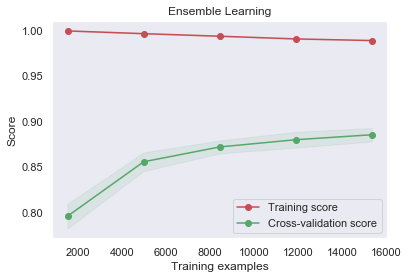

In [136]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('Ensemble Learning')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(reg_built_in_model_without_linearlasso_best, X,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Tiny Conclusion for Ensemble Learning

In the beginning, we ensemble all default models (linear, lasso, XGBoost, LGBM, Random Forest) and have R^2 = 0.805. Then we tried ensemble all tuned models and have R^2 = 0.833. We also tried to remove linear and lass models from ensemble learning model (just have tuned XGBoost, LGBM and Random Forest)that have low R^2, and have R^2 = 0.835. 

An interesting finding is that the R^2 of default ensemble learning (linear, lasso, XGBoost, LGBM, Random Forest) even smaller than R^2 of default LGBM. It told us that ensemble learning would have worse result if it includes really bad models. (the proof is that R^2 increased a little bit after we removed linear and lasso models from ensemble learning (tuned XGBoost, LGBM and Random Forest)).

# 3.Dimension Deduction

After trying different models with and without tuning, we get some good result on test dataset but we also found the
problem of overfitting in our model. Overfitting means the model would not work in real world. To solve this problem, we applied PCA to perform dimension deduction in our input data. We first standardized the the whole dataset, because the range of each feature vary. So when a small set of variables has a much larger magnitude than others, the components in the PCA analysis are heavily weighted along those variables, while other variables are ignored.We set the threshold of 99% to select the number of features that explain 99% of the total variance, and we found the number is 28. 

After feature reduction,we repeat the same process as we did before feature reduction. The models we tried are shown in the following:

1.Linear Regression

2.Default Lasso Model

3.Lasso with GridSearch

4.Default Random Forest Model

5.Random Forest Model with RandomSearch

6.Default XGBoost Model

7.XGBoost Model with GridSearch

8.Ensemble Learning with Default Model

9.Ensemble Learning with Best Models based on R^2 Result

However, based on the results, we found that we do reduce the problem of overfitting in some model but the accuracy also being reduced.One reason might be that some information that seems to be unimportant in train dataset might be very important to test dataset. So one way we can improve it is to feed more training data. 

In addition,based on the article written by Lever and Altman in 2017, one limitation that PCA might generate worse performance than single model is becuase its underlying assumption that " the structure of data must be linear". While in our previous data preprocessing, we have some categorical data which might bring nonlinearity to our dataset. And usually, when we have too much feature which is 47 in our case, it is hard to said that they are linear correlated to our target variable. 


 

# Data Standarization for PCA

In [137]:
import copy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df_before_pca=copy.deepcopy(df_before_log)
Y_for_pca = df_before_log['Price']
X_for_pca = df_before_log.drop(['Price'], axis=1)
#Standarization 
X_for_pca = (X_for_pca - X_for_pca.mean())/np.std(X_for_pca)
Y_for_pca = (Y_for_pca - Y_for_pca.mean())/np.std(Y_for_pca)

Fit PCA model and select the main principle components

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

[3.54385344e-01 1.02499953e-01 9.42784774e-02 5.06330534e-02
 4.36100059e-02 3.71611334e-02 3.46999416e-02 2.66388280e-02
 2.38546671e-02 2.12692489e-02 2.02537822e-02 1.79628847e-02
 1.67652350e-02 1.47740835e-02 1.44819878e-02 1.38651078e-02
 1.30664561e-02 1.21289018e-02 1.18388636e-02 1.14976452e-02
 1.02117204e-02 9.73541441e-03 8.08307204e-03 7.19218909e-03
 5.63779885e-03 5.26647732e-03 5.06950661e-03 4.13530592e-03
 2.48610620e-03 2.14802711e-03 1.49369985e-03 1.01612883e-03
 5.55984402e-04 5.39166319e-04 3.76913990e-04 2.53842447e-04
 6.28474268e-05 2.56276476e-05 2.11261173e-05 1.42834305e-05
 5.17562574e-06 2.15407373e-06 1.49050869e-06 1.92238011e-07
 1.08736304e-07 3.98189812e-08 6.98901859e-32]
28


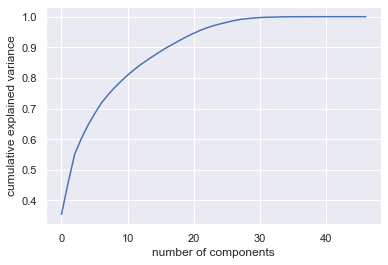

In [138]:
pca = PCA().fit(X_for_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print(pca.explained_variance_ratio_)

pca = PCA(.99)

principalComponents = pca.fit_transform(X_for_pca)

# To get how many principal components was chosen
print(pca.n_components_)
#Therefore, we should apply n_components_=28 to conduct dimension reduction

In [139]:
#x_train, x_test, y_train, y_test = train_test_split(X_for_pca, Y_for_pca, test_size=0.3, random_state=2020)
Y = num_df_log['Price_log']
# Creat PCA model
pca = PCA(n_components=28)
# Fit anf tranform data
X_for_pca= pca.fit_transform(X_for_pca)
# Spliting data into test dataset and train dataset
X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(X_for_pca,Y,test_size=0.3, random_state=2020)
X_for_pca.shape

(19173, 28)

# Conduct model testing using transformed data

# Linear Model

In [140]:
# Conduct model testing using transformed data
from sklearn import linear_model
model_after_pca = linear_model.LinearRegression()
model_after_pca.fit(X_pca_train, Y_pca_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
pred_train = model_after_pca.predict(X_pca_train)
pred_train_and_truth_train = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth_train.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.534306              12.238675             277702.0   
18253                12.693932              12.574185             325765.0   
4741                 13.276656              13.945662             583416.0   
8406                 12.555688              12.312687             283704.0   
234                  12.825286              13.060277             371493.0   
11125                12.609099              12.610173             299269.0   
2813                 13.172658              13.060277             525790.0   
698                  13.123423              13.199141             500530.0   
10623                13.444057              13.384729             689731.0   
16239                12.648132              12.577636             311182.0   
15949                12.455330              12.049425             256614.0   
1668                 12.791415              12.911645             359121.0   
3372                 13.288832              13.485618             590563.0   
10397                12.441041              12.425212             252974.0   
17489                12.074633              12.383675             175366.0   
6284                 12.924450              12.895553             410220.0   
9598                 12.810024              12.498373             365867.0   
12770                12.249723              11.774528             208924.0   
6068                 12.885459              12.891669             394533.0   
8000                 13.221733              12.779594             552237.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [142]:
metrics_new(pred_train_and_truth_train['predict_train_price'], pred_train_and_truth_train['truth_train_price'])

MSE: 26168545020.24
RMSE: 161766.95
R^2: 0.433


In [143]:
pred = model_after_pca.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.766796        12.672950       350388.0     319001.0
17892          11.859022        12.100718       141354.0     180001.0
12198          12.661800        12.736704       315464.0     340001.0
9774           12.666349        12.594734       316902.0     295001.0
18511          12.270633        11.938200       213338.0     153001.0
18437          12.380942        12.341438       238218.0     228991.0
8661           12.845478        13.038440       379071.0     459751.0
14024          13.064333        12.985170       471811.0     435901.0
12975          12.497887        12.514296       267771.0     272201.0
4385           12.080675        12.257041       176429.0     210458.0
18095          12.528284        12.736410       276035.0     339901.0
13870          12.623508        13.361382       303613.0     635001.0
9663           12.613313        12.429220       300533.0     250001.0
15665          12.355788        11.956976       232301.0     155901.0
6755           13.589443        13.997833       797664.0    1200001.0
2695           12.715497        12.524166       332866.0     274901.0
15953          12.370380        12.205578       235715.0     199901.0
16692          12.385494        12.706821       239305.0     329991.0
14             11.932357        11.660492       152110.0     115901.0
15851          12.317471        12.165256       223568.0     192001.0

In [144]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 23677190543.01
RMSE: 153873.94
R^2: 0.495


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LinerRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

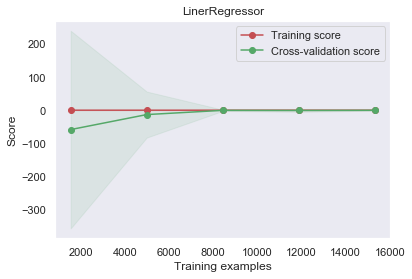

In [145]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('LinerRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(model_after_pca, X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Lasso_pca_before_tunning

In [146]:
from sklearn.linear_model import LassoCV

lasso_before_tune_pca = LassoCV(random_state=42)
lasso_before_tune_pca.fit(X_pca_train, Y_pca_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=42, selection='cyclic',
        tol=0.0001, verbose=False)

In [147]:
pred_train =lasso_before_tune_pca.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.532444              12.238675             277186.0   
18253                12.696509              12.574185             326606.0   
4741                 13.268599              13.945662             578734.0   
8406                 12.558673              12.312687             284553.0   
234                  12.822795              13.060277             370569.0   
11125                12.602662              12.610173             297349.0   
2813                 13.160296              13.060277             519330.0   
698                  13.108141              13.199141             492939.0   
10623                13.436218              13.384729             684345.0   
16239                12.653208              12.577636             312765.0   
15949                12.447811              12.049425             254692.0   
1668                 12.799413              12.911645             362005.0   
3372                 13.286054              13.485618             588925.0   
10397                12.446775              12.425212             254428.0   
17489                12.082607              12.383675             176770.0   
6284                 12.911724              12.895553             405033.0   
9598                 12.821982              12.498373             370268.0   
12770                12.249990              11.774528             208979.0   
6068                 12.880844              12.891669             392717.0   
8000                 13.221367              12.779594             552035.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [148]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 26782229168.45
RMSE: 163652.77
R^2: 0.420


In [149]:
pred = lasso_before_tune_pca.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.773535        12.672950       352757.0     319001.0
17892          11.863863        12.100718       142040.0     180001.0
12198          12.664532        12.736704       316327.0     340001.0
9774           12.678368        12.594734       320734.0     295001.0
18511          12.265855        11.938200       212321.0     153001.0
18437          12.381751        12.341438       238411.0     228991.0
8661           12.852149        13.038440       381608.0     459751.0
14024          13.068902        12.985170       473972.0     435901.0
12975          12.504203        12.514296       269468.0     272201.0
4385           12.083833        12.257041       176987.0     210458.0
18095          12.528150        12.736410       275998.0     339901.0
13870          12.629473        13.361382       305429.0     635001.0
9663           12.625620        12.429220       304255.0     250001.0
15665          12.350137        11.956976       230992.0     155901.0
6755           13.581343        13.997833       791229.0    1200001.0
2695           12.726160        12.524166       336435.0     274901.0
15953          12.362648        12.205578       233900.0     199901.0
16692          12.390817        12.706821       240582.0     329991.0
14             11.932094        11.660492       152070.0     115901.0
15851          12.321491        12.165256       224469.0     192001.0

In [150]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 23505846998.14
RMSE: 153316.17
R^2: 0.498


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LassoRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

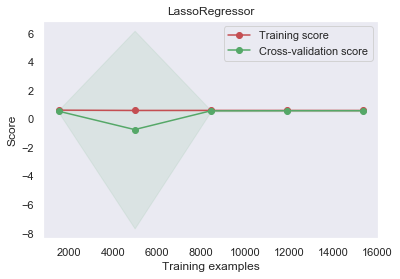

In [151]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('LassoRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(lasso_before_tune_pca, X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Lasso_GridSearch

In [152]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
alphas = np.logspace(-4, -0.5, 30)


tuned_parameters = [{'alpha': alphas}]
n_folds = 5

grid_pca_lasso = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True, scoring='r2')
grid_pca_lasso.fit(X_pca_train, Y_pca_train)
print(grid_pca_lasso.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04...
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

{'alpha': 0.0021261123338996556}


In [153]:
best_model_pca_lasso = Lasso().set_params(**grid_pca_lasso.best_params_)
best_model_pca_lasso.fit(X_pca_train, Y_pca_train)
pred_train = best_model_pca_lasso.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

Lasso(alpha=0.0021261123338996556, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.532515              12.238675             277206.0   
18253                12.696936              12.574185             326745.0   
4741                 13.265553              13.945662             576975.0   
8406                 12.561608              12.312687             285389.0   
234                  12.819794              13.060277             369459.0   
11125                12.595092              12.610173             295106.0   
2813                 13.147382              13.060277             512667.0   
698                  13.093319              13.199141             485687.0   
10623                13.428664              13.384729             679196.0   
16239                12.659056              12.577636             314600.0   
15949                12.443080              12.049425             253490.0   
1668                 12.806666              12.911645             364640.0   
3372                 13.282408              13.485618             586781.0   
10397                12.451974              12.425212             255755.0   
17489                12.094031              12.383675             178801.0   
6284                 12.900615              12.895553             400559.0   
9598                 12.831955              12.498373             373979.0   
12770                12.252781              11.774528             209563.0   
6068                 12.876936              12.891669             391185.0   
8000                 13.219739              12.779594             551137.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [154]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 27725049001.07
RMSE: 166508.41
R^2: 0.400


In [155]:
pred = best_model_pca_lasso.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.780082        12.672950       355074.0     319001.0
17892          11.867837        12.100718       142605.0     180001.0
12198          12.666620        12.736704       316988.0     340001.0
9774           12.686893        12.594734       323480.0     295001.0
18511          12.259814        11.938200       211042.0     153001.0
18437          12.381783        12.341438       238419.0     228991.0
8661           12.856807        13.038440       383390.0     459751.0
14024          13.071236        12.985170       475079.0     435901.0
12975          12.510675        12.514296       271217.0     272201.0
4385           12.088666        12.257041       177845.0     210458.0
18095          12.526868        12.736410       275645.0     339901.0
13870          12.633718        13.361382       306728.0     635001.0
9663           12.637730        12.429220       307961.0     250001.0
15665          12.346666        11.956976       230191.0     155901.0
6755           13.573730        13.997833       785229.0    1200001.0
2695           12.735066        12.524166       339444.0     274901.0
15953          12.357771        12.205578       232762.0     199901.0
16692          12.394497        12.706821       241469.0     329991.0
14             11.930911        11.660492       151890.0     115901.0
15851          12.323787        12.165256       224984.0     192001.0

In [156]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 23340697194.79
RMSE: 152776.63
R^2: 0.502


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LassoRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

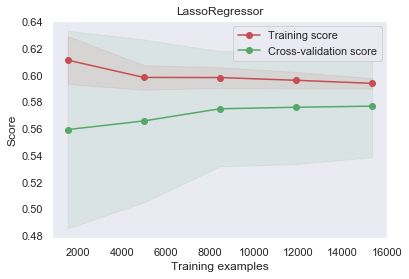

In [157]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('LassoRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(best_model_pca_lasso, X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# RandomForest_pca_before_tunning

In [158]:
from sklearn.ensemble import RandomForestRegressor

rf_pca_before_model= RandomForestRegressor(random_state=42)
rf_pca_before_model.fit(X_pca_train, Y_pca_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [159]:
pred_train = rf_pca_before_model.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.324874              12.238675             225229.0   
18253                12.650269              12.574185             311847.0   
4741                 13.749302              13.945662             935936.0   
8406                 12.375359              12.312687             236892.0   
234                  13.079601              13.060277             479070.0   
11125                12.605467              12.610173             298184.0   
2813                 13.005564              13.060277             444882.0   
698                  13.185840              13.199141             532767.0   
10623                13.413967              13.384729             669286.0   
16239                12.614677              12.577636             300943.0   
15949                12.206370              12.049425             200059.0   
1668                 12.894927              12.911645             398287.0   
3372                 13.399981              13.485618             659991.0   
10397                12.441867              12.425212             253183.0   
17489                12.307319              12.383675             221310.0   
6284                 12.901607              12.895553             400956.0   
9598                 12.576750              12.498373             289743.0   
12770                11.952505              11.774528             155205.0   
6068                 12.909630              12.891669             404186.0   
8000                 12.836571              12.779594             375709.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [160]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])


MSE: 3107429696.93
RMSE: 55744.32
R^2: 0.933


In [161]:
pred = rf_pca_before_model.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)


predict_price_log  truth_price_log  predict_price  truth_price
1356           12.644290        12.672950       309988.0     319001.0
17892          11.105340        12.100718        66525.0     180001.0
12198          12.685588        12.736704       323058.0     340001.0
9774           12.668963        12.594734       317732.0     295001.0
18511          12.036049        11.938200       168729.0     153001.0
18437          12.343909        12.341438       229558.0     228991.0
8661           13.062677        13.038440       471030.0     459751.0
14024          12.911544        12.985170       404960.0     435901.0
12975          12.456896        12.514296       257017.0     272201.0
4385           12.307922        12.257041       221443.0     210458.0
18095          12.762453        12.736410       348870.0     339901.0
13870          12.735084        13.361382       339451.0     635001.0
9663           12.554559        12.429220       283384.0     250001.0
15665          12.071314        11.956976       174785.0     155901.0
6755           13.372133        13.997833       641865.0    1200001.0
2695           12.647898        12.524166       311109.0     274901.0
15953          12.317477        12.205578       223569.0     199901.0
16692          12.319033        12.706821       223918.0     329991.0
14             11.849624        11.660492       140032.0     115901.0
15851          12.333341        12.165256       227144.0     192001.0

In [162]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 15987427626.83
RMSE: 126441.40
R^2: 0.659


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Random_Forest_Regressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

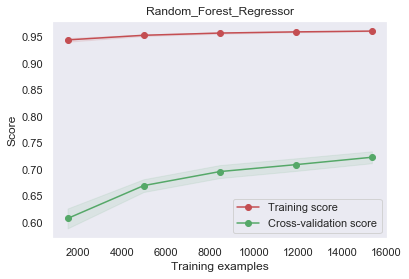

In [163]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('Random_Forest_Regressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(rf_pca_before_model,X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")


# Random_Foreast_GridSearch 

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor(random_state=42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 8,10,20,50]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
param_grid= {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_pca_random = RandomizedSearchCV(model,param_grid, n_iter = 1000, cv =5,random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_pca_random.fit(X_pca_train, Y_pca_train)

# examine the best model
print(rf_pca_random.best_params_)
print(rf_pca_random.best_estimator_)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': True}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)


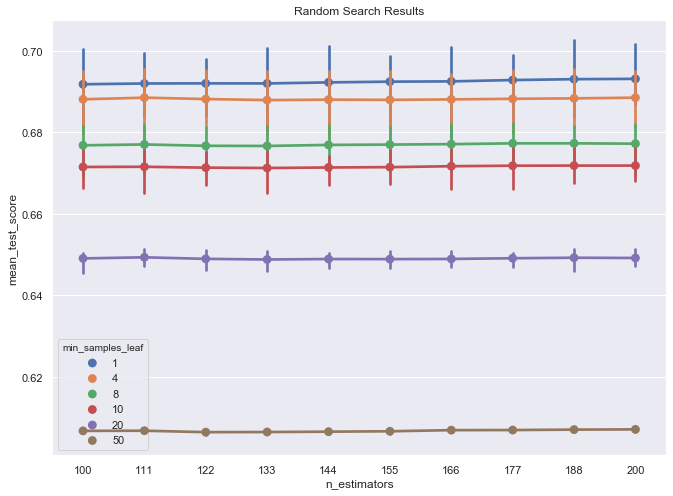

In [165]:
import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Random Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(rf_pca_random.cv_results_, 'n_estimators', 'min_samples_leaf')

In [166]:
best_rf_pca_model = RandomForestRegressor(random_state=42).set_params(**rf_pca_random.best_params_)
best_rf_pca_model.fit(X_pca_train, Y_pca_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [167]:
pred_train = best_rf_pca_model.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.309461              12.238675             221784.0   
18253                12.648319              12.574185             311240.0   
4741                 13.763490              13.945662             949309.0   
8406                 12.364788              12.312687             234401.0   
234                  13.075849              13.060277             477275.0   
11125                12.602992              12.610173             297447.0   
2813                 12.996689              13.060277             440951.0   
698                  13.189173              13.199141             534546.0   
10623                13.406674              13.384729             664423.0   
16239                12.613144              12.577636             300482.0   
15949                12.190131              12.049425             196837.0   
1668                 12.905529              12.911645             402531.0   
3372                 13.392648              13.485618             655169.0   
10397                12.435242              12.425212             251511.0   
17489                12.354548              12.383675             232013.0   
6284                 12.901803              12.895553             401035.0   
9598                 12.559147              12.498373             284687.0   
12770                11.927795              11.774528             151417.0   
6068                 12.909055              12.891669             403954.0   
8000                 12.836448              12.779594             375663.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [168]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 3077453509.96
RMSE: 55474.80
R^2: 0.933


In [169]:
pred = best_rf_pca_model.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.653336        12.672950       312805.0     319001.0
17892          11.116646        12.100718        67282.0     180001.0
12198          12.707628        12.736704       330257.0     340001.0
9774           12.671559        12.594734       318558.0     295001.0
18511          12.048744        11.938200       170885.0     153001.0
18437          12.354117        12.341438       231913.0     228991.0
8661           13.067891        13.038440       473492.0     459751.0
14024          12.915607        12.985170       406609.0     435901.0
12975          12.466955        12.514296       259615.0     272201.0
4385           12.270113        12.257041       213227.0     210458.0
18095          12.768467        12.736410       350974.0     339901.0
13870          12.744648        13.361382       342713.0     635001.0
9663           12.556351        12.429220       283892.0     250001.0
15665          12.053489        11.956976       171697.0     155901.0
6755           13.384614        13.997833       649926.0    1200001.0
2695           12.639107        12.524166       308386.0     274901.0
15953          12.307582        12.205578       221368.0     199901.0
16692          12.296641        12.706821       218959.0     329991.0
14             11.904111        11.660492       147873.0     115901.0
15851          12.321210        12.165256       224405.0     192001.0

In [170]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 15967809345.04
RMSE: 126363.80
R^2: 0.659


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'RandomForest')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

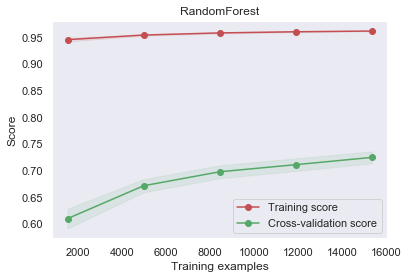

In [171]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('RandomForest')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(best_rf_pca_model, X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# XGBoost_PCA_before_tunning

In [172]:
model_pca_XGB = XGBRegressor(objective ='reg:squarederror', random_state=42)
model_pca_XGB.fit(X_pca_train, Y_pca_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [173]:
pred_train = model_pca_XGB.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.480698              12.238675             263207.0   
18253                12.808240              12.574185             365214.0   
4741                 13.400783              13.945662             660520.0   
8406                 12.463491              12.312687             258717.0   
234                  12.974253              13.060277             431168.0   
11125                12.515450              12.610173             272515.0   
2813                 12.915627              13.060277             406617.0   
698                  13.120508              13.199141             499073.0   
10623                13.391962              13.384729             654719.0   
16239                12.605047              12.577636             298059.0   
15949                12.393540              12.049425             241238.0   
1668                 12.881688              12.911645             393048.0   
3372                 13.279531              13.485618             585096.0   
10397                12.465779              12.425212             259310.0   
17489                12.281021              12.383675             215566.0   
6284                 13.017072              12.895553             450031.0   
9598                 12.760952              12.498373             348346.0   
12770                12.203931              11.774528             199572.0   
6068                 12.968221              12.891669             428575.0   
8000                 13.082991              12.779594             480696.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [174]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 16295116517.36
RMSE: 127652.33
R^2: 0.647


In [175]:
pred = model_pca_XGB.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.659907        12.672950       314867.0     319001.0
17892          11.454642        12.100718        94338.0     180001.0
12198          12.753218        12.736704       345662.0     340001.0
9774           12.710289        12.594734       331137.0     295001.0
18511          12.146794        11.938200       188489.0     153001.0
18437          12.469183        12.341438       260194.0     228991.0
8661           12.942021        13.038440       417492.0     459751.0
14024          12.853834        12.985170       382251.0     435901.0
12975          12.482648        12.514296       263721.0     272201.0
4385           12.127110        12.257041       184815.0     210458.0
18095          12.688649        12.736410       324049.0     339901.0
13870          12.718350        13.361382       333818.0     635001.0
9663           12.553021        12.429220       282949.0     250001.0
15665          12.437690        11.956976       252127.0     155901.0
6755           13.485560        13.997833       718959.0    1200001.0
2695           12.671740        12.524166       318615.0     274901.0
15953          12.359011        12.205578       233050.0     199901.0
16692          12.340637        12.706821       228808.0     329991.0
14             11.890510        11.660492       145876.0     115901.0
15851          12.407652        12.165256       244667.0     192001.0

In [176]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 18767434954.58
RMSE: 136994.29
R^2: 0.599


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'XGBRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

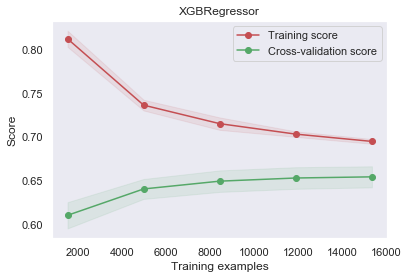

In [177]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
estimator=XGBRegressor(objective ='reg:squarederror')
plt.figure()
plt.title('XGBRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(estimator, X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# XGBoost_Tunning

In [178]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

model = XGBRegressor(objective ='reg:squarederror',random_state=42)

# Create the random grid
param_grid= {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15] }
print(param_grid)

grid_pca_XGB = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_pca_XGB.fit(X_pca_train, Y_pca_train)
print(grid_pca_XGB.best_params_)
print(grid_pca_XGB.best_estimator_)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15]}


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=42, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 

{'learning_rate': 0.1, 'max_depth': 10}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


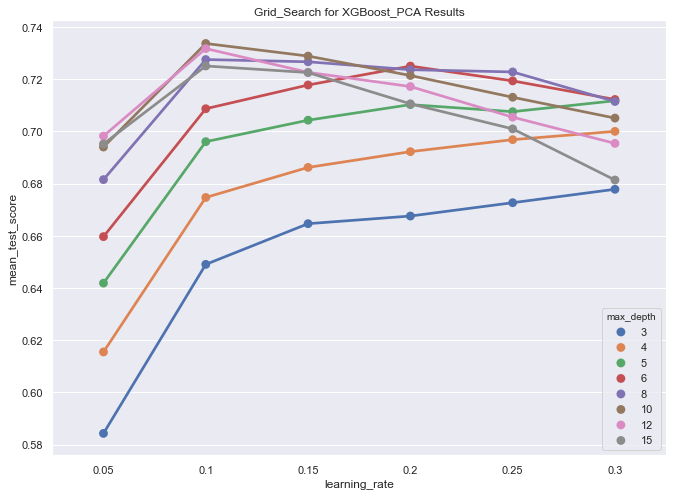

In [179]:
# plot the results

import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("Grid_Search for XGBoost_PCA Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid_pca_XGB.cv_results_, 'learning_rate', 'max_depth')

In [180]:
best_model__pca_XGBoost = XGBRegressor(random_state=42).set_params(**grid_pca_XGB.best_params_)
best_model__pca_XGBoost.fit(X_pca_train, Y_pca_train)

[23:49:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [181]:
pred_train = best_model__pca_XGBoost.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.286829              12.238675             216821.0   
18253                12.619142              12.574185             302290.0   
4741                 13.839398              13.945662            1024175.0   
8406                 12.394897              12.312687             241566.0   
234                  13.037136              13.060277             459152.0   
11125                12.608179              12.610173             298994.0   
2813                 12.996835              13.060277             441015.0   
698                  13.234846              13.199141             559526.0   
10623                13.393592              13.384729             655787.0   
16239                12.602781              12.577636             297384.0   
15949                12.205249              12.049425             199835.0   
1668                 12.913526              12.911645             405763.0   
3372                 13.431582              13.485618             681180.0   
10397                12.415743              12.425212             246654.0   
17489                12.384296              12.383675             239018.0   
6284                 12.911499              12.895553             404942.0   
9598                 12.486477              12.498373             264733.0   
12770                11.820960              11.774528             136075.0   
6068                 12.927592              12.891669             411511.0   
8000                 12.842742              12.779594             378035.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [182]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1705696904.55
RMSE: 41300.08
R^2: 0.963


In [183]:
pred = best_model__pca_XGBoost.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.567652        12.672950       287119.0     319001.0
17892          11.434557        12.100718        92462.0     180001.0
12198          12.618391        12.736704       302063.0     340001.0
9774           12.689084        12.594734       324190.0     295001.0
18511          12.130878        11.938200       185513.0     153001.0
18437          12.381063        12.341438       238247.0     228991.0
8661           13.037307        13.038440       459230.0     459751.0
14024          12.931354        12.985170       413062.0     435901.0
12975          12.480871        12.514296       263253.0     272201.0
4385           12.130005        12.257041       185351.0     210458.0
18095          12.861080        12.736410       385031.0     339901.0
13870          12.670679        13.361382       318277.0     635001.0
9663           12.556166        12.429220       283840.0     250001.0
15665          12.010821        11.956976       164526.0     155901.0
6755           13.598380        13.997833       804825.0    1200001.0
2695           12.648769        12.524166       311380.0     274901.0
15953          12.296788        12.205578       218991.0     199901.0
16692          12.367016        12.706821       234924.0     329991.0
14             11.693563        11.660492       119798.0     115901.0
15851          12.290377        12.165256       217592.0     192001.0

In [184]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 13994241344.22
RMSE: 118297.26
R^2: 0.701


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'XGBRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

[23:49:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:49:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:50:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:50:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:50:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:50:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[23:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:58:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:59:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[00:07:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:08:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


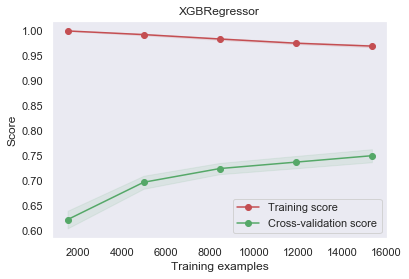

In [185]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('XGBRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(best_model__pca_XGBoost, X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# LGBM_PCA_Before_Tunning

In [186]:
from lightgbm.sklearn import LGBMRegressor

lgbm_pca_before_tune= LGBMRegressor(random_state=42)
lgbm_pca_before_tune.fit(X_pca_train, Y_pca_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [187]:
pred_train = lgbm_pca_before_tune.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)


predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.371154              12.238675             235898.0   
18253                12.806156              12.574185             364454.0   
4741                 13.602440              13.945662             808099.0   
8406                 12.449398              12.312687             255097.0   
234                  13.044085              13.060277             462353.0   
11125                12.645348              12.610173             310316.0   
2813                 12.979550              13.060277             433458.0   
698                  13.223910              13.199141             553441.0   
10623                13.392619              13.384729             655149.0   
16239                12.655055              12.577636             313343.0   
15949                12.276014              12.049425             214489.0   
1668                 12.859327              12.911645             384357.0   
3372                 13.379424              13.485618             646562.0   
10397                12.465877              12.425212             259335.0   
17489                12.219188              12.383675             202640.0   
6284                 12.892307              12.895553             397244.0   
9598                 12.643856              12.498373             309854.0   
12770                12.009321              11.774528             164279.0   
6068                 12.990600              12.891669             438274.0   
8000                 13.042173              12.779594             461470.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [188]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])


MSE: 9409083099.47
RMSE: 97000.43
R^2: 0.796


In [189]:
pred = lgbm_pca_before_tune.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.535992        12.672950       278171.0     319001.0
17892          11.118954        12.100718        67437.0     180001.0
12198          12.710436        12.736704       331186.0     340001.0
9774           12.582306        12.594734       291357.0     295001.0
18511          12.169762        11.938200       192868.0     153001.0
18437          12.423131        12.341438       248483.0     228991.0
8661           13.005322        13.038440       444774.0     459751.0
14024          12.916607        12.985170       407016.0     435901.0
12975          12.412199        12.514296       245782.0     272201.0
4385           12.106510        12.257041       181047.0     210458.0
18095          12.646162        12.736410       310569.0     339901.0
13870          12.736376        13.361382       339890.0     635001.0
9663           12.457016        12.429220       257047.0     250001.0
15665          12.158204        11.956976       190652.0     155901.0
6755           13.445653        13.997833       690833.0    1200001.0
2695           12.687598        12.524166       323708.0     274901.0
15953          12.222447        12.205578       203302.0     199901.0
16692          12.219061        12.706821       202615.0     329991.0
14             11.714268        11.660492       122304.0     115901.0
15851          12.318382        12.165256       223772.0     192001.0

In [190]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 15078122621.43
RMSE: 122793.01
R^2: 0.678


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LassoRegressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

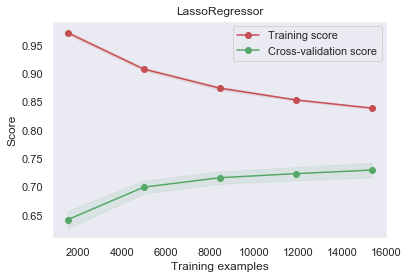

In [191]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.simplefilter(action='ignore')

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('LassoRegressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(lgbm_pca_before_tune,X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")


# LGBM_GridSearch 

In [192]:
from lightgbm.sklearn import LGBMRegressor

In [193]:
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

model = LGBMRegressor(random_state=42)
model.fit(X_pca_train, Y_pca_train)

# Create the random grid
param_grid= {"num_leaves"    : [2,4,8,10,15,20,30] ,
    "min_data_in_leaf"        : [10,20,50,100,150,200,300]  }
print(param_grid)

grid_pca_LGBM = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_pca_LGBM.fit(X_pca_train, Y_pca_train)
print(grid_pca_LGBM.best_params_)
print(grid_pca_LGBM.best_estimator_)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

{'num_leaves': [2, 4, 8, 10, 15, 20, 30], 'min_data_in_leaf': [10, 20, 50, 100, 150, 200, 300]}


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=42,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'min_data_in_leaf': [10, 20, 50, 100, 150, 200, 300],
                         'num_leaves': [2, 4, 8, 10, 15, 20, 30]},
             pre_dispatch='2*n_jobs'

{'min_data_in_leaf': 50, 'num_leaves': 30}
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=50,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=30,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


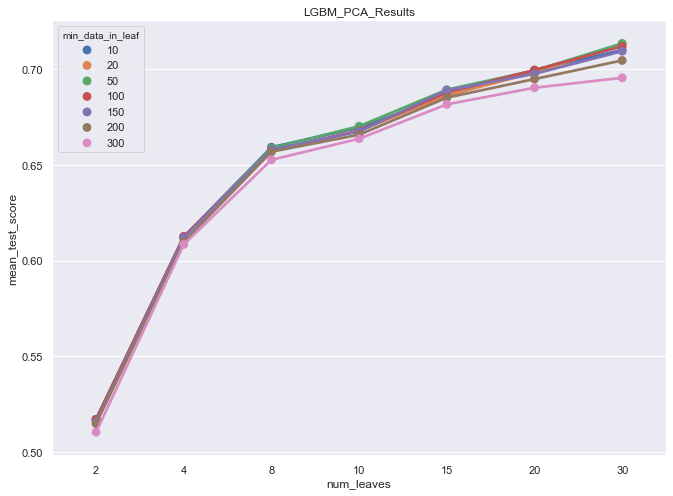

In [194]:
import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("LGBM_PCA_Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

fig = plot_cv_results(grid_pca_LGBM.cv_results_, 'num_leaves', 'min_data_in_leaf')


In [195]:
best_model_pca_Lgbm = LGBMRegressor(random_state=42).set_params(**grid_pca_LGBM.best_params_)
best_model_pca_Lgbm.fit(X_pca_train, Y_pca_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=50,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=30,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [196]:
pred_train = best_model_pca_Lgbm.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.390095              12.238675             240409.0   
18253                12.742177              12.574185             341867.0   
4741                 13.606130              13.945662             811087.0   
8406                 12.504002              12.312687             269413.0   
234                  13.051815              13.060277             465942.0   
11125                12.661756              12.610173             315450.0   
2813                 12.920031              13.060277             408412.0   
698                  13.208261              13.199141             544847.0   
10623                13.368305              13.384729             639412.0   
16239                12.609576              12.577636             299412.0   
15949                12.207723              12.049425             200330.0   
1668                 12.852552              12.911645             381762.0   
3372                 13.412133              13.485618             668060.0   
10397                12.448990              12.425212             254993.0   
17489                12.339977              12.383675             228657.0   
6284                 12.908437              12.895553             403704.0   
9598                 12.637894              12.498373             308012.0   
12770                12.034980              11.774528             168549.0   
6068                 13.003978              12.891669             444177.0   
8000                 13.025659              12.779594             453912.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [214]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1029509121.69
RMSE: 32085.96
R^2: 0.978


In [198]:
pred = best_model_pca_Lgbm.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.508001        12.672950       270493.0     319001.0
17892          11.141814        12.100718        68997.0     180001.0
12198          12.595140        12.736704       295121.0     340001.0
9774           12.635759        12.594734       307355.0     295001.0
18511          12.223390        11.938200       203494.0     153001.0
18437          12.390809        12.341438       240580.0     228991.0
8661           13.062685        13.038440       471034.0     459751.0
14024          12.966745        12.985170       427943.0     435901.0
12975          12.434096        12.514296       251223.0     272201.0
4385           12.137497        12.257041       186745.0     210458.0
18095          12.671039        12.736410       318392.0     339901.0
13870          12.810494        13.361382       366038.0     635001.0
9663           12.496096        12.429220       267292.0     250001.0
15665          12.248652        11.956976       208700.0     155901.0
6755           13.512407        13.997833       738523.0    1200001.0
2695           12.634588        12.524166       306995.0     274901.0
15953          12.181274        12.205578       195101.0     199901.0
16692          12.277968        12.706821       214909.0     329991.0
14             11.689618        11.660492       119326.0     115901.0
15851          12.340896        12.165256       228867.0     192001.0

In [199]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 14880559313.26
RMSE: 121985.90
R^2: 0.682


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'LGBM_PCA_Regressor')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

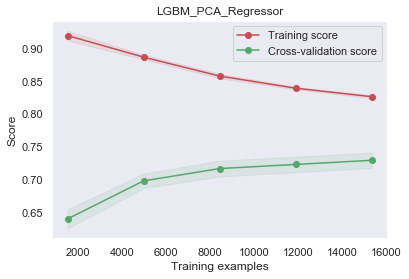

In [200]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('LGBM_PCA_Regressor')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(best_model_pca_Lgbm, X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Ensemble Learning_PCA

In [201]:
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
LCV_model = LassoCV()
lr_model = linear_model.LinearRegression()
XGB_model = XGBRegressor(objective ='reg:squarederror')
LGBM_model = LGBMRegressor()
estimators = [XGB_model, LGBM_model, lr_model, LCV_model, rf_model]
reg = StackingRegressor(regressors=estimators, meta_regressor=GradientBoostingRegressor(random_state=42))
reg.fit(X_pca_train, Y_pca_train)


StackingRegressor(meta_regressor=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [202]:
pred_train = reg.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.308802              12.238675             221638.0   
18253                12.558697              12.574185             284559.0   
4741                 13.781061              13.945662             966137.0   
8406                 12.378734              12.312687             237693.0   
234                  13.029552              13.060277             455683.0   
11125                12.580296              12.610173             290772.0   
2813                 13.056137              13.060277             467959.0   
698                  13.197887              13.199141             539225.0   
10623                13.422947              13.384729             675323.0   
16239                12.606642              12.577636             298535.0   
15949                12.138843              12.049425             186996.0   
1668                 12.909543              12.911645             404151.0   
3372                 13.384362              13.485618             649762.0   
10397                12.428285              12.425212             249767.0   
17489                12.395307              12.383675             241665.0   
6284                 12.880137              12.895553             392439.0   
9598                 12.492952              12.498373             266453.0   
12770                11.968507              11.774528             157709.0   
6068                 12.886312              12.891669             394870.0   
8000                 12.826381              12.779594             371900.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [203]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1077641375.80
RMSE: 32827.45
R^2: 0.977


In [204]:
pred = reg.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.620155        12.672950       302596.0     319001.0
17892          11.103111        12.100718        66377.0     180001.0
12198          12.709389        12.736704       330840.0     340001.0
9774           12.587995        12.594734       293020.0     295001.0
18511          12.001898        11.938200       163064.0     153001.0
18437          12.325568        12.341438       225386.0     228991.0
8661           13.080699        13.038440       479596.0     459751.0
14024          12.888982        12.985170       395926.0     435901.0
12975          12.479553        12.514296       262906.0     272201.0
4385           12.344598        12.257041       229716.0     210458.0
18095          12.845235        12.736410       378979.0     339901.0
13870          12.717650        13.361382       333584.0     635001.0
9663           12.488831        12.429220       265357.0     250001.0
15665          11.954991        11.956976       155592.0     155901.0
6755           13.466128        13.997833       705123.0    1200001.0
2695           12.627350        12.524166       304781.0     274901.0
15953          12.203170        12.205578       199420.0     199901.0
16692          12.252678        12.706821       209542.0     329991.0
14             11.918111        11.660492       149958.0     115901.0
15851          12.298893        12.165256       219453.0     192001.0

In [205]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 15833301638.94
RMSE: 125830.45
R^2: 0.662


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ensemble Learning')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

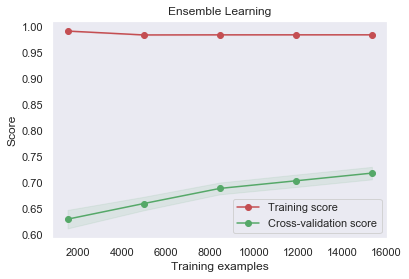

In [206]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('Ensemble Learning')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(reg, X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Ensemble Learning without Linear and Lasso

In [207]:
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
XGB_model = XGBRegressor(objective ='reg:squarederror')
LGBM_model = LGBMRegressor()
estimators_without_linearlasso = [XGB_model, LGBM_model,rf_model]
reg_without_linearlasso= StackingRegressor(regressors=estimators_without_linearlasso, meta_regressor=GradientBoostingRegressor(random_state=42))
reg_without_linearlasso.fit(X_pca_train, Y_pca_train)

StackingRegressor(meta_regressor=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [208]:
pred_train = reg_without_linearlasso.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.324461              12.238675             225136.0   
18253                12.618278              12.574185             302029.0   
4741                 13.831056              13.945662            1015667.0   
8406                 12.337928              12.312687             228189.0   
234                  13.049647              13.060277             464932.0   
11125                12.608497              12.610173             299089.0   
2813                 13.060167              13.060277             469849.0   
698                  13.188063              13.199141             533953.0   
10623                13.375882              13.384729             644276.0   
16239                12.609747              12.577636             299463.0   
15949                12.082568              12.049425             176763.0   
1668                 12.898998              12.911645             399911.0   
3372                 13.438461              13.485618             685882.0   
10397                12.433082              12.425212             250968.0   
17489                12.390369              12.383675             240475.0   
6284                 12.879813              12.895553             392312.0   
9598                 12.518279              12.498373             273287.0   
12770                11.830617              11.774528             137395.0   
6068                 12.883939              12.891669             393934.0   
8000                 12.842404              12.779594             377907.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [209]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 1029509121.69
RMSE: 32085.96
R^2: 0.978


In [210]:
pred = reg_without_linearlasso.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.663205        12.672950       315908.0     319001.0
17892          10.997386        12.100718        59718.0     180001.0
12198          12.729438        12.736704       337540.0     340001.0
9774           12.640836        12.594734       308919.0     295001.0
18511          11.991954        11.938200       161451.0     153001.0
18437          12.318603        12.341438       223821.0     228991.0
8661           13.104945        13.038440       491366.0     459751.0
14024          12.866247        12.985170       387026.0     435901.0
12975          12.482034        12.514296       263559.0     272201.0
4385           12.335147        12.257041       227555.0     210458.0
18095          12.759154        12.736410       347720.0     339901.0
13870          12.710291        13.361382       331138.0     635001.0
9663           12.564901        12.429220       286330.0     250001.0
15665          11.992466        11.956976       161533.0     155901.0
6755           13.354991        13.997833       630956.0    1200001.0
2695           12.587296        12.524166       292815.0     274901.0
15953          12.234153        12.205578       205696.0     199901.0
16692          12.292591        12.706821       218074.0     329991.0
14             12.001777        11.660492       163044.0     115901.0
15851          12.316517        12.165256       223355.0     192001.0

In [211]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 15874918336.07
RMSE: 125995.71
R^2: 0.661


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ensemble Learning')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

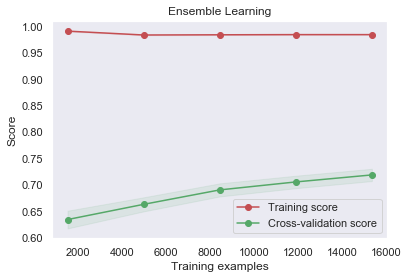

In [212]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('Ensemble Learning')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(reg_without_linearlasso, X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Ensemble Learning after PCA with Best Model

In [215]:
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.regressor import StackingRegressor
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
XGB_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
LGBM_model = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=50,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=30,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
estimators = [XGB_model, LGBM_model, rf_model]
reg_built_in_model_pca_without_linearlasso_best = StackingRegressor(regressors=estimators, meta_regressor=GradientBoostingRegressor(random_state=42))
reg_built_in_model_pca_without_linearlasso_best.fit(X_pca_train, Y_pca_train)

[09:11:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(meta_regressor=GradientBoostingRegressor(alpha=0.9,
                                                           ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='ls',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_spl

In [216]:
pred_train = reg_built_in_model_pca_without_linearlasso_best.predict(X_pca_train)

pred_train_and_truth = pd.DataFrame({'predict_train_price_log':pred_train, 'truth_train_price_log':y_train, 'predict_train_price':np.round(np.e ** pred_train, 0), 'truth_train_price': np.e ** y_train},
                             columns=['predict_train_price_log', 'truth_train_price_log', 'predict_train_price', 'truth_train_price'])
pred_train_and_truth.head(20)

predict_train_price_log  truth_train_price_log  predict_train_price  \
10503                12.238352              12.238675             206561.0   
18253                12.641172              12.574185             309023.0   
4741                 13.933797              13.945662            1125566.0   
8406                 12.389923              12.312687             240367.0   
234                  13.034490              13.060277             457938.0   
11125                12.580528              12.610173             290840.0   
2813                 13.065916              13.060277             472558.0   
698                  13.233441              13.199141             558741.0   
10623                13.409888              13.384729             666561.0   
16239                12.605763              12.577636             298273.0   
15949                12.144902              12.049425             188133.0   
1668                 12.895928              12.911645             398685.0   
3372                 13.432793              13.485618             682006.0   
10397                12.417275              12.425212             247032.0   
17489                12.344449              12.383675             229681.0   
6284                 12.920614              12.895553             408650.0   
9598                 12.487499              12.498373             265004.0   
12770                11.782249              11.774528             130908.0   
6068                 12.871963              12.891669             389244.0   
8000                 12.836507              12.779594             375685.0   

       truth_train_price  
10503           206628.0  
18253           289001.0  
4741           1139001.0  
8406            222501.0  
234             469901.0  
11125           299591.0  
2813            469901.0  
698             539901.0  
10623           650001.0  
16239           290000.0  
15949           171001.0  
1668            405001.0  
3372            719001.0  
10397           249001.0  
17489           238870.0  
6284            398536.0  
9598            267901.0  
12770           129901.0  
6068            396991.0  
8000            354901.0

In [217]:
metrics_new(pred_train_and_truth['predict_train_price'], pred_train_and_truth['truth_train_price'])

MSE: 619115690.78
RMSE: 24882.04
R^2: 0.987


In [218]:
pred = reg_built_in_model_pca_without_linearlasso_best.predict(X_pca_test)
pred_and_truth = pd.DataFrame({'predict_price_log':pred, 'truth_price_log':y_test, 'predict_price':np.round(np.e ** pred, 0), 'truth_price': np.e ** y_test},
                             columns=['predict_price_log', 'truth_price_log', 'predict_price', 'truth_price'])
pred_and_truth.head(20)

predict_price_log  truth_price_log  predict_price  truth_price
1356           12.672300        12.672950       318794.0     319001.0
17892          11.378668        12.100718        87436.0     180001.0
12198          12.650682        12.736704       311976.0     340001.0
9774           12.649074        12.594734       311475.0     295001.0
18511          12.044588        11.938200       170176.0     153001.0
18437          12.329407        12.341438       226252.0     228991.0
8661           13.048442        13.038440       464372.0     459751.0
14024          12.964777        12.985170       427101.0     435901.0
12975          12.467986        12.514296       259883.0     272201.0
4385           12.201152        12.257041       199018.0     210458.0
18095          12.844277        12.736410       378616.0     339901.0
13870          12.680435        13.361382       321398.0     635001.0
9663           12.584824        12.429220       292092.0     250001.0
15665          11.969101        11.956976       157803.0     155901.0
6755           13.611513        13.997833       815464.0    1200001.0
2695           12.650901        12.524166       312044.0     274901.0
15953          12.296943        12.205578       219025.0     199901.0
16692          12.323730        12.706821       224972.0     329991.0
14             11.630740        11.660492       112504.0     115901.0
15851          12.296092        12.165256       218839.0     192001.0

In [219]:
metrics_new(pred_and_truth['predict_price'], pred_and_truth['truth_price'])

MSE: 14465387200.00
RMSE: 120272.14
R^2: 0.691


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ensemble Learning')

Text(0.5, 0, 'Training examples')

Text(0, 0.5, 'Score')

[09:12:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:15:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[09:50:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:50:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:52:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:53:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:54:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[10:29:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:30:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:31:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:33:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:34:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


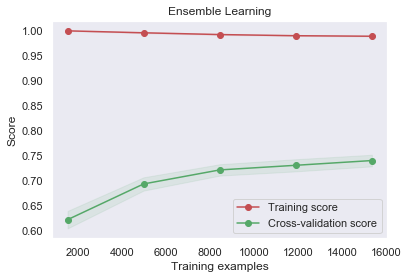

In [220]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
plt.figure()
plt.title('Ensemble Learning')
plt.xlabel("Training examples")
plt.ylabel("Score")
train_sizes, train_scores, test_scores = learning_curve(reg_built_in_model_pca_without_linearlasso_best, X_for_pca,Y, cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")
plt.legend(loc="best")

# Conclusion

According to our result the top 10 most important of prediction of house price in Georgia state are TaxAssessedValue, YearBuilt, LivingArea, LotSize, Bathrooms, HomeType, FavoriteCount, AverageHouseValue, HighSchoolRating, PageViewCount. Obviously, when people decide to buy the house, they take into account not only the value of the home itself, but also the property tax. Buyers pay much attention to the length of time, because it is closely related to the quality of the house. It is also obvious that living area directly determines the price of a house. For the convenience of daily life, buyers will consider not only the areas of the house where they are active for long periods of time, but also the amount of bathroom. One of the interesting aspects of the results is that buyers tend to prefer homes near high schools, perhaps because of the high security or high traffic around the school.


So, if people want to sale their house at a good price in Georgia state, their house should have low Tax, the age of the house should not be long, for the house situation, living area should around 2000, lost size should be around 20000 and bathrooms should be more than two, they should be single family and  if they near good high school will be a plus. Besides, they should show good description and introduction on the website, which may attract more people, for pageviewcount feature are also important.

At the beginning of the project, we decided to use six metrics (RMSE, MAE, MSE, MAPE, MPE and R^2) to evaluate our model results, but as we continued to train the model, we found that some of these metrics were not applicable to our model training and evaluation. Therefore, we finally chose MSE, RMSE and R^2 for evaluation and training.

# Reference

1. Georgios. D. "How to select the Right Evaluation Metric for Machine Learning Models: Part 1 Regression Metrics". Retrieved from https://medium.com/@george.drakos62/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0
2. Nicolas. V. "Forecast KPI: RMSE, MAE, MAPE & Bias". Retrieved from https://medium.com/analytics-vidhya/forecast-kpi-rmse-mae-mape-bias-cdc5703d242d
3. Lever, J., Krzywinski, M., & Altman, N. (2017, June 29). Principal component analysis. Retrieved April 9, 2020, from https://www.nature.com/articles/nmeth.4346 
4.
5.


In [294]:
!pip install nbconvert